In [1]:
import pandas as pd
import json
import ast
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = r'F:\GUVI\Projects\P3 -CarDekho\Car Dekho -Dataset'
files = os.listdir(base_path)

In [3]:
base_path = r'F:\GUVI\Projects\P3 -CarDekho\Car Dekho -Dataset'

bangalore_cars = pd.read_excel(os.path.join(base_path, 'bangalore_cars.xlsx'))
chennai_cars = pd.read_excel(os.path.join(base_path, 'chennai_cars.xlsx'))
delhi_cars = pd.read_excel(os.path.join(base_path, 'delhi_cars.xlsx'))
hyderabad_cars = pd.read_excel(os.path.join(base_path, 'hyderabad_cars.xlsx'))
jaipur_cars = pd.read_excel(os.path.join(base_path, 'jaipur_cars.xlsx'))
kolkata_cars = pd.read_excel(os.path.join(base_path, 'kolkata_cars.xlsx'))


In [ ]:
bangalore_cars.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


### Flattening car_details column  

In [5]:
# Function to convert each cell to a dictionary and expand it into separate columns
def expand_car_detail(row):
    try:
        # Convert the string representation to a dictionary
        car_data = ast.literal_eval(row)
        
        # Flatten the dictionary (ignoring nested ones like 'trendingText' for now)
        flat_dict = {key: value for key, value in car_data.items() if not isinstance(value, dict)}
        
        return flat_dict
    except Exception as e:
        # Handle errors and return an empty dictionary for problematic rows
        print(f"Error processing row: {e}")
        return {}

# Apply the function to the 'new_car_detail' column and expand it into separate columns
bangalore_cars_details = bangalore_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)
chennai_cars_details = chennai_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)
delhi_cars_details = delhi_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)
hyderabad_cars_details = hyderabad_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)
jaipur_cars_details = jaipur_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)
kolkata_cars_details = kolkata_cars['new_car_detail'].apply(expand_car_detail).apply(pd.Series)



In [6]:
bangalore_cars_details.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText'],
      dtype='object')

### Saving flattened car details as CSV in a separate file path

In [ ]:
import pandas as pd
import os

# List of DataFrame variables
dataframes = [bangalore_cars_details, chennai_cars_details, delhi_cars_details, hyderabad_cars_details, jaipur_cars_details, kolkata_cars_details]

# List of names for each DataFrame
file_names = [
    "bangalore_cars_details.csv",
    "chennai_cars_details.csv",
    "delhi_cars_details.csv",
    "hyderabad_cars_details.csv",
    "jaipur_cars_details.csv",
    "kolkata_cars_details.csv"
]

# Directory path where the files will be saved
directory_path = r"F:\GUVI\Projects\P3 -CarDekho\Car_details"

# Ensure the directory path ends with a backslash (or forward slash)
if not directory_path.endswith('\\'):
    directory_path += '\\'

# Save each DataFrame to the specified directory path with unique file names
for df, file_name in zip(dataframes, file_names):
    file_path = os.path.join(directory_path, file_name)
    df.to_csv(file_path, index=False)

print("All DataFrames have been saved to the specified directory path.")


All DataFrames have been saved to the specified directory path.


### Renaming the columns in the DataFrames for consistency

In [ ]:
# List of DataFrames
dataframes = [bangalore_cars_details, chennai_cars_details, delhi_cars_details, hyderabad_cars_details, jaipur_cars_details, kolkata_cars_details]

# Original and new column names
old_names = ['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
             'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
             'priceActual', 'priceSaving', 'priceFixedText']
new_names = ["ignition_type", "fuel_type", "body_type", "kilometers_driven", "transmission_type",
             "number_of_previous_owners", "ownership_details", "original_equipment_manufacturer",
             "car_model", "year_of_car_manufacture", "central_variant_id", "variant_name",
             "price_of_the_used_car", "actual_price", "price_saving_information", "fixed_price_details"]

# Dictionary to map old names to new names
name_map = dict(zip(old_names, new_names))

# Function to replace column names in a DataFrame
def replace_column_names(df):
    df.rename(columns=name_map, inplace=True)
    return df

# Apply the function to rename columns in each DataFrame
dataframes = [replace_column_names(df) for df in dataframes]

# Directory path where the files will be saved
directory_path = r"F:\GUVI\Projects\P3 -CarDekho\Car_details"

# Ensure the directory path ends with a backslash (or forward slash)
if not directory_path.endswith('\\'):
    directory_path += '\\'

# Save the renamed DataFrames to the specified directory path
file_names = [
    "bangalore_cars_details.csv",
    "chennai_cars_details.csv",
    "delhi_cars_details.csv",
    "hyderabad_cars_details.csv",
    "jaipur_cars_details.csv",
    "kolkata_cars_details.csv"
]

for df, file_name in zip(dataframes, file_names):
    file_path = os.path.join(directory_path, file_name)
    df.to_csv(file_path, index=False)

    # Print confirmation of saved files
    print(f"Saved renamed DataFrame to {file_path}")


Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\bangalore_cars_details.csv
Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\chennai_cars_details.csv
Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\delhi_cars_details.csv
Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\hyderabad_cars_details.csv
Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\jaipur_cars_details.csv
Saved renamed DataFrame to F:\GUVI\Projects\P3 -CarDekho\Car_details\kolkata_cars_details.csv


### Flattening new_car_overview

In [9]:
# Function to extract and expand data from 'new_car_overview'
def extract_top_data(row):
    try:
        # Convert the string representation to a dictionary
        car_data = ast.literal_eval(row)
        
        # Extract the 'top' list and convert it into a dictionary of key-value pairs
        top_data = car_data.get('top', [])
        top_dict = {item['key']: item['value'] for item in top_data}
        
        return top_dict
    except Exception as e:
        # Return an empty dictionary if parsing fails
        print(f"Error processing row: {e}")
        return {}

# Apply the function to the 'new_car_overview' column and expand it into separate columns
bangalore_cars_overview = bangalore_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)
chennai_cars_overview = chennai_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)
delhi_cars_overview = delhi_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)
hyderabad_cars_overview = hyderabad_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)
jaipur_cars_overview = jaipur_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)
kolkata_cars_overview = kolkata_cars['new_car_overview'].apply(extract_top_data).apply(pd.Series)



In [10]:
bangalore_cars_overview.columns

Index(['Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats',
       'Kms Driven', 'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture'],
      dtype='object')

### Renaming the columns in the DataFrames for consistency

In [11]:
# List of DataFrame variables
dataframes = [bangalore_cars_overview, chennai_cars_overview, delhi_cars_overview, hyderabad_cars_overview, jaipur_cars_overview, kolkata_cars_overview]

# Function to rename columns
def rename_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

# Rename columns for each DataFrame
for df in dataframes:
    rename_columns(df)


In [12]:
bangalore_cars_overview.columns

Index(['registration_year', 'insurance_validity', 'fuel_type', 'seats',
       'kms_driven', 'rto', 'ownership', 'engine_displacement', 'transmission',
       'year_of_manufacture'],
      dtype='object')

### Saving flattened car overview as CSV in a separate file path

In [ ]:
import os
import pandas as pd

# List of DataFrames
dataframes = [bangalore_cars_overview, chennai_cars_overview, delhi_cars_overview, hyderabad_cars_overview, jaipur_cars_overview, kolkata_cars_overview]

# Corresponding file names (make sure these match the DataFrames order)
file_names = ['bangalore_cars_overview', 'chennai_cars_overview', 'delhi_cars_overview', 'hyderabad_cars_overview', 'jaipur_cars_overview', 'kolkata_cars_overview']

# Directory to save the files
save_directory = r'F:\GUVI\Projects\P3 -CarDekho\Car_overview'

# Ensure the save directory exists
os.makedirs(save_directory, exist_ok=True)

# Save each DataFrame to a CSV file
for df, name in zip(dataframes, file_names):
    file_path = os.path.join(save_directory, f"{name}.csv")
    df.to_csv(file_path, index=False)
    print(f"DataFrame '{name}' saved successfully at: {file_path}")


DataFrame 'bangalore_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\bangalore_cars_overview.csv
DataFrame 'chennai_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\chennai_cars_overview.csv
DataFrame 'delhi_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\delhi_cars_overview.csv
DataFrame 'hyderabad_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\hyderabad_cars_overview.csv
DataFrame 'jaipur_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\jaipur_cars_overview.csv
DataFrame 'kolkata_cars_overview' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_overview\kolkata_cars_overview.csv


###  flattening car specs

In [14]:

# Function to parse the specifications data
def parse_specs(row):
    try:
        # Convert the string representation to a dictionary
        specs_data = ast.literal_eval(row)
        
        # Flatten the `top` section
        top_data = {item['key']: item['value'] for item in specs_data.get('top', [])}
        
        # Flatten the nested `data` section
        nested_data = {}
        for section in specs_data.get('data', []):
            for item in section.get('list', []):
                nested_data[item['key']] = item['value']
        
        # Combine both `top` and `data` sections
        return {**top_data, **nested_data}
    except Exception as e:
        # Handle errors and return an empty dictionary for problematic rows
        print(f"Error processing row: {e}")
        return {}


bangalore_cars_specs = bangalore_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)
chennai_cars_specs = chennai_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)
delhi_cars_specs= delhi_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)
hyderabad_cars_specs = hyderabad_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)
jaipur_cars_specs = jaipur_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)
kolkata_cars_specs = kolkata_cars['new_car_specs'].apply(parse_specs).apply(pd.Series)

In [15]:
bangalore_cars_specs.columns

Index(['Mileage', 'Engine', 'Max Power', 'Torque', 'Seats', 'Color',
       'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radius',
       'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration',
       'Tyre Type', 'No Door Numbers', 'Cargo Volumn', 'Wheel Size',
       'Alloy Wheel Size', 'Ground Clearance Unladen'],
      dtype='object')

### Renaming the columns in the DataFrames for consistency

In [16]:
import pandas as pd

# List of DataFrame variables
dataframes = [bangalore_cars_specs, chennai_cars_specs, delhi_cars_specs, hyderabad_cars_specs, jaipur_cars_specs, kolkata_cars_specs]

# Function to rename columns
def rename_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

# Rename columns for each DataFrame
for df in dataframes:
    rename_columns(df)

In [17]:
bangalore_cars_specs.columns

Index(['mileage', 'engine', 'max_power', 'torque', 'seats', 'color',
       'engine_type', 'displacement', 'max_torque', 'no_of_cylinder',
       'values_per_cylinder', 'value_configuration', 'fuel_suppy_system',
       'borex_stroke', 'compression_ratio', 'turbo_charger', 'super_charger',
       'length', 'width', 'height', 'wheel_base', 'front_tread', 'rear_tread',
       'kerb_weight', 'gross_weight', 'gear_box', 'drive_type',
       'seating_capacity', 'steering_type', 'turning_radius',
       'front_brake_type', 'rear_brake_type', 'top_speed', 'acceleration',
       'tyre_type', 'no_door_numbers', 'cargo_volumn', 'wheel_size',
       'alloy_wheel_size', 'ground_clearance_unladen'],
      dtype='object')

### Saving the dataframes as car_specs in a file path

In [ ]:
import pandas as pd

# List of dataframes
dataframes = [bangalore_cars_specs, chennai_cars_specs, delhi_cars_specs, hyderabad_cars_specs, jaipur_cars_specs, kolkata_cars_specs]
dataframe_names = ['bangalore_cars_specs', 'chennai_cars_specs', 'delhi_cars_specs', 'hyderabad_cars_specs', 'jaipur_cars_specs', 'kolkata_cars_specs']

# Define the file path
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Car_specs'

# Save each dataframe to a CSV file
for df, name in zip(dataframes, dataframe_names):
    full_path = f'{file_path}\\{name}.csv'
    df.to_csv(full_path, index=False)
    print(f"DataFrame '{name}' saved successfully at: {full_path}")


DataFrame 'bangalore_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\bangalore_cars_specs.csv
DataFrame 'chennai_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\chennai_cars_specs.csv
DataFrame 'delhi_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\delhi_cars_specs.csv
DataFrame 'hyderabad_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\hyderabad_cars_specs.csv
DataFrame 'jaipur_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\jaipur_cars_specs.csv
DataFrame 'kolkata_cars_specs' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_specs\kolkata_cars_specs.csv


### Flattening car_features

In [19]:
# # Define the base path and file names
base_path = r'F:\GUVI\Projects\P3 -CarDekho\Car Dekho -Dataset'
file_names = [
    'bangalore_cars.xlsx',
    'chennai_cars.xlsx',
    'delhi_cars.xlsx',
    'hyderabad_cars.xlsx',
    'jaipur_cars.xlsx',
    'kolkata_cars.xlsx'
]

# Function to flatten the nested dictionary with error handling
def flatten_nested_dict(nested_dict):
    def extract_values(data, heading):
        """Helper function to extract values for a given heading."""
        for section in data:
            if section.get('heading') == heading:
                return ', '.join(item['value'] for item in section.get('list', []))
        return ''  # Return an empty string if the heading is not found

    return {
        'Features': ', '.join(item['value'] for item in nested_dict.get('top', [])),
        'Comfort & Convenience': extract_values(nested_dict.get('data', []), 'Comfort & Convenience'),
        'Interior': extract_values(nested_dict.get('data', []), 'Interior'),
        'Exterior': extract_values(nested_dict.get('data', []), 'Exterior'),
        'Safety': extract_values(nested_dict.get('data', []), 'Safety'),
        'commonIcon': nested_dict.get('commonIcon', ''),
    }

# Initialize an empty dictionary to store results
flattened_dataframes = {}

# Process each file
for file_name in file_names:
    # Load the Excel file
    file_path = os.path.join(base_path, file_name)
    df = pd.read_excel(file_path)
    
    # Flatten the 'new_car_feature' column
    flattened_data_list = []
    for value in df['new_car_feature']:
        # If the column contains stringified dictionaries, use eval() to parse them
        nested_dict = eval(value) if isinstance(value, str) else value
        if isinstance(nested_dict, dict):  # Ensure it's a valid dictionary
            flattened_data = flatten_nested_dict(nested_dict)
            flattened_data_list.append(flattened_data)
        else:
            # Handle cases where the value is not a dictionary
            flattened_data_list.append({
                'Features': '',
                'Comfort & Convenience': '',
                'Interior': '',
                'Exterior': '',
                'Safety': '',
                'commonIcon': '',
            })
    
    # Create a new DataFrame and store it in the dictionary
    city_name = file_name.split('_')[0]  # Extract city name from file name
    flattened_dataframes[f'{city_name}_cars_features'] = pd.DataFrame(flattened_data_list)

# Access individual DataFrames
bangalore_cars_features = flattened_dataframes['bangalore_cars_features']
chennai_cars_features = flattened_dataframes['chennai_cars_features']
delhi_cars_features = flattened_dataframes['delhi_cars_features']
hyderabad_cars_features = flattened_dataframes['hyderabad_cars_features']
jaipur_cars_features = flattened_dataframes['jaipur_cars_features']
kolkata_cars_features = flattened_dataframes['kolkata_cars_features']


In [20]:
kolkata_cars_features.columns

Index(['Features', 'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'commonIcon'],
      dtype='object')

### Renaming the columns in the DataFrames for consistency

In [21]:
import pandas as pd

# List of DataFrame variables
dataframes = [bangalore_cars_features, chennai_cars_features, delhi_cars_features, hyderabad_cars_features, jaipur_cars_features, kolkata_cars_features]

# Function to rename columns
def rename_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

# Rename columns for each DataFrame
for df in dataframes:
    rename_columns(df)


In [22]:
kolkata_cars_features.columns

Index(['features', 'comfort_&_convenience', 'interior', 'exterior', 'safety',
       'commonicon'],
      dtype='object')

### Saving cars_features in separate file path

In [23]:
import pandas as pd

# List of dataframes
dataframes = [bangalore_cars_features, chennai_cars_features, delhi_cars_features, hyderabad_cars_features, jaipur_cars_features, kolkata_cars_features]
dataframe_names = ['bangalore_cars_features', 'chennai_cars_features', 'delhi_cars_features', 'hyderabad_cars_features', 'jaipur_cars_features', 'kolkata_cars_features']

# Define the file path
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Car_features'

# Save each dataframe to a CSV file
for df, name in zip(dataframes, dataframe_names):
    # Construct the full path using raw strings to avoid syntax warnings
    full_path = f'{file_path}\\{name}.csv'
    df.to_csv(full_path, index=False)
    print(f"DataFrame '{name}' saved successfully at: {full_path}")

DataFrame 'bangalore_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\bangalore_cars_features.csv
DataFrame 'chennai_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\chennai_cars_features.csv
DataFrame 'delhi_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\delhi_cars_features.csv
DataFrame 'hyderabad_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\hyderabad_cars_features.csv
DataFrame 'jaipur_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\jaipur_cars_features.csv
DataFrame 'kolkata_cars_features' saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Car_features\kolkata_cars_features.csv


### Merging the dataframes of each cities separately

In [24]:
import pandas as pd
import os

# Define the DataFrames
dataframes_1 = [bangalore_cars_details, chennai_cars_details, delhi_cars_details, hyderabad_cars_details, jaipur_cars_details, kolkata_cars_details]
dataframes_2 = [bangalore_cars_overview, chennai_cars_overview, delhi_cars_overview, hyderabad_cars_overview, jaipur_cars_overview, kolkata_cars_overview]
dataframes_3 = [bangalore_cars_specs, chennai_cars_specs, delhi_cars_specs, hyderabad_cars_specs, jaipur_cars_specs, kolkata_cars_specs]
dataframes_4 = [bangalore_cars_features, chennai_cars_features, delhi_cars_features, hyderabad_cars_features, jaipur_cars_features, kolkata_cars_features]

# Define the city names
city_names = ['bangalore', 'chennai', 'delhi', 'hyderabad', 'jaipur', 'kolkata']

# Define the file path
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities'

# Create the directory if it doesn't exist
os.makedirs(file_path, exist_ok=True)

# Merge DataFrames for each city, add 'city' column, and save them
for i, city in enumerate(city_names):
    # Merge the DataFrames
    merged_df = pd.concat([dataframes_1[i], dataframes_2[i], dataframes_3[i], dataframes_4[i]], axis=1)
    
    # Add the 'city' column
    merged_df['city'] = city
    
    # Define the full file path
    full_path = f'{file_path}\\full_info_{city}.csv'
    
    # Save the merged and updated DataFrame
    merged_df.to_csv(full_path, index=False)
    
    # Print confirmation
    print(f"DataFrame for {city} saved successfully at: {full_path}")


DataFrame for bangalore saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_bangalore.csv
DataFrame for chennai saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_chennai.csv
DataFrame for delhi saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_delhi.csv
DataFrame for hyderabad saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_hyderabad.csv
DataFrame for jaipur saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_jaipur.csv
DataFrame for kolkata saved successfully at: F:\GUVI\Projects\P3 -CarDekho\Full_cities\full_info_kolkata.csv


In [25]:
import pandas as pd
import os

# Define the file path
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities'

# Read each CSV into the corresponding variable
full_info_bangalore = pd.read_csv(os.path.join(file_path, 'full_info_bangalore.csv'))
full_info_chennai = pd.read_csv(os.path.join(file_path, 'full_info_chennai.csv'))
full_info_delhi = pd.read_csv(os.path.join(file_path, 'full_info_delhi.csv'))
full_info_hyderabad = pd.read_csv(os.path.join(file_path, 'full_info_hyderabad.csv'))
full_info_jaipur = pd.read_csv(os.path.join(file_path, 'full_info_jaipur.csv'))
full_info_kolkata = pd.read_csv(os.path.join(file_path, 'full_info_kolkata.csv'))

 

In [26]:
full_info_chennai.columns

Index(['ignition_type', 'fuel_type', 'body_type', 'kilometers_driven',
       'transmission_type', 'number_of_previous_owners', 'ownership_details',
       'original_equipment_manufacturer', 'car_model',
       'year_of_car_manufacture', 'central_variant_id', 'variant_name',
       'price_of_the_used_car', 'actual_price', 'price_saving_information',
       'fixed_price_details', 'registration_year', 'insurance_validity',
       'fuel_type.1', 'seats', 'kms_driven', 'rto', 'ownership',
       'engine_displacement', 'transmission', 'year_of_manufacture', 'engine',
       'max_power', 'torque', 'wheel_size', 'seats.1', 'color', 'engine_type',
       'displacement', 'max_torque', 'no_of_cylinder', 'values_per_cylinder',
       'fuel_suppy_system', 'turbo_charger', 'length', 'width', 'height',
       'wheel_base', 'kerb_weight', 'gear_box', 'drive_type',
       'seating_capacity', 'steering_type', 'front_brake_type',
       'rear_brake_type', 'tyre_type', 'alloy_wheel_size', 'no_door_number

### Combining all the cities dataframes into a single CSV file

In [27]:
# Define the file path for the full info DataFrames
input_file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities'

# List of dataframe filenames
dataframe_names = ['full_info_bangalore', 'full_info_chennai', 'full_info_delhi', 'full_info_hyderabad', 'full_info_jaipur', 'full_info_kolkata']

# Read all the dataframes
dataframes = {}
for name in dataframe_names:
    file_path = os.path.join(input_file_path, f'{name}.csv')
    dataframes[name] = pd.read_csv(file_path)

# Find common columns
common_columns = set(dataframes[dataframe_names[0]].columns)
for name in dataframe_names[1:]:
    common_columns.intersection_update(dataframes[name].columns)

# Reorder DataFrames based on detected common columns
common_columns = list(common_columns)
arranged_dataframes = [dataframes[name][common_columns] for name in dataframe_names]

# Concatenate them
all_cities_data = pd.concat(arranged_dataframes, axis=0)

# Save the combined dataframe
# all_cities_data.to_csv(os.path.join(input_file_path, 'all_cities_data.csv'), index=False)

print("Dataframes combined and saved successfully!")


Dataframes combined and saved successfully!


#### Preprocessing the full merged dataframe

In [28]:
import pandas as pd

# Define the file path of the CSV file
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities\all_cities_data.csv'

# Read the CSV file with low_memory=False
all_cities_data = pd.read_csv(file_path, low_memory=False)



In [29]:
import pandas as pd

# Define the file path of the CSV file
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities\all_cities_data.csv'

# Read the CSV file with low_memory=False
all_cities_data = pd.read_csv(file_path, low_memory=False)

# Identify duplicate rows
duplicates = all_cities_data.duplicated()

# Count the number of duplicate rows
duplicate_count = duplicates.sum()
print("Total number of duplicate rows:", duplicate_count)



Total number of duplicate rows: 83


### Drop duplicate rows

In [30]:
# Define the file path of the CSV file
file_path = r'F:\GUVI\Projects\P3 -CarDekho\Full_cities\all_cities_data.csv'

# Read the CSV file with low_memory=False
all_cities_data = pd.read_csv(file_path, low_memory=False)

# Identify and drop duplicate rows
all_cities_data = all_cities_data.drop_duplicates()


In [31]:
all_cities_data.columns

Index(['displacement', 'insurance_validity', 'commonicon', 'length',
       'kerb_weight', 'body_type', 'seating_capacity', 'rear_brake_type',
       'central_variant_id', 'fixed_price_details', 'price_of_the_used_car',
       'fuel_suppy_system', 'features', 'no_door_numbers', 'alloy_wheel_size',
       'gear_box', 'no_of_cylinder', 'borex_stroke', 'safety', 'tyre_type',
       'year_of_manufacture', 'kilometers_driven', 'mileage', 'steering_type',
       'variant_name', 'price_saving_information', 'values_per_cylinder',
       'acceleration', 'comfort_&_convenience', 'fuel_type',
       'original_equipment_manufacturer', 'actual_price', 'wheel_size',
       'turbo_charger', 'ownership_details', 'gross_weight', 'car_model',
       'number_of_previous_owners', 'fuel_type.1', 'city', 'rear_tread',
       'transmission_type', 'super_charger', 'height',
       'year_of_car_manufacture', 'top_speed', 'engine', 'registration_year',
       'kms_driven', 'ownership', 'width', 'cargo_volumn', 

### Dropping columns

In [32]:
# List of columns to drop in the dataframe because of the missing values more than 40%
columns_to_drop = ['fixed_price_details', 'borex_stroke', 'price_saving_information', 'actual_price','ignition_type',
                   'gross_weight', 'rear_tread', 'top_speed', 'compression_ratio', 'ground_clearance_unladen', 'front_tread']
# Columns to drop
 
all_cities_data = all_cities_data.drop(columns=columns_to_drop)

In [33]:
# List of columns to drop in the dataframe because same column or not needed or unique ID
columns_to_drop = ['engine','displacement','transmission','commonicon', 'ownership','kms_driven','central_variant_id','fuel_type.1','number_of_previous_owners','max_torque','seats.1','seats']
# Columns to drop
 
all_cities_data = all_cities_data.drop(columns=columns_to_drop)

In [34]:
# all_cities_data.drop(['variant_name'], axis=1, inplace=True)

# Drop the specified columns
columns_to_drop = ['features', 'interior', 'safety','comfort_&_convenience','exterior']
all_cities_data = all_cities_data.drop(columns=columns_to_drop, errors='ignore')


In [35]:
all_cities_data.columns

Index(['insurance_validity', 'length', 'kerb_weight', 'body_type',
       'seating_capacity', 'rear_brake_type', 'price_of_the_used_car',
       'fuel_suppy_system', 'no_door_numbers', 'alloy_wheel_size', 'gear_box',
       'no_of_cylinder', 'tyre_type', 'year_of_manufacture',
       'kilometers_driven', 'mileage', 'steering_type', 'variant_name',
       'values_per_cylinder', 'acceleration', 'fuel_type',
       'original_equipment_manufacturer', 'wheel_size', 'turbo_charger',
       'ownership_details', 'car_model', 'city', 'transmission_type',
       'super_charger', 'height', 'year_of_car_manufacture',
       'registration_year', 'width', 'cargo_volumn', 'wheel_base',
       'turning_radius', 'rto', 'torque', 'front_brake_type',
       'engine_displacement', 'engine_type', 'color', 'max_power',
       'value_configuration', 'drive_type'],
      dtype='object')

In [36]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 2 rows with all columns
all_cities_data.head(2)

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,Third Party insurance,3715mm,835kg,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565mm,2015,2015,1635mm,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,Comprehensive,3998mm,1242Kg,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647mm,2018,Feb 2018,1765mm,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD


## Identifying Errors/Null values in each column and rectifying

In [37]:
# Find and print unique values in the 'insurance_validity' column
unique_insurance_validity = all_cities_data['insurance_validity'].unique()
print("Unique values in the 'insurance_validity' column:")
for value in unique_insurance_validity:
    print(value)

# Find value counts of the unique values
insurance_validity_value_counts = all_cities_data['insurance_validity'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'insurance_validity' column:")
print(insurance_validity_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['insurance_validity'].isna().sum()
zero_count = (all_cities_data['insurance_validity'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'insurance_validity' column:", nan_count)
print("Count of '0' values in the 'insurance_validity' column:", zero_count)



Unique values in the 'insurance_validity' column:
Third Party insurance
Comprehensive
Third Party
Zero Dep
nan
2
1
Not Available

Value counts of unique values in the 'insurance_validity' column:
insurance_validity
Third Party insurance    3974
Comprehensive            3148
Third Party               630
Zero Dep                  303
Not Available             223
NaN                         4
1                           3
2                           1
Name: count, dtype: int64

Count of NaN or Null values in the 'insurance_validity' column: 4
Count of '0' values in the 'insurance_validity' column: 0


In [38]:
# Function to standardize values
def standardize_values(value):
    if pd.isna(value) or value in ['1', '2']:
        return 'not_available'
    return value.lower().replace(' ', '_')

# Apply the function to the 'insurance_validity' column
all_cities_data['insurance_validity'] = all_cities_data['insurance_validity'].apply(standardize_values)

# Rename 'zero_dep' to 'zero_depreciation'
all_cities_data['insurance_validity'] = all_cities_data['insurance_validity'].replace('zero_dep', 'zero_depreciation')

# Check the updates
print("Updated unique values in 'insurance_validity' column:")
print(all_cities_data['insurance_validity'].unique())

# Check value counts after updates
updated_value_counts = all_cities_data['insurance_validity'].value_counts()
print("\nUpdated value counts for 'insurance_validity':")
print(updated_value_counts)


Updated unique values in 'insurance_validity' column:
['third_party_insurance' 'comprehensive' 'third_party' 'zero_depreciation'
 'not_available']

Updated value counts for 'insurance_validity':
insurance_validity
third_party_insurance    3974
comprehensive            3148
third_party               630
zero_depreciation         303
not_available             231
Name: count, dtype: int64


In [39]:
import pandas as pd

def cap_outliers_with_iqr(dataframe, column_name):
    # Calculate the Interquartile Range (IQR)
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers with the lower and upper bounds
    dataframe[column_name] = dataframe[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return dataframe


In [40]:
# Find and print unique values in the 'length' column
unique_length = all_cities_data['length'].unique()
print("Unique values in the 'length' column:")
for value in unique_length:
    print(value)

# Find value counts of the unique values
length_value_counts = all_cities_data['length'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'length' column:")
print(length_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['length'].isna().sum()
zero_count = (all_cities_data['length'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'length' column:", nan_count)
print("Count of '0' values in the 'length' column:", zero_count)

Unique values in the 'length' column:
3715mm
3998mm
3746mm
3995mm
4300mm
4395mm
3785mm
3995 mm
4490 mm
3765mm
3955 mm
4585mm
4436mm
3993
4440mm
4841mm
3845mm
4360
5246mm
3610 mm
3565mm
5063mm
4701mm
4405mm
3599mm
4395 mm
4686mm
4936mm
4695 mm
3985mm
4530mm
4933mm
3445mm
4430mm
3850mm
4315mm
5075mm
3495mm
5120mm
4661mm
5089mm
3731mm
3994mm
3810mm
3695mm
4386mm
4270mm
4598mm
3840mm
4824mm
4490mm
3955mm
4498mm
4670mm
3775mm
3970mm
4413mm
3675mm
4708
3636mm
3585mm
3679mm
4635mm
4720mm
3610mm
3620mm
3991mm
4390mm
4425mm
4655mm
4500mm
4234mm
4531mm
4838mm
4629mm
3530mm
3940 mm
4892mm
3886mm
3700mm
4886mm
4520mm
4475mm
4795mm
4598 mm
4656 mm
4331mm
3971mm
4575mm
4549mm
4660mm
5091mm
4329mm
4265mm
3999mm
4384mm
4,560 mm
4852mm
4755mm
4868mm
4620mm
4490
4,140 mm
4922 mm
4480mm
4961mm
3595mm
4458mm
4225mm
4221mm
4323mm
4250mm
3545mm
4359mm
4375mm
5115
4,572 mm
4861mm
4560mm
4160mm
4752 mm
nan
4580mm
3714mm
4600mm
4705mm
4,580 mm
3990mm
3995
3,565 mm
4440
4,586 mm
4277mm
3565
4644mm
3429mm
3655 m

In [41]:
import pandas as pd
import numpy as np
import re

# Function to extract integer values from strings
def extract_integer(value):
    if pd.isna(value) or value == '0':
        return None
    matches = re.findall(r'\d+', str(value))
    return int(matches[0]) if matches else None

# Apply the function to the 'length' column
all_cities_data['length'] = all_cities_data['length'].apply(extract_integer)

# Calculate the mean of the 'length' column, excluding NaN values, and round it to an integer
mean_length = round(all_cities_data['length'].mean())

# Fill NaN values with the calculated mean
all_cities_data['length'] = all_cities_data['length'].fillna(mean_length)

# Convert all values to integers
all_cities_data['length'] = all_cities_data['length'].astype(int)

# Verify the updates
print("Unique values in 'length' after filling NaN and '0' values with mean:")
print(all_cities_data['length'].unique())

# Summary statistics after updates
print("\nSummary statistics for 'length':")
print(all_cities_data['length'].describe())


Unique values in 'length' after filling NaN and '0' values with mean:
[3715 3998 3746 3995 4300 4395 3785 4490 3765 3955 4585 4436 3993 4440
 4841 3845 4360 5246 3610 3565 5063 4701 4405 3599 4686 4936 4695 3985
 4530 4933 3445 4430 3850 4315 5075 3495 5120 4661 5089 3731 3994 3810
 3695 4386 4270 4598 3840 4824 4498 4670 3775 3970 4413 3675 4708 3636
 3585 3679 4635 4720 3620 3991 4390 4425 4655 4500 4234 4531 4838 4629
 3530 3940 4892 3886 3700 4886 4520 4475 4795 4656 4331 3971 4575 4549
 4660 5091 4329 4265 3999 4384    4 4852 4755 4868 4620 4922 4480 4961
 3595 4458 4225 4221 4323 4250 3545 4359 4375 5115 4861 4560 4160 4752
 4073 4580 3714 4600 4705 3990    3 4277 4644 3429 3655 4370 5060 3954
 4388 3795 4915 3992 4699 4726 4731 4292 4803 4817 4819 4658 4630 4545
 3590 2974 3370 4659 4509 3690 4735 3760 4439 4597 4815 3989 3640 3805
 3535 4056 4456 4907 4950 3395 4222 4296 4435 5150 4247 3981 3099 4788
 3801 4290 4657 4833 4859 3987 4525 4477 3430 4879 4540 4648 4305 4541
 4420 4

In [42]:
cap_outliers_with_iqr(all_cities_data, "length")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835kg,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565mm,2015,2015,1635mm,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242Kg,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647mm,2018,Feb 2018,1765mm,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012kg,Hatchback,5.0,Drum,₹ 5.85 Lakh,MPFi,5.0,14,5 Speed,3.0,Tubeless,2018.0,"11,949",23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535mm,2018,Sept 2018,1647mm,242-litres,2400mm,4.9 meters,KA03,114Nm,Disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180,Sedan,5.0,Drum,₹ 4.62 Lakh,Direct Injection,4.0,14,5 Speed,4.0,"Tubeless,Radial",2014.0,"17,794",19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520mm,2014,Dec 2014,1660mm,407-litres,2425mm,4.7 metres,KA53,113.75Nm,Disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230Kg,SUV,5.0,Solid Disc,₹ 7.90 Lakh,NaN,5.0,16,5 Speed,4.0,"Tubeless,Radial",2015.0,"60,000",23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595mm,2015,2015,1785mm,353-litres,2600mm,5.2 meters,KA04,200Nm,Ventilated Disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810,Hatchback,5.0,Drum,₹ 5.10 Lakh,NaN,5.0,NaN,5-Speed,3.0,"Tubeless, Radial",2022.0,"10,000",25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555,2022,2022,1655,313,2435,NaN,NaN,89Nm,Ventilated Disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720kg,Hatchback,5.0,Drum,₹ 1.80 Lakh,MPFi,5.0,NaN,5 Speed,3.0,Tubeless Tyres,2014.0,"1,20,000",22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475mm,2014,2014,1490mm,177-litres,2360mm,4.6 metres,NaN,69Nm,Solid Disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585kg,Sedan,5.0,Solid Disc,₹ 5.50 Lakh,Mpfi,4.0,17,7 Speed,4.0,"Tubeless,Radial",2011.0,"50,000",11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447mm,2011,2011,1770mm,475-litres,2760mm,5.42 metres,WB06,285Nm,Ventilated Disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030kg,Hatchback,5.0,Drum,₹ 1.40 Lakh,MPFI,5.0,14,5 Speed,4.0,"Tubeless,Radial",2012.0,"40,000",18.5 kmpl,Power,ZXi,4.0,15 Seconds,Petrol,Maruti,14,No,1st Owner,Maruti Ritz,kolkata,Manual,No,1620mm,2012,

In [43]:
# Find and print unique values in the 'width' column
unique_width = all_cities_data['width'].unique()
print("Unique values in the 'width' column:")
for value in unique_width:
    print(value)

# Find value counts of the unique values
width_value_counts = all_cities_data['width'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'width' column:")
print(width_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['width'].isna().sum()
zero_count = (all_cities_data['width'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'width' column:", nan_count)
print("Count of '0' values in the 'width' column:", zero_count)

Unique values in the 'width' column:
1635mm
1765mm
1647mm
1660mm
1785mm
1818mm
1770 mm
1730 mm
1745mm
1694 mm
1890mm
2020mm
1710mm
1811
1695mm
1846mm
1735
1822
2130mm
1645 mm
1525mm
1860mm
2040mm
1495mm
1735 mm
2126mm
1840 mm
1734mm
1775mm
1874mm
1515mm
1817mm
1727mm
1800mm
2065mm
1475mm
2141mm
1894mm
2177mm
1579mm
1811mm
1665mm
1655
1699mm
1780mm
1735mm
1828mm
1730mm
1694mm
1751mm
1814mm
1680mm
1682mm
1715mm
2138
1595mm
2097mm
1821 mm
1835mm
1750
1550mm
1790mm
1819mm
1822mm
2089mm
1490
1710 mm
1690mm
1739
1938mm
1850mm
1855mm
1894 mm
1729mm
1890 mm
2000mm
1820mm
1992mm
1760mm
1902mm
1813mm
1,730 mm
1900mm
1854mm
1776mm
1730
1,634 mm
2218 mm
1877mm
1796mm
1809mm
1670mm
2010mm
1700mm
1985
1,769 mm
1864mm
1918 mm
nan
1770mm
1683mm
2173mm
1840mm
1,770 mm
2034mm
1745
1790
1,595 mm
1695
1,772 mm
1740mm
1520
1778mm
1560mm
1704mm
1620 mm
1579
1811 mm
1788mm
1737mm
1891mm
2019mm
2086mm
1600mm
1677mm
1842mm
1748mm
2175mm
1831mm
1758
1765 mm
1677
1965 mm
1777 mm
1575mm
1505
1758mm
1410mm
1839mm


In [44]:
# Function to extract integer values from strings
def extract_integer(value):
    if pd.isna(value) or value == '0':
        return None
    matches = re.findall(r'\d+', str(value))
    return int(matches[0]) if matches else None

# Apply the function to the 'width' column
all_cities_data['width'] = all_cities_data['width'].apply(extract_integer)

# Calculate the mean of the 'width' column, excluding NaN values, and round it to an integer
mean_width = round(all_cities_data['width'].mean())

# Fill NaN values with the calculated mean
all_cities_data['width'] = all_cities_data['width'].fillna(mean_width)

# Convert all values to integers
all_cities_data['width'] = all_cities_data['width'].astype(int)

# Verify the updates
print("Unique values in 'width' after filling NaN and '0' values with mean:")
print(all_cities_data['width'].unique())

# Summary statistics after updates
print("\nSummary statistics for 'width':")
print(all_cities_data['width'].describe())


Unique values in 'width' after filling NaN and '0' values with mean:
[1635 1765 1647 1660 1785 1818 1770 1730 1745 1694 1890 2020 1710 1811
 1695 1846 1735 1822 2130 1645 1525 1860 2040 1495 2126 1840 1734 1775
 1874 1515 1817 1727 1800 2065 1475 2141 1894 2177 1579 1665 1655 1699
 1780 1828 1751 1814 1680 1682 1715 2138 1595 2097 1821 1835 1750 1550
 1790 1819 2089 1490 1690 1739 1938 1850 1855 1729 2000 1820 1992 1760
 1902 1813    1 1900 1854 1776 2218 1877 1796 1809 1670 2010 1700 1985
 1864 1918 1719 1683 2173 2034 1740 1520 1778 1560 1704 1620 1788 1737
 1891 2019 2086 1600 1677 1842 1748 2175 1831 1758 1965 1777 1575 1505
 1410 1839 1755 1830 1687 2099 2195 1608 2102 1706 1640 1845 1793 2075
 1733 1703 1725 2058 2071 2098 1752 1866 2110 1642 2091 1574 1686 2129
 1859 1726 1984 2112 1960 2047 2184 1926 2220 1827 2212 2142 1636 1871
 2158 2157 2032 1789 2140 1440 1742 2031 1917 1882 1825 2081 1932 1804
 2145 1795 2120 1731 1705 1880 2106 1815 1772 1863 1810 1945 1865 2060
 1805 18

In [ ]:
cap_outliers_with_iqr(all_cities_data, "width")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835kg,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565mm,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242Kg,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647mm,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012kg,Hatchback,5.0,Drum,₹ 5.85 Lakh,MPFi,5.0,14,5 Speed,3.0,Tubeless,2018.0,"11,949",23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535mm,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,Disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180,Sedan,5.0,Drum,₹ 4.62 Lakh,Direct Injection,4.0,14,5 Speed,4.0,"Tubeless,Radial",2014.0,"17,794",19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520mm,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,Disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230Kg,SUV,5.0,Solid Disc,₹ 7.90 Lakh,NaN,5.0,16,5 Speed,4.0,"Tubeless,Radial",2015.0,"60,000",23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595mm,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,Ventilated Disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810,Hatchback,5.0,Drum,₹ 5.10 Lakh,NaN,5.0,NaN,5-Speed,3.0,"Tubeless, Radial",2022.0,"10,000",25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,Ventilated Disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720kg,Hatchback,5.0,Drum,₹ 1.80 Lakh,MPFi,5.0,NaN,5 Speed,3.0,Tubeless Tyres,2014.0,"1,20,000",22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475mm,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,Solid Disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585kg,Sedan,5.0,Solid Disc,₹ 5.50 Lakh,Mpfi,4.0,17,7 Speed,4.0,"Tubeless,Radial",2011.0,"50,000",11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447mm,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,Ventilated Disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030kg,Hatchback,5.0,Drum,₹ 1.40 Lakh,MPFI,5.0,14,5 Speed,4.0,"Tubeless,Radial",2012.0,"40,000",18.5 kmpl,Power,ZXi,4.0,15 Seconds,Petrol,Maruti,14,No,1st Owner,Maruti Ritz,kolkata,Manual,No,1620mm,201

In [46]:
# Find and print unique values in the 'height' column
unique_height = all_cities_data['height'].unique()
print("Unique values in the 'height' column:")
for value in unique_height:
    print(value)

# Find value counts of the unique values
height_value_counts = all_cities_data['height'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'height' column:")
print(height_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['height'].isna().sum()
zero_count = (all_cities_data['height'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'height' column:", nan_count)
print("Count of '0' values in the 'height' column:", zero_count)

Unique values in the 'height' column:
1565mm
1647mm
1535mm
1520mm
1595mm
1640mm
1490mm
1605 mm
1485 mm
1510mm
1544 mm
1785mm
1611mm
1505mm
1606
1495mm
1468mm
1530
1695
1494mm
1560 mm
1590mm
1427mm
1700mm
1690 mm
1442mm
1466mm
1850 mm
1470mm
1455mm
1475mm
1975mm
1414mm
1645mm
1460mm
1850mm
1786mm
1737mm
1474mm
1607mm
1515mm
1555
1630mm
1706mm
1530mm
1508mm
1485mm
1544mm
1697mm
1476mm
1620mm
1453mm
1655mm
1676
1670mm
1550mm
1478mm
1484mm
1627 mm
1760mm
1500mm
1605
1467mm
1675mm
1665mm
1635mm
1573mm
1421mm
1482mm
1695mm
1520
1505 mm
1837mm
1525mm
1643
1762mm
1660mm
1835mm
1706 mm
1639 mm
1671mm
1469mm
1680mm
1446mm
1538mm
1626 mm
1515
1685mm
1708mm
1,487 mm
1555mm
1483mm
1601mm
1840mm
1471mm
1485
1,379 mm
1745 mm
1416mm
1612mm
1650mm
1370mm
1490
1390mm
1557mm
1755
1,485 mm
1487mm
1621 mm
nan
1755mm
1407mm
1724mm
1,755 mm
1617mm
1652mm
1500
1642
1,550 mm
1495
1,427 mm
1540mm
1567
1541mm
1675 mm
1429 mm
1826mm
1570mm
1676mm
1608mm
1560mm
1537mm
1429mm
1489mm
1651mm
1433mm
1572
1489 mm
1535


In [47]:
# Function to extract integer values from strings
def extract_integer(value):
    if pd.isna(value) or value == '0':
        return None
    matches = re.findall(r'\d+', str(value))
    return int(matches[0]) if matches else None

# Apply the function to the 'height' column
all_cities_data['height'] = all_cities_data['height'].apply(extract_integer)

# Calculate the mean of the 'height' column, excluding NaN values, and round it to an integer
mean_height = round(all_cities_data['height'].mean())

# Fill NaN values with the calculated mean
all_cities_data['height'] = all_cities_data['height'].fillna(mean_height)

# Convert all values to integers
all_cities_data['height'] = all_cities_data['height'].astype(int)

# Verify the updates
print("Unique values in 'height' after filling NaN and '0' values with mean:")
print(all_cities_data['height'].unique())

# Summary statistics after updates
print("\nSummary statistics for 'height':")
print(all_cities_data['height'].describe())


Unique values in 'height' after filling NaN and '0' values with mean:
[1565 1647 1535 1520 1595 1640 1490 1605 1485 1510 1544 1785 1611 1505
 1606 1495 1468 1530 1695 1494 1560 1590 1427 1700 1690 1442 1466 1850
 1470 1455 1475 1975 1414 1645 1460 1786 1737 1474 1607 1515 1555 1630
 1706 1508 1697 1476 1620 1453 1655 1676 1670 1550 1478 1484 1627 1760
 1500 1467 1675 1665 1635 1573 1421 1482 1837 1525 1643 1762 1660 1835
 1639 1671 1469 1680 1446 1538 1626 1685 1708    1 1483 1601 1840 1471
 1745 1416 1612 1650 1370 1390 1557 1755 1487 1621 1559 1407 1724 1617
 1652 1642 1540 1567 1541 1429 1826 1570 1608 1537 1489 1651 1433 1572
 1922 1796 1644 1844 1432 1585 1465 1523 1616 1795 1477 1480 1825 1710
 1405 1880 1740 1420 1855 1995 1895 1464 1904 1691 1518 1765 1805 1534
 1586 1501 1619 1430 1678 1450 1545 1661 1750 1674 1507 1774 1448 1513
 1447 1457 1546 1532 1719 1977 1925 1698 1930 1522 1784 1409 1867 1564
 1905 1803 1488 1800 1435 1395 1503 1481 1498 1473 1772 1823 1561 1659
 1441 1

In [48]:
cap_outliers_with_iqr(all_cities_data, "height")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835kg,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242Kg,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012kg,Hatchback,5.0,Drum,₹ 5.85 Lakh,MPFi,5.0,14,5 Speed,3.0,Tubeless,2018.0,"11,949",23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,Disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180,Sedan,5.0,Drum,₹ 4.62 Lakh,Direct Injection,4.0,14,5 Speed,4.0,"Tubeless,Radial",2014.0,"17,794",19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,Disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230Kg,SUV,5.0,Solid Disc,₹ 7.90 Lakh,NaN,5.0,16,5 Speed,4.0,"Tubeless,Radial",2015.0,"60,000",23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,Ventilated Disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810,Hatchback,5.0,Drum,₹ 5.10 Lakh,NaN,5.0,NaN,5-Speed,3.0,"Tubeless, Radial",2022.0,"10,000",25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,Ventilated Disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720kg,Hatchback,5.0,Drum,₹ 1.80 Lakh,MPFi,5.0,NaN,5 Speed,3.0,Tubeless Tyres,2014.0,"1,20,000",22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,Solid Disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585kg,Sedan,5.0,Solid Disc,₹ 5.50 Lakh,Mpfi,4.0,17,7 Speed,4.0,"Tubeless,Radial",2011.0,"50,000",11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,Ventilated Disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030kg,Hatchback,5.0,Drum,₹ 1.40 Lakh,MPFI,5.0,14,5 Speed,4.0,"Tubeless,Radial",2012.0,"40,000",18.5 kmpl,Power,ZXi,4.0,15 Seconds,Petrol,Maruti,14,No,1st Owner,Maruti Ritz,kolkata,Manual,No,1620.0,2

In [49]:
# Find and print unique values in the 'kerb_weight' column
unique_kerb_weight = all_cities_data['kerb_weight'].unique()
print("Unique values in the 'kerb_weight' column:")
for value in unique_kerb_weight:
    print(value)

# Find value counts of the unique values
kerb_weight_value_counts = all_cities_data['kerb_weight'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'kerb_weight' column:")
print(kerb_weight_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['kerb_weight'].isna().sum()
zero_count = (all_cities_data['kerb_weight'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'kerb_weight' column:", nan_count)
print("Count of '0' values in the 'kerb_weight' column:", zero_count)

Unique values in the 'kerb_weight' column:
835kg
1242Kg
1012kg
1180
1230Kg
1551 kgs
1070
1440
1105
870kg
1200
1066 Kg
1900
1562 kgs
1675
1120
1315
1049kg
1600kg
875-905
2200kg
1050
845
1585
1595kg
1940
1650
1140
885kg
1170 Kg
1655kg
1955 kg
1375
1066kg
1515kg
880kg
1329kg
1735kg
762kg
1990
1250kg
1535
1980
705kg
2535kg
1825kg
1060
2345kg
1970
750
1305Kg
1095kg
815
1206kg
1225Kg
1320
1700
960Kg
850kg
1720
1105kg
1360kg
1376kg
980kg
1015kg
1260
1380
1192kg
1025kg
1040
1135
1865
890kg
860kg
730
1652kg
1835
1345
1820
925kg
910-935
760kg
1086
910
1179Kg
1525
1730
900
1300
1465
2020
1350kg
840kg
1445kg
1580
1608kg
960
1100
1830kg
755
1020
1879kg
1040-1130kg
855
1670
935kg
2010
947
930
2060
1455kg
1537
2360
1745
1238
1954 kg
1390
1285
1080kg
1109 kg
1274kg
1158kg
1395
1585kg
1885kg
950kg
1325
1190kg
1340
1530
1240
1296Kg
1042 Kg
1960
1044kg
1255
985Kg
880-915
1235kg
1042kg
1107kg
1250
1115Kg
890Kg
1220kg
1061kg
1840
1,240 kg
1320Kg
1080
985kg
825
1150kg
1640kg
1210kg
1103kg
2060kg
1304Kg
1800

In [50]:
# Function to clean and transform kerb_weight values
def clean_kerb_weight(value):
    if pd.isna(value) or value == '0':
        return None
    value = str(value).replace(',', '')  # Remove commas
    cleaned_value = re.sub(r'[^0-9\-]', '', value)
    if '-' in cleaned_value:
        parts = list(map(int, re.split(r'[-\s]', cleaned_value)))
        if len(parts) == 2:
            return (parts[0] + parts[1]) / 2  # Average the values if hyphen is present
    elif cleaned_value:
        return int(cleaned_value)  # Extract integer value if the cleaned value is not empty
    return None  # Return None if cleaned value is empty

# Apply the function to the "kerb_weight" column
all_cities_data['kerb_weight'] = all_cities_data['kerb_weight'].apply(clean_kerb_weight)

# Calculate the mean of the "kerb_weight" column, excluding NaN values, and round it to an integer
mean_kerb_weight = round(all_cities_data['kerb_weight'].mean())

# Fill NaN values with the calculated mean
all_cities_data['kerb_weight'] = all_cities_data['kerb_weight'].fillna(mean_kerb_weight)

# Convert all values to integers
all_cities_data['kerb_weight'] = all_cities_data['kerb_weight'].astype(int)

# Verify if there are any remaining NaN values
print("Count of NaN values in 'kerb_weight':")
print(all_cities_data['kerb_weight'].isnull().sum())

# Verify the unique values and summary statistics
print("Unique values in 'kerb_weight' after filling NaN and '0' values with mean:")
print(all_cities_data['kerb_weight'].unique())

print("\nSummary statistics for 'kerb_weight':")
print(all_cities_data['kerb_weight'].describe())


Count of NaN values in 'kerb_weight':
0
Unique values in 'kerb_weight' after filling NaN and '0' values with mean:
[ 835 1242 1012 1180 1230 1551 1070 1440 1105  870 1200 1066 1900 1562
 1675 1120 1315 1049 1600  890 2200 1050  845 1585 1595 1940 1650 1140
  885 1170 1655 1955 1375 1515  880 1329 1735  762 1990 1250 1535 1980
  705 2535 1825 1060 2345 1970  750 1305 1095  815 1206 1225 1320 1700
  960  850 1720 1360 1376  980 1015 1260 1380 1192 1025 1040 1135 1865
  860  730 1652 1835 1345 1820  925  922  760 1086  910 1179 1525 1730
  900 1300 1465 2020 1350  840 1445 1580 1608 1100 1830  755 1020 1879
 1085  855 1670  935 2010  947  930 2060 1455 1537 2360 1745 1238 1954
 1390 1285 1080 1109 1274 1158 1395 1885  950 1325 1190 1340 1530 1240
 1296 1042 1960 1044 1255  985  897 1235 1107 1115 1220 1061 1840  825
 1150 1640 1210 1103 1304 1800 1680 1030 1175 1780 1072 1065 1490 1262
 1770 1205  895 1460 1450 1039  745  784 1641  970 1275 1160 1125  940
 1425 1290 2195  865 1635 1330 15

In [51]:
cap_outliers_with_iqr(all_cities_data, "kerb_weight")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,Drum,₹ 5.85 Lakh,MPFi,5.0,14,5 Speed,3.0,Tubeless,2018.0,"11,949",23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,Disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,Drum,₹ 4.62 Lakh,Direct Injection,4.0,14,5 Speed,4.0,"Tubeless,Radial",2014.0,"17,794",19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,Disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,Solid Disc,₹ 7.90 Lakh,NaN,5.0,16,5 Speed,4.0,"Tubeless,Radial",2015.0,"60,000",23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,Ventilated Disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,Drum,₹ 5.10 Lakh,NaN,5.0,NaN,5-Speed,3.0,"Tubeless, Radial",2022.0,"10,000",25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,Ventilated Disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,Drum,₹ 1.80 Lakh,MPFi,5.0,NaN,5 Speed,3.0,Tubeless Tyres,2014.0,"1,20,000",22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,Solid Disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,Solid Disc,₹ 5.50 Lakh,Mpfi,4.0,17,7 Speed,4.0,"Tubeless,Radial",2011.0,"50,000",11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,Ventilated Disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,Drum,₹ 1.40 Lakh,MPFI,5.0,14,5 Speed,4.0,"Tubeless,Radial",2012.0,"40,000",18.5 kmpl,Power,ZXi,4.0,15 Seconds,Petrol,Maruti,14,No,1st Owner,Maruti Ritz,kolkata,Manual,No,1620

In [52]:
# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first 2 rows with all columns
all_cities_data.head(2)

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,Drum,₹ 4 Lakh,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,Ventilated Disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,Drum,₹ 8.11 Lakh,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,Ventilated Disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD


In [53]:
# Find and print unique values in the 'body_type' column
unique_body_type = all_cities_data['body_type'].unique()
print("Unique values in the 'body_type' column:")
for value in unique_body_type:
    print(value)

# Find value counts of the unique values
body_type_value_counts = all_cities_data['body_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'body_type' column:")
print(body_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['body_type'].isna().sum()
zero_count = (all_cities_data['body_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'body_type' column:", nan_count)
print("Count of '0' values in the 'body_type' column:", zero_count)

Unique values in the 'body_type' column:
Hatchback
SUV
Sedan
MUV
Coupe
Minivans
Pickup Trucks
Convertibles
Hybrids
nan
Wagon

Value counts of unique values in the 'body_type' column:
body_type
Hatchback        3537
SUV              2207
Sedan            2149
MUV               344
Minivans           21
Coupe              10
Pickup Trucks       6
Convertibles        6
NaN                 4
Hybrids             1
Wagon               1
Name: count, dtype: int64

Count of NaN or Null values in the 'body_type' column: 4
Count of '0' values in the 'body_type' column: 0


In [54]:
# Fill NaN values in the 'body_type' column with 'Others'
all_cities_data['body_type'] = all_cities_data['body_type'].fillna('Hatchback')

# Verify the changes by checking the value counts again
body_type_value_counts_updated = all_cities_data['body_type'].value_counts(dropna=False)
print("\nUpdated value counts of unique values in the 'body_type' column:")
print(body_type_value_counts_updated)


Updated value counts of unique values in the 'body_type' column:
body_type
Hatchback        3541
SUV              2207
Sedan            2149
MUV               344
Minivans           21
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64


In [55]:
all_cities_data.isnull().sum()

insurance_validity                    0
length                                0
kerb_weight                           0
body_type                             0
seating_capacity                      6
rear_brake_type                      96
price_of_the_used_car                 0
fuel_suppy_system                  1709
no_door_numbers                      11
alloy_wheel_size                   2961
gear_box                            106
no_of_cylinder                       31
tyre_type                            77
year_of_manufacture                  20
kilometers_driven                     0
mileage                             285
steering_type                       254
variant_name                          0
values_per_cylinder                  51
acceleration                       3474
fuel_type                             0
original_equipment_manufacturer       0
wheel_size                         2961
turbo_charger                      1029
ownership_details                     0


In [56]:
# Find and print unique values in the 'seating_capacity' column
unique_seating_capacity_type = all_cities_data['seating_capacity'].unique()
print("Unique values in the 'seating_capacity' column:")
for value in unique_seating_capacity_type:
    print(value)

# Find value counts of the unique values
seating_capacity_type_value_counts = all_cities_data['seating_capacity'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'seating_capacity' column:")
print(seating_capacity_type_value_counts)



Unique values in the 'seating_capacity' column:
5.0
7.0
4.0
6.0
8.0
10.0
nan
9.0
2.0

Value counts of unique values in the 'seating_capacity' column:
seating_capacity
5.0     7288
7.0      718
6.0       99
4.0       91
8.0       61
9.0       11
2.0        7
NaN        6
10.0       5
Name: count, dtype: int64


In [57]:
import pandas as pd

# Replace '0' with NaN to handle them together
all_cities_data['seating_capacity'] = all_cities_data['seating_capacity'].replace(0, pd.NA)

# Calculate the mode of the 'seating_capacity' column
mode_seating_capacity = all_cities_data['seating_capacity'].mode()[0]

# Fill NaN, null, or '0' values with the mode and infer object types
all_cities_data['seating_capacity'] = all_cities_data['seating_capacity'].fillna(mode_seating_capacity).infer_objects(copy=False)

# Verify if there are any remaining NaN values
print("Count of NaN values in 'seating_capacity':")
print(all_cities_data['seating_capacity'].isna().sum())


Count of NaN values in 'seating_capacity':
0


In [58]:
# Find and print unique values in the 'rear_brake_type' column
unique_rear_brake_type = all_cities_data['rear_brake_type'].unique()
print("Unique values in the 'rear_brake_type' column:")
for value in unique_rear_brake_type:
    print(value)

# Find value counts of the unique values
rear_brake_type_value_counts = all_cities_data['rear_brake_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'rear_brake_type' column:")
print(rear_brake_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['rear_brake_type'].isna().sum()
zero_count = (all_cities_data['rear_brake_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'rear_brake_type' column:", nan_count)
print("Count of '0' values in the 'rear_brake_type' column:", zero_count)

Unique values in the 'rear_brake_type' column:
Drum
Solid Disc
Discs
Disc & Caliper Type
Disc
Ventilated discs
Ventilated Disc
Leading-Trailing Drum
ventilated disc
self adjusting drums
nan
Self Adjusting Drum
Drums 180 mm
Drums
Self-Adjusting Drum
Ventilated Discs
Electric Parking Brake
Booster assisted drum
Leading & Trailing Drum
disc
drum
Disc & Drum
Drum 
Ventilated Drum
Drum`
Ventilated Disc 
solid disc
Drum in Discs
Solid Disc 
Vacuum assisted hydraulic dual circuit w
Self Adjusting Drums
Mechanical-hydraulic dual circuit
Ventialte Disc
Disc 
Drum in disc
228.6 mm dia, drums on rear wheels

Value counts of unique values in the 'rear_brake_type' column:
rear_brake_type
Drum                                        6382
Disc                                        1180
Ventilated Disc                              195
Solid Disc                                   122
NaN                                           96
Discs                                         84
Disc & Caliper Type   

In [59]:
# Function to standardize values
def standardize_value(value):
    if pd.isna(value):
        return value
    return value.lower().replace(' ', '_')

# Apply the function to the 'rear_brake_type' column
all_cities_data['rear_brake_type'] = all_cities_data['rear_brake_type'].apply(standardize_value)

# Replace 'vacuum_assisted_hydraulic_dual_circuit_w' with 'vacuum_assisted_hydraulic_dual_circuit'
all_cities_data['rear_brake_type'] = all_cities_data['rear_brake_type'].replace('vacuum_assisted_hydraulic_dual_circuit_w', 'vacuum_assisted_hydraulic_dual_circuit')

# Fill NaN values with the mode
mode_value = all_cities_data['rear_brake_type'].mode()[0]
all_cities_data['rear_brake_type'] = all_cities_data['rear_brake_type'].fillna(mode_value)

# Verify the updates
print("Unique values in 'rear_brake_type' after standardization:")
print(all_cities_data['rear_brake_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['rear_brake_type'].value_counts()
print("\nUpdated value counts for 'rear_brake_type':")
print(updated_value_counts)


Unique values in 'rear_brake_type' after standardization:
['drum' 'solid_disc' 'discs' 'disc_&_caliper_type' 'disc'
 'ventilated_discs' 'ventilated_disc' 'leading-trailing_drum'
 'self_adjusting_drums' 'self_adjusting_drum' 'drums_180_mm' 'drums'
 'self-adjusting_drum' 'electric_parking_brake' 'booster_assisted_drum'
 'leading_&_trailing_drum' 'disc_&_drum' 'drum_' 'ventilated_drum' 'drum`'
 'ventilated_disc_' 'drum_in_discs' 'solid_disc_'
 'vacuum_assisted_hydraulic_dual_circuit'
 'mechanical-hydraulic_dual_circuit' 'ventialte_disc' 'disc_'
 'drum_in_disc' '228.6_mm_dia,_drums_on_rear_wheels']

Updated value counts for 'rear_brake_type':
rear_brake_type
drum                                      6480
disc                                      1185
ventilated_disc                            196
solid_disc                                 123
discs                                       84
disc_&_caliper_type                         40
ventilated_discs                            33
leading-

In [ ]:
# Mapping of old values to new values
rename_map = {
    'drum': 'drums',
    'disc': 'discs',
    'ventilated_disc': 'ventilated_discs',
    'solid_disc': 'solid_discs',
    'disc_&_caliper_type': 'disc_&_caliper',
    'leading-trailing_drum': 'leading_trailing_drums',
    'self-adjusting_drum': 'self_adjusting_drums',
    'leading_&_trailing_drum': 'leading_trailing_drums',
    'drum_': 'drums',
    'ventilated_disc_': 'ventilated_discs',
    'solid_disc_': 'solid_discs',
    'ventilated_drum': 'ventilated_drums',
    'disc_': 'discs',
    'drum`': 'drums',
    'drum_in_discs': 'drum_in_discs',
    'mechanical-hydraulic_dual_circuit': 'mechanical_hydraulic_dual_circuit',
    'ventialte_disc': 'ventilated_discs',
    'booster_assisted_drum': 'booster_assisted_drums',
    'vacuum_assisted_hydraulic_dual_circuit': 'vacuum_assisted_hydraulic_dual_circuit',
    'electric_parking_brake': 'electric_parking_brake',
    'self_adjusting_drum': 'self_adjusting_drums',
    'drum_in_disc': 'drum_in_discs',
     'disc_&_drum':'drum_in_discs',
     'drums_180_mm': 'drums',
    '228.6_mm_dia,_drums_on_rear_wheels': 'drums'
}

# Replace the values
all_cities_data['rear_brake_type'] = all_cities_data['rear_brake_type'].replace(rename_map)

# Display the updated DataFrame
print("Updated 'rear_brake_type' column:")
print(all_cities_data['rear_brake_type'].value_counts())


Updated 'rear_brake_type' column:
rear_brake_type
drums                                     6507
discs                                     1272
ventilated_discs                           237
solid_discs                                128
leading_trailing_drums                      43
disc_&_caliper                              40
self_adjusting_drums                        36
drum_in_discs                               11
ventilated_drums                             4
electric_parking_brake                       2
booster_assisted_drums                       2
vacuum_assisted_hydraulic_dual_circuit       2
mechanical_hydraulic_dual_circuit            2
Name: count, dtype: int64


In [61]:
# Find and print unique values in the 'front_brake_type' column
unique_front_brake_type = all_cities_data['front_brake_type'].unique()
print("Unique values in the 'front_brake_type' column:")
for value in unique_front_brake_type:
    print(value)

# Find value counts of the unique values
front_brake_type_value_counts = all_cities_data['front_brake_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'front_brake_type' column:")
print(front_brake_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['front_brake_type'].isna().sum()
zero_count = (all_cities_data['front_brake_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'front_brake_type' column:", nan_count)
print("Count of '0' values in the 'front_brake_type' column:", zero_count)

Unique values in the 'front_brake_type' column:
Ventilated Disc
Disc
Disc 
 Disc
Disc & Caliper Type
Ventilated discs
Ventilated Discs
Ventilated Disc 
nan
ventilated Disc
Disc, 236 mm
Multilateral Disc
Solid Disc
Disk
Drum
Electric Parking Brake
Ventilated DIsc
 Ventilated Disc
Booster assisted ventilated disc
disc
Ventilated Disk
Vantilated Disc
ABS
Ventlated Disc
Caliper Ventilated Disc
solid disc
Disc,internally ventilated 
Vacuum assisted hydraulic dual circuit w
Mechanical-hydraulic dual circuit
Ventillated Disc
ventilated disc
Ventilated disc
Discs
Tandem master cylinder with Servo assist
Disc brakes

Value counts of unique values in the 'front_brake_type' column:
front_brake_type
Disc                                        5270
Ventilated Disc                             2534
NaN                                           96
Disc                                          73
Ventilated Discs                              64
Solid Disc                                    63
Disc & Ca

In [62]:
# Function to standardize values
def standardize_value(value):
    if pd.isna(value):
        return value
    return value.lower().replace(' ', '_')

# Apply the function to the 'front_brake_type' column
all_cities_data['front_brake_type'] = all_cities_data['front_brake_type'].apply(standardize_value)

# Verify the updates
print("Unique values in 'front_brake_type' after standardization:")
print(all_cities_data['front_brake_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['front_brake_type'].value_counts()
print("\nUpdated value counts for 'front_brake_type':")
print(updated_value_counts)

Unique values in 'front_brake_type' after standardization:
['ventilated_disc' 'disc' 'disc_' '_disc' 'disc_&_caliper_type'
 'ventilated_discs' 'ventilated_disc_' nan 'disc,_236_mm'
 'multilateral_disc' 'solid_disc' 'disk' 'drum' 'electric_parking_brake'
 '_ventilated_disc' 'booster_assisted_ventilated_disc' 'ventilated_disk'
 'vantilated_disc' 'abs' 'ventlated_disc' 'caliper_ventilated_disc'
 'disc,internally_ventilated_' 'vacuum_assisted_hydraulic_dual_circuit_w'
 'mechanical-hydraulic_dual_circuit' 'ventillated_disc' 'discs'
 'tandem_master_cylinder_with_servo_assist' 'disc_brakes']

Updated value counts for 'front_brake_type':
front_brake_type
disc                                        5277
ventilated_disc                             2543
ventilated_discs                              74
disc_                                         73
solid_disc                                    64
disc_&_caliper_type                           40
ventilated_disc_                              26
di

In [63]:
# List of values to rename to 'ventilated_disc'
ventilated_list = [
   'ventilated_disc', 'ventilated_discs', 'ventilated_disc_', 
   'ventilated_disk', 'vantilated_disc', 'ventlated_disc', 
   'ventillated_disc', 'caliper_ventilated_disc', '_ventilated_disc', 
   'booster_assisted_ventilated_disc', 'internally_ventilated_'
]

# Function to rename values
def rename_brake_type(value):
    if value in ventilated_list:
        return 'ventilated_disc'
    return value

# Apply the function to the 'front_brake_type' column
all_cities_data['front_brake_type'] = all_cities_data['front_brake_type'].apply(rename_brake_type)

# Verify the updates
print("Unique values in 'front_brake_type' after renaming:")
print(all_cities_data['front_brake_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['front_brake_type'].value_counts()
print("\nUpdated value counts for 'front_brake_type':")
print(updated_value_counts)

# Save the updated DataFrame back to the file path (optional)
# all_cities_data.to_csv(file_path, index=False)


Unique values in 'front_brake_type' after renaming:
['ventilated_disc' 'disc' 'disc_' '_disc' 'disc_&_caliper_type' nan
 'disc,_236_mm' 'multilateral_disc' 'solid_disc' 'disk' 'drum'
 'electric_parking_brake' 'abs' 'disc,internally_ventilated_'
 'vacuum_assisted_hydraulic_dual_circuit_w'
 'mechanical-hydraulic_dual_circuit' 'discs'
 'tandem_master_cylinder_with_servo_assist' 'disc_brakes']

Updated value counts for 'front_brake_type':
front_brake_type
disc                                        5277
ventilated_disc                             2676
disc_                                         73
solid_disc                                    64
disc_&_caliper_type                           40
disk                                          23
disc,_236_mm                                   8
drum                                           6
multilateral_disc                              6
_disc                                          6
electric_parking_brake                         2
vacuu

In [64]:
# List of values to rename to 'disc'
disc_list = [
    'disc', 'disc_', 'solid_disc', 
    'disc_&_caliper_type', 'disk', 'disc,_236_mm', 
    'multilateral_disc', '_disc', 
    'disc,internally_ventilated_', 'discs',
    'disc_brakes'
]

# Function to rename values
def rename_brake_type(value):
    if value in disc_list:
        return 'disc'
    return value

# Apply the function to the 'front_brake_type' column
all_cities_data['front_brake_type'] = all_cities_data['front_brake_type'].apply(rename_brake_type)

# Replace 'vacuum_assisted_hydraulic_dual_circuit_w' with 'vacuum_assisted_hydraulic_dual_circuit'
all_cities_data['front_brake_type'] = all_cities_data['front_brake_type'].replace('vacuum_assisted_hydraulic_dual_circuit_w', 'vacuum_assisted_hydraulic_dual_circuit')

# Verify the updates
print("Unique values in 'front_brake_type' after renaming:")
print(all_cities_data['front_brake_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['front_brake_type'].value_counts()
print("\nUpdated value counts for 'front_brake_type':")
print(updated_value_counts)

Unique values in 'front_brake_type' after renaming:
['ventilated_disc' 'disc' nan 'drum' 'electric_parking_brake' 'abs'
 'vacuum_assisted_hydraulic_dual_circuit'
 'mechanical-hydraulic_dual_circuit'
 'tandem_master_cylinder_with_servo_assist']

Updated value counts for 'front_brake_type':
front_brake_type
disc                                        5500
ventilated_disc                             2676
drum                                           6
electric_parking_brake                         2
vacuum_assisted_hydraulic_dual_circuit         2
mechanical-hydraulic_dual_circuit              2
abs                                            1
tandem_master_cylinder_with_servo_assist       1
Name: count, dtype: int64


In [65]:
# Define a function to extract float or integer values from strings
def extract_number(value):
    if isinstance(value, (float, int)):  # Directly return if it's already a float or int
        return value
    if isinstance(value, str):  # Process only if it's a string
        try:
            value = value.replace('₹', '').replace(',', '').replace('Lakh', '').strip()
            return float(value)
        except ValueError:
            return 0
    return 0

# Apply the function to the specific column (replace 'your_column_name' with the actual column name)
all_cities_data['price_of_the_used_car'] = all_cities_data['price_of_the_used_car'].apply(extract_number)



# Multiply the values in the 'price_of_the_used_car' column by 1,00,000
all_cities_data['price_of_the_used_car'] = all_cities_data['price_of_the_used_car'] * 100000


In [66]:
cap_outliers_with_iqr(all_cities_data, "price_of_the_used_car")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_suppy_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,MPFi,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,Direct Injection,4.0,16,5 Speed,3.0,"Tubeless,Radial",2018.0,"32,706",17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,MPFi,5.0,14,5 Speed,3.0,Tubeless,2018.0,"11,949",23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,Direct Injection,4.0,14,5 Speed,4.0,"Tubeless,Radial",2014.0,"17,794",19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,NaN,5.0,16,5 Speed,4.0,"Tubeless,Radial",2015.0,"60,000",23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,NaN,5.0,NaN,5-Speed,3.0,"Tubeless, Radial",2022.0,"10,000",25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,MPFi,5.0,NaN,5 Speed,3.0,Tubeless Tyres,2014.0,"1,20,000",22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,Mpfi,4.0,17,7 Speed,4.0,"Tubeless,Radial",2011.0,"50,000",11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,MPFI,5.0,14,5 Speed,4.0,"Tubeless,Radial",2012.0,"40,000",18.5 kmpl,Power,ZXi,4.0,15 Seconds,Petrol,Maruti,14,No,1st Owner,Maruti Ritz,kolkata,Manual,No,1620.0,2012,2012,1680.0,2

In [67]:

# Find and print unique values in the 'fuel_suppy_system' column
unique_fuel_suppy_system = all_cities_data['fuel_suppy_system'].unique()
print("Unique values in the 'fuel_suppy_system' column:")
for value in unique_fuel_suppy_system:
    print(value)

# Find value counts of the unique values
fuel_suppy_system_value_counts = all_cities_data['fuel_suppy_system'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'fuel_suppy_system' column:")
print(fuel_suppy_system_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['fuel_suppy_system'].isna().sum()
zero_count = (all_cities_data['fuel_suppy_system'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'fuel_suppy_system' column:", nan_count)
print("Count of '0' values in the 'fuel_suppy_system' column:", zero_count)


Unique values in the 'fuel_suppy_system' column:
MPFi
Direct Injection
nan
CRDI
Electronic Injection System
GDi
MPFI
PGM - Fi
Direct Injection 
PGM-Fi
CRDi
Multi Point Fuel Injection
MPFI+LPG
Common-Rail type
Common Rail Direct Injection (dCi)
Multipoint Injection
CDI
PFI
EFI(Electronic Fuel Injection)
MPFI 
EFI
Multi-point injection
TSI
TDCi
Common rail direct injection
PGM-FI (Programmed Fuel Injection)
Electronic Fuel Injection
Common Rail Direct Injection
Common Rail
SEFI
Multi point Fuel Injection
MPI
Gasoline Direct Injection
MPi
Direct Injection Common Rail
3 Phase AC Induction Motors
Dual VVT-i
EFI (Electronic Fuel Injection)
SMPI
Indirect Injection
common rail system
GDI
PGM-FI (Programmed Fuel Inje
DOHC
EGIS
Mpfi
MFI
IDI
PGM-FI
Electronic Fuel Injection(EFI)
EFIC
TFSI
EFi
Direct Injection Common Rail 
DEDST
TGDi
CRDI 
D-4S
CNG
Multipoint injection
Direct injection
Intelligent-Gas Port Injection
DDIS
gasoline direct injection
MPFi 
ISG
MPFI+CNG
Common-Rail Type
VVT-iE
Direct I

In [68]:
# Function to standardize values
def standardize_fuel_system(value):
    if pd.isna(value):
        return value
    return value.lower().replace(' ', '_')

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(standardize_fuel_system)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after standardization:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after standardization:
['mpfi' 'direct_injection' nan 'crdi' 'electronic_injection_system' 'gdi'
 'pgm_-_fi' 'direct_injection_' 'pgm-fi' 'multi_point_fuel_injection'
 'mpfi+lpg' 'common-rail_type' 'common_rail_direct_injection_(dci)'
 'multipoint_injection' 'cdi' 'pfi' 'efi(electronic_fuel_injection)'
 'mpfi_' 'efi' 'multi-point_injection' 'tsi' 'tdci'
 'common_rail_direct_injection' 'pgm-fi_(programmed_fuel_injection)'
 'electronic_fuel_injection' 'common_rail' 'sefi' 'mpi'
 'gasoline_direct_injection' 'direct_injection_common_rail'
 '3_phase_ac_induction_motors' 'dual_vvt-i'
 'efi_(electronic_fuel_injection)' 'smpi' 'indirect_injection'
 'common_rail_system' 'pgm-fi_(programmed_fuel_inje' 'dohc' 'egis' 'mfi'
 'idi' 'electronic_fuel_injection(efi)' 'efic' 'tfsi'
 'direct_injection_common_rail_' 'dedst' 'tgdi' 'crdi_' 'd-4s' 'cng'
 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'direct_injectio' 'dpfi' 'advanced_common_rail' 'ti

In [69]:
# List of values to rename to 'multi_point_fuel_injection'
m_fpi = ['mpfi', 'multi_point_fuel_injection', 'multipoint_injection',  
 'mpfi_', 'multi-point_injection', 'mpi', 'mfi']

# Function to rename values
def rename_to_mpfi(value):
    if value in m_fpi:
        return 'multi_point_fuel_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_mpfi)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan 'crdi'
 'electronic_injection_system' 'gdi' 'pgm_-_fi' 'direct_injection_'
 'pgm-fi' 'mpfi+lpg' 'common-rail_type'
 'common_rail_direct_injection_(dci)' 'cdi' 'pfi'
 'efi(electronic_fuel_injection)' 'efi' 'tsi' 'tdci'
 'common_rail_direct_injection' 'pgm-fi_(programmed_fuel_injection)'
 'electronic_fuel_injection' 'common_rail' 'sefi'
 'gasoline_direct_injection' 'direct_injection_common_rail'
 '3_phase_ac_induction_motors' 'dual_vvt-i'
 'efi_(electronic_fuel_injection)' 'smpi' 'indirect_injection'
 'common_rail_system' 'pgm-fi_(programmed_fuel_inje' 'dohc' 'egis' 'idi'
 'electronic_fuel_injection(efi)' 'efic' 'tfsi'
 'direct_injection_common_rail_' 'dedst' 'tgdi' 'crdi_' 'd-4s' 'cng'
 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'direct_injectio' 'dpfi' 'advanced_common_rail' 'ti-vct' 'common_rail_'
 'electric' 'distribution_type_fuel_injection' 'common_rail_

In [70]:
# List of values to rename to 'common_rail_direct_injection'
c_rdi = ['crdi', 'common-rail_type', 'common_rail_direct_injection_(dci)', 
         'common_rail_direct_injection', 'common_rail', 'direct_injection_common_rail', 
         'common_rail_system', 'direct_injection_common_rail_', 'crdi_', 
         'advanced_common_rail', 'common_rail_', 'common_rail_injection']

# Function to rename values
def rename_to_crdi(value):
    if value in c_rdi:
        return 'common_rail_direct_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_crdi)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan
 'common_rail_direct_injection' 'electronic_injection_system' 'gdi'
 'pgm_-_fi' 'direct_injection_' 'pgm-fi' 'mpfi+lpg' 'cdi' 'pfi'
 'efi(electronic_fuel_injection)' 'efi' 'tsi' 'tdci'
 'pgm-fi_(programmed_fuel_injection)' 'electronic_fuel_injection' 'sefi'
 'gasoline_direct_injection' '3_phase_ac_induction_motors' 'dual_vvt-i'
 'efi_(electronic_fuel_injection)' 'smpi' 'indirect_injection'
 'pgm-fi_(programmed_fuel_inje' 'dohc' 'egis' 'idi'
 'electronic_fuel_injection(efi)' 'efic' 'tfsi' 'dedst' 'tgdi' 'd-4s'
 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'direct_injectio' 'dpfi' 'ti-vct' 'electric'
 'distribution_type_fuel_injection' 'common_rail_diesel'
 'pgm-fi_(programmed_fuel_inject' 'direct_fuel_injection' 'tdi'
 'efi_(electronic_fuel_injection']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection            3

In [71]:
# List of values to rename to 'direct_injection'
D_i = ['direct_injection', 'direct_injection_','direct_injectio']

# Function to rename values
def rename_to_direct_injection(value):
    if value in D_i:
        return 'direct_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_direct_injection)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan
 'common_rail_direct_injection' 'electronic_injection_system' 'gdi'
 'pgm_-_fi' 'pgm-fi' 'mpfi+lpg' 'cdi' 'pfi'
 'efi(electronic_fuel_injection)' 'efi' 'tsi' 'tdci'
 'pgm-fi_(programmed_fuel_injection)' 'electronic_fuel_injection' 'sefi'
 'gasoline_direct_injection' '3_phase_ac_induction_motors' 'dual_vvt-i'
 'efi_(electronic_fuel_injection)' 'smpi' 'indirect_injection'
 'pgm-fi_(programmed_fuel_inje' 'dohc' 'egis' 'idi'
 'electronic_fuel_injection(efi)' 'efic' 'tfsi' 'dedst' 'tgdi' 'd-4s'
 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'dpfi' 'ti-vct' 'electric' 'distribution_type_fuel_injection'
 'common_rail_diesel' 'pgm-fi_(programmed_fuel_inject'
 'direct_fuel_injection' 'tdi' 'efi_(electronic_fuel_injection']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection            3036
common_rail_direct_injection       

In [72]:
# List of values to rename to 'programmed_fuel_injection'
pgm_fi = [ 'pgm_-_fi', 'pgm-fi', 'pgm-fi_(programmed_fuel_injection)', 
           'pgm-fi_(programmed_fuel_inje', 'pgm-fi_(programmed_fuel_inject']

# Function to rename values
def rename_to_pgm_fi(value):
    if value in pgm_fi:
        return 'programmed_fuel_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_pgm_fi)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan
 'common_rail_direct_injection' 'electronic_injection_system' 'gdi'
 'programmed_fuel_injection' 'mpfi+lpg' 'cdi' 'pfi'
 'efi(electronic_fuel_injection)' 'efi' 'tsi' 'tdci'
 'electronic_fuel_injection' 'sefi' 'gasoline_direct_injection'
 '3_phase_ac_induction_motors' 'dual_vvt-i'
 'efi_(electronic_fuel_injection)' 'smpi' 'indirect_injection' 'dohc'
 'egis' 'idi' 'electronic_fuel_injection(efi)' 'efic' 'tfsi' 'dedst'
 'tgdi' 'd-4s' 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg'
 'mpfi+cng' 'vvt-ie' 'dpfi' 'ti-vct' 'electric'
 'distribution_type_fuel_injection' 'common_rail_diesel'
 'direct_fuel_injection' 'tdi' 'efi_(electronic_fuel_injection']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection          3036
common_rail_direct_injection        1838
direct_injection                     751
programmed_fuel_injection            410
gdi     

In [73]:
# List of values to rename to 'electronic_fuel_injection'
e_fi = ['electronic_injection_system', 'efi(electronic_fuel_injection)', 'efi',
        'electronic_fuel_injection', 'efi_(electronic_fuel_injection)',
        'egis', 'electronic_fuel_injection(efi)', 'efic', 'efi_(electronic_fuel_injection']

# Function to rename values
def rename_to_electronic_fi(value):
    if value in e_fi:
        return 'electronic_fuel_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_electronic_fi)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan
 'common_rail_direct_injection' 'electronic_fuel_injection' 'gdi'
 'programmed_fuel_injection' 'mpfi+lpg' 'cdi' 'pfi' 'tsi' 'tdci' 'sefi'
 'gasoline_direct_injection' '3_phase_ac_induction_motors' 'dual_vvt-i'
 'smpi' 'indirect_injection' 'dohc' 'idi' 'tfsi' 'dedst' 'tgdi' 'd-4s'
 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'dpfi' 'ti-vct' 'electric' 'distribution_type_fuel_injection'
 'common_rail_diesel' 'direct_fuel_injection' 'tdi']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection          3036
common_rail_direct_injection        1838
direct_injection                     751
programmed_fuel_injection            410
electronic_fuel_injection            203
gdi                                  118
tsi                                   59
sefi                                  43
tdci                           

In [74]:
# List of values to rename to 'gasoline_direct_injection'
g_di = ['gdi', 'gasoline_direct_injection']

# Function to rename values
def rename_to_gasoline_di(value):
    if value in g_di:
        return 'gasoline_direct_injection'
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(rename_to_gasoline_di)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection' nan
 'common_rail_direct_injection' 'electronic_fuel_injection'
 'gasoline_direct_injection' 'programmed_fuel_injection' 'mpfi+lpg' 'cdi'
 'pfi' 'tsi' 'tdci' 'sefi' '3_phase_ac_induction_motors' 'dual_vvt-i'
 'smpi' 'indirect_injection' 'dohc' 'idi' 'tfsi' 'dedst' 'tgdi' 'd-4s'
 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'dpfi' 'ti-vct' 'electric' 'distribution_type_fuel_injection'
 'common_rail_diesel' 'direct_fuel_injection' 'tdi']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection          3036
common_rail_direct_injection        1838
direct_injection                     751
programmed_fuel_injection            410
electronic_fuel_injection            203
gasoline_direct_injection            123
tsi                                   59
sefi                                  43
tdci                                 

In [75]:
# Calculate mode of 'fuel_suppy_system' column
mode_fuel_suppy_system = all_cities_data['fuel_suppy_system'].mode()[0]

# Replace null, NaN, or '0' values with the mode
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].replace([pd.NA, None, '0'], mode_fuel_suppy_system)

# Verify updates
print("Unique values in 'fuel_suppy_system' after replacement:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)


Unique values in 'fuel_suppy_system' after replacement:
['multi_point_fuel_injection' 'direct_injection'
 'common_rail_direct_injection' 'electronic_fuel_injection'
 'gasoline_direct_injection' 'programmed_fuel_injection' 'mpfi+lpg' 'cdi'
 'pfi' 'tsi' 'tdci' 'sefi' '3_phase_ac_induction_motors' 'dual_vvt-i'
 'smpi' 'indirect_injection' 'dohc' 'idi' 'tfsi' 'dedst' 'tgdi' 'd-4s'
 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg' 'mpfi+cng' 'vvt-ie'
 'dpfi' 'ti-vct' 'electric' 'distribution_type_fuel_injection'
 'common_rail_diesel' 'direct_fuel_injection' 'tdi']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection          4745
common_rail_direct_injection        1838
direct_injection                     751
programmed_fuel_injection            410
electronic_fuel_injection            203
gasoline_direct_injection            123
tsi                                   59
sefi                                  43
tdci                                  

In [76]:
# Dictionary to map abbreviations to full forms in lowercase with underscores
fuel_replacement = {
    'tsi': 'turbocharged_stratified_injection',
    'sefi': 'sequential_electronic_fuel_injection',
    'tdci': 'turbocharged_direct_injection',
    'cdi': 'common_rail_diesel_injection',
    'mpfi+lpg': 'multi_point_fuel_injection_with_lpg'
}

# Function to replace abbreviations with full forms
def replace_abbr_with_full(value):
    if isinstance(value, str):
        return fuel_replacement.get(value.lower(), value)
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(replace_abbr_with_full)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)
 

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection'
 'common_rail_direct_injection' 'electronic_fuel_injection'
 'gasoline_direct_injection' 'programmed_fuel_injection'
 'multi_point_fuel_injection_with_lpg' 'common_rail_diesel_injection'
 'pfi' 'turbocharged_stratified_injection' 'turbocharged_direct_injection'
 'sequential_electronic_fuel_injection' '3_phase_ac_induction_motors'
 'dual_vvt-i' 'smpi' 'indirect_injection' 'dohc' 'idi' 'tfsi' 'dedst'
 'tgdi' 'd-4s' 'cng' 'intelligent-gas_port_injection' 'ddis' 'isg'
 'mpfi+cng' 'vvt-ie' 'dpfi' 'ti-vct' 'electric'
 'distribution_type_fuel_injection' 'common_rail_diesel'
 'direct_fuel_injection' 'tdi']

Updated value counts for 'fuel_suppy_system':
fuel_suppy_system
multi_point_fuel_injection              4745
common_rail_direct_injection            1838
direct_injection                         751
programmed_fuel_injection                410
electronic_fuel_injection                203
ga

In [77]:
# Dictionary to map abbreviations to full forms in lowercase with underscores
additional_fuel_replacement = {
    'ddis': 'diesel_direct_injection_system',
    'indirect_injection': 'indirect_injection',
    'intelligent-gas_port_injection': 'intelligent_gas_port_injection',
    'dpfi': 'dual_point_fuel_injection',
    'pfi': 'port_fuel_injection',
    'tgdi': 'turbocharged_gasoline_direct_injection',
    'isg': 'integrated_starter_generator',
    'electric': 'electric',
    'common_rail_diesel': 'common_rail_diesel_injection',
    'tfsi': 'turbocharged_fuel_stratified_injection',
    'dedst': 'diesel_exhaust_gas_desulsurization_technology',
    'd-4s': 'direct_injection_4_stroke',
    'cng': 'compressed_natural_gas',
    '3_phase_ac_induction_motors': '3_phase_ac_induction_motors',
    'mpfi+cng': 'multi_point_fuel_injection_with_cng',
    'smpi': 'sequential_multi_point_fuel_injection',
    'direct_fuel_injection': 'direct_fuel_injection',
    'distribution_type_fuel_injection': 'distribution_type_fuel_injection',
    'idi': 'indirect_diesel_injection',
    'ti-vct': 'twin_independent_variable_camshaft_timing',
    'vvt-ie': 'variable_valve_timing_with_intelligence',
    'dohc': 'dual_overhead_camshaft',
    'dual_vvt-i': 'dual_variable_valve_timing_with_intelligence',
    'tdi': 'turbocharged_direct_injection'
}

# Function to replace abbreviations with full forms
def replace_abbr_with_full(value):
    if isinstance(value, str):
        return additional_fuel_replacement.get(value.lower(), value)
    return value

# Apply the function to the 'fuel_suppy_system' column
all_cities_data['fuel_suppy_system'] = all_cities_data['fuel_suppy_system'].apply(replace_abbr_with_full)

# Verify the updates
print("Unique values in 'fuel_suppy_system' after renaming:")
print(all_cities_data['fuel_suppy_system'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['fuel_suppy_system'].value_counts()
print("\nUpdated value counts for 'fuel_suppy_system':")
print(updated_value_counts)

Unique values in 'fuel_suppy_system' after renaming:
['multi_point_fuel_injection' 'direct_injection'
 'common_rail_direct_injection' 'electronic_fuel_injection'
 'gasoline_direct_injection' 'programmed_fuel_injection'
 'multi_point_fuel_injection_with_lpg' 'common_rail_diesel_injection'
 'port_fuel_injection' 'turbocharged_stratified_injection'
 'turbocharged_direct_injection' 'sequential_electronic_fuel_injection'
 '3_phase_ac_induction_motors'
 'dual_variable_valve_timing_with_intelligence'
 'sequential_multi_point_fuel_injection' 'indirect_injection'
 'dual_overhead_camshaft' 'indirect_diesel_injection'
 'turbocharged_fuel_stratified_injection'
 'diesel_exhaust_gas_desulsurization_technology'
 'turbocharged_gasoline_direct_injection' 'direct_injection_4_stroke'
 'compressed_natural_gas' 'intelligent_gas_port_injection'
 'diesel_direct_injection_system' 'integrated_starter_generator'
 'multi_point_fuel_injection_with_cng'
 'variable_valve_timing_with_intelligence' 'dual_point_fuel_i

In [78]:
# Rename the column
all_cities_data.rename(columns={'fuel_suppy_system': 'fuel_supply_system'}, inplace=True)

In [79]:
all_cities_data.head(1)


,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,NaN,5 Speed,3.0,"Tubeless, Radial",2015.0,"1,20,000",23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD


In [80]:
# Find and print unique values in the 'no_door_numbers' column
unique_no_door_numbers = all_cities_data['no_door_numbers'].unique()
print("Unique values in the 'no_door_numbers' column:")
for value in unique_no_door_numbers:
    print(value)

# Find value counts of the unique values
no_door_numbers_value_counts = all_cities_data['no_door_numbers'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'no_door_numbers' column:")
print(no_door_numbers_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['no_door_numbers'].isna().sum()
zero_count = (all_cities_data['no_door_numbers'] == 0).sum()  # Assuming '0' as an integer

print("\nCount of NaN or Null values in the 'no_door_numbers' column:", nan_count)
print("Count of '0' values in the 'no_door_numbers' column:", zero_count)


Unique values in the 'no_door_numbers' column:
5.0
4.0
3.0
2.0
nan
6.0

Value counts of unique values in the 'no_door_numbers' column:
no_door_numbers
5.0    5745
4.0    2471
3.0      44
2.0      13
NaN      11
6.0       2
Name: count, dtype: int64

Count of NaN or Null values in the 'no_door_numbers' column: 11
Count of '0' values in the 'no_door_numbers' column: 0


In [81]:
# Calculate the mode of the 'no_door_numbers' column
mode_no_door_numbers = all_cities_data['no_door_numbers'].mode()[0]

# Fill NaN values with the mode
all_cities_data.fillna({'no_door_numbers': mode_no_door_numbers}, inplace=True)

# Value counts to identify low-frequency values
value_counts = all_cities_data['no_door_numbers'].value_counts()

# Verify the updates
print("Unique values in 'no_door_numbers' after handling NaN and low counts:")
print(all_cities_data['no_door_numbers'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['no_door_numbers'].value_counts()
print("\nUpdated value counts for 'no_door_numbers':")
print(updated_value_counts)


Unique values in 'no_door_numbers' after handling NaN and low counts:
[5. 4. 3. 2. 6.]

Updated value counts for 'no_door_numbers':
no_door_numbers
5.0    5756
4.0    2471
3.0      44
2.0      13
6.0       2
Name: count, dtype: int64


In [82]:
# Find and print unique values in the 'alloy_wheel_size' column
unique_alloy_wheel_size = all_cities_data['alloy_wheel_size'].unique()
print("Unique values in the 'alloy_wheel_size' column:")
for value in unique_alloy_wheel_size:
    print(value)

# Find value counts of the unique values
alloy_wheel_size_value_counts = all_cities_data['alloy_wheel_size'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'alloy_wheel_size' column:")
print(alloy_wheel_size_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['alloy_wheel_size'].isna().sum()
zero_count = (all_cities_data['alloy_wheel_size'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'alloy_wheel_size' column:", nan_count)
print("Count of '0' values in the 'alloy_wheel_size' column:", zero_count)

Unique values in the 'alloy_wheel_size' column:
nan
16
14
17
15
19
13
18
R18
12
R16
R17
20
R15
R19
R14
21
R20

Value counts of unique values in the 'alloy_wheel_size' column:
alloy_wheel_size
NaN    2961
16     1484
15     1047
17      821
14      669
18      380
13      348
R16     140
19      108
12       83
R15      81
R17      56
20       43
R18      41
R14       9
R19       7
21        7
R20       1
Name: count, dtype: int64

Count of NaN or Null values in the 'alloy_wheel_size' column: 2961
Count of '0' values in the 'alloy_wheel_size' column: 0


In [83]:
# Function to keep only integer values and replace NaN with '0'
def clean_alloy_wheel_size(value):
    try:
        value_int = int(float(value))  # Convert to integer if possible
        return value_int
    except (ValueError, TypeError):  # Handle NaN and non-numeric values
        return 0

# Apply the function to the 'alloy_wheel_size' column
all_cities_data['alloy_wheel_size'] = all_cities_data['alloy_wheel_size'].apply(clean_alloy_wheel_size)

# Verify the updates
print("Unique values in 'alloy_wheel_size' after cleaning:")
print(all_cities_data['alloy_wheel_size'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['alloy_wheel_size'].value_counts()
print("\nUpdated value counts for 'alloy_wheel_size':")
print(updated_value_counts)

Unique values in 'alloy_wheel_size' after cleaning:
[ 0 16 14 17 15 19 13 18 12 20 21]

Updated value counts for 'alloy_wheel_size':
alloy_wheel_size
0     3296
16    1484
15    1047
17     821
14     669
18     380
13     348
19     108
12      83
20      43
21       7
Name: count, dtype: int64


In [84]:
# Replace 0 values with 16
all_cities_data['alloy_wheel_size'] = all_cities_data['alloy_wheel_size'].replace(0, 16)

# Verify the updates
print("Unique values in 'alloy_wheel_size' after replacing 0 with 16:")
print(all_cities_data['alloy_wheel_size'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['alloy_wheel_size'].value_counts()
print("\nUpdated value counts for 'alloy_wheel_size':")
print(updated_value_counts)

Unique values in 'alloy_wheel_size' after replacing 0 with 16:
[16 14 17 15 19 13 18 12 20 21]

Updated value counts for 'alloy_wheel_size':
alloy_wheel_size
16    4780
15    1047
17     821
14     669
18     380
13     348
19     108
12      83
20      43
21       7
Name: count, dtype: int64


In [85]:
# Find and print unique values in the 'gear_box' column
unique_gear_box = all_cities_data['gear_box'].unique()
print("Unique values in the 'gear_box' column:")
for value in unique_gear_box:
    print(value)

# Find value counts of the unique values
gear_box_value_counts = all_cities_data['gear_box'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'gear_box' column:")
print(gear_box_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['gear_box'].isna().sum()
zero_count = (all_cities_data['gear_box'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'gear_box' column:", nan_count)
print("Count of '0' values in the 'gear_box' column:", zero_count)

Unique values in the 'gear_box' column:
5 Speed 
5 Speed
6 Speed
7-Speed
4 Speed
6 Speed 
8G-DCT
5-Speed
7 Speed
9 Speed
8 Speed
8-Speed Steptronic
6-Speed
7-Speed DCT
9-Speed
8 Speed Tiptronic
5
6 Speed IMT
6-speed AutoSHIFT
6-speed CVT
CVT
6-speed
7-speed DCT
7 Speed DSG
7 Speed DCT
6
8-Speed
5-speed
6 speed 
8-Speed Steptronic Sport Automatic Transmission
5 speed
7 Speed CVT
Five Speed Manual
5 Speed CVT
nan
6 Speed AT
6-Speed iMT
6-Speed DCT
7-Speed S-Tronic 
7G DCT 7-Speed Dual Clutch Transmission 
7-Speed S-Tronic
5-Speed`
9 speed Tronic
6-Speed IVT
Direct Drive
6 Speed IVT
IVT
8 Speed CVT
Five Speed Manual Transmission
5 Speed AT+ Paddle Shifters
8-Speed 
iMT
AGS
6Speed
4-Speed
6-Speed IMT
6 Speed MT
6 Speed iMT
7 Speed 
Five Speed
4 Speed 
7-speed
6-Speed AT
9G-TRONIC
9G-TRONIC automatic
7-Speed DSG
Six Speed Manual
8 Speed Sport
6 Speed with Sequential Shift
6-speed IVT
7-Speed Steptronic
8
8-speed
Five Speed Manual Transmission Gearbox
AMG SPEEDSHIFT DCT 8G
AMG 7-SPEED DCT
E-

In [86]:
# Calculate the mode of the 'gear_box' column
mode_gear_box = all_cities_data['gear_box'].mode()[0]

# Fill NaN or null values with the mode
all_cities_data['gear_box'] = all_cities_data['gear_box'].fillna(mode_gear_box)

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)

Unique values in 'gear_box' after replacement:
['5 Speed ' '5 Speed' '6 Speed' '7-Speed' '4 Speed' '6 Speed ' '8G-DCT'
 '5-Speed' '7 Speed' '9 Speed' '8 Speed' '8-Speed Steptronic' '6-Speed'
 '7-Speed DCT' '9-Speed' '8 Speed Tiptronic' '5' '6 Speed IMT'
 '6-speed AutoSHIFT' '6-speed CVT' 'CVT' '6-speed' '7-speed DCT'
 '7 Speed DSG' '7 Speed DCT' '6' '8-Speed' '5-speed' '6 speed '
 '8-Speed Steptronic Sport Automatic Transmission' '5 speed' '7 Speed CVT'
 'Five Speed Manual' '5 Speed CVT' '6 Speed AT' '6-Speed iMT'
 '6-Speed DCT' '7-Speed S-Tronic '
 '7G DCT 7-Speed Dual Clutch Transmission ' '7-Speed S-Tronic' '5-Speed`'
 '9 speed Tronic' '6-Speed IVT' 'Direct Drive' '6 Speed IVT' 'IVT'
 '8 Speed CVT' 'Five Speed Manual Transmission'
 '5 Speed AT+ Paddle Shifters' '8-Speed ' 'iMT' 'AGS' '6Speed' '4-Speed'
 '6-Speed IMT' '6 Speed MT' '6 Speed iMT' '7 Speed ' 'Five Speed'
 '4 Speed ' '7-speed' '6-Speed AT' '9G-TRONIC' '9G-TRONIC automatic'
 '7-Speed DSG' 'Six Speed Manual' '8 Speed Sport

In [87]:
# Function to clean the 'gear_box' values
def clean_gear_box(value):
    if isinstance(value, str):
        # Replace '-' or ' ' with '_' and convert to lowercase
        value_cleaned = value.replace('-', '_').replace(' ', '_').lower()
        return value_cleaned
    return value

# Apply the function to the 'gear_box' column
all_cities_data['gear_box'] = all_cities_data['gear_box'].apply(clean_gear_box)

# Fill NaN or null values with the mode
mode_gear_box = all_cities_data['gear_box'].mode()[0]
all_cities_data['gear_box'] = all_cities_data['gear_box'].fillna(mode_gear_box)

# Verify the updates
print("Unique values in 'gear_box' after cleaning:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after cleaning:
['5_speed_' '5_speed' '6_speed' '7_speed' '4_speed' '6_speed_' '8g_dct'
 '9_speed' '8_speed' '8_speed_steptronic' '7_speed_dct'
 '8_speed_tiptronic' '5' '6_speed_imt' '6_speed_autoshift' '6_speed_cvt'
 'cvt' '7_speed_dsg' '6' '8_speed_steptronic_sport_automatic_transmission'
 '7_speed_cvt' 'five_speed_manual' '5_speed_cvt' '6_speed_at'
 '6_speed_dct' '7_speed_s_tronic_'
 '7g_dct_7_speed_dual_clutch_transmission_' '7_speed_s_tronic' '5_speed`'
 '9_speed_tronic' '6_speed_ivt' 'direct_drive' 'ivt' '8_speed_cvt'
 'five_speed_manual_transmission' '5_speed_at+_paddle_shifters' '8_speed_'
 'imt' 'ags' '6speed' '6_speed_mt' '7_speed_' 'five_speed' '4_speed_'
 '9g_tronic' '9g_tronic_automatic' 'six_speed_manual' '8_speed_sport'
 '6_speed_with_sequential_shift' '7_speed_steptronic' '8'
 'five_speed_manual_transmission_gearbox' 'amg_speedshift_dct_8g'
 'amg_7_speed_dct' 'e_cvt' '7_speed_stronic'
 '8_speed_automatic_transmission' 'six_speed_manual_with_p

In [88]:
import pandas as pd

# List of values to replace with '5_speed'
values_to_replace = ['5_speed_', '5_speed', '5', 'five_speed_manual', '5_speed_cvt', '5_speed`', 'five_speed_manual_transmission',
                     '5_speed_at+_paddle_shifters', 'five_speed', 'five_speed_manual_transmission_gearbox', 
                     '5_speed_manual_(cable_type_gear_shift)', 'fully_automatic', '5_speed_forward', '5_speed_manual']

# Replace specified values with '5_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace, '5_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '6_speed_' '8g_dct' '9_speed'
 '8_speed' '8_speed_steptronic' '7_speed_dct' '8_speed_tiptronic'
 '6_speed_imt' '6_speed_autoshift' '6_speed_cvt' 'cvt' '7_speed_dsg' '6'
 '8_speed_steptronic_sport_automatic_transmission' '7_speed_cvt'
 '6_speed_at' '6_speed_dct' '7_speed_s_tronic_'
 '7g_dct_7_speed_dual_clutch_transmission_' '7_speed_s_tronic'
 '9_speed_tronic' '6_speed_ivt' 'direct_drive' 'ivt' '8_speed_cvt'
 '8_speed_' 'imt' 'ags' '6speed' '6_speed_mt' '7_speed_' '4_speed_'
 '9g_tronic' '9g_tronic_automatic' 'six_speed_manual' '8_speed_sport'
 '6_speed_with_sequential_shift' '7_speed_steptronic' '8'
 'amg_speedshift_dct_8g' 'amg_7_speed_dct' 'e_cvt' '7_speed_stronic'
 '8_speed_automatic_transmission' 'six_speed_manual_with_paddle_shifter'
 '7_speed_steptronic_sport' '9_speed_automatic' 'speedshift_tct_9g'
 '7_speed_7g_dct' '7_speed_pdk' '8speed' '8_speed_steptronic_automatic'
 '10_speed_automatic' 

In [89]:
import pandas as pd

# List of values to replace with '6_speed'
values_to_replace_6_speed = ['6_speed', '6_speed_', '6_speed_imt', '6_speed_autoshift', '6_speed_cvt', '6', 
                             '6_speed_at', '6_speed_dct', '6_speed_ivt', '6speed', '6_speed_mt',
                             'six_speed_manual', '6_speed_with_sequential_shift', 'six_speed_manual_with_paddle_shifter', 
                             'six_speed_automatic_transmission', '6_speed_automatic', 'six_speed_geartronic,_six_speed_automati', 
                             'six_speed_automatic_gearbox', 'six_speed__gearbox']

# Replace specified values with '6_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_6_speed, '6_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8g_dct' '9_speed' '8_speed'
 '8_speed_steptronic' '7_speed_dct' '8_speed_tiptronic' 'cvt'
 '7_speed_dsg' '8_speed_steptronic_sport_automatic_transmission'
 '7_speed_cvt' '7_speed_s_tronic_'
 '7g_dct_7_speed_dual_clutch_transmission_' '7_speed_s_tronic'
 '9_speed_tronic' 'direct_drive' 'ivt' '8_speed_cvt' '8_speed_' 'imt'
 'ags' '7_speed_' '4_speed_' '9g_tronic' '9g_tronic_automatic'
 '8_speed_sport' '7_speed_steptronic' '8' 'amg_speedshift_dct_8g'
 'amg_7_speed_dct' 'e_cvt' '7_speed_stronic'
 '8_speed_automatic_transmission' '7_speed_steptronic_sport'
 '9_speed_automatic' 'speedshift_tct_9g' '7_speed_7g_dct' '7_speed_pdk'
 '8speed' '8_speed_steptronic_automatic' '10_speed_automatic'
 '7_speed_dct_steptronic' '8_speed_dct' 'mercedes_benz_7_speed_automatic'
 '10_speed' '7g_dct' 'single_speed_transmission'
 '5_speed_forward,_1_reverse' 'single_speed_reduction_gear' 'single_speed'
 '9__speed' 'ecvt']



In [90]:
import pandas as pd

# List of values to replace with '7_speed'
values_to_replace_7_speed = ['7_speed', '7_speed_dct', '7_speed_dsg', '7_speed_cvt', '7_speed_s_tronic_', 
                             '7g_dct_7_speed_dual_clutch_transmission_', '7_speed_s_tronic', '7_speed_', 
                             '7_speed_steptronic', 'amg_7_speed_dct', '7_speed_stronic', '7_speed_steptronic_sport', 
                             '7_speed_7g_dct', '7_speed_pdk', '7_speed_dct_steptronic', 
                             'mercedes_benz_7_speed_automatic', '7g_dct']

# Replace specified values with '7_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_7_speed, '7_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8g_dct' '9_speed' '8_speed'
 '8_speed_steptronic' '8_speed_tiptronic' 'cvt'
 '8_speed_steptronic_sport_automatic_transmission' '9_speed_tronic'
 'direct_drive' 'ivt' '8_speed_cvt' '8_speed_' 'imt' 'ags' '4_speed_'
 '9g_tronic' '9g_tronic_automatic' '8_speed_sport' '8'
 'amg_speedshift_dct_8g' 'e_cvt' '8_speed_automatic_transmission'
 '9_speed_automatic' 'speedshift_tct_9g' '8speed'
 '8_speed_steptronic_automatic' '10_speed_automatic' '8_speed_dct'
 '10_speed' 'single_speed_transmission' '5_speed_forward,_1_reverse'
 'single_speed_reduction_gear' 'single_speed' '9__speed' 'ecvt']

Updated value counts for 'gear_box':
gear_box
5_speed                                            5445
6_speed                                            1582
7_speed                                             420
8_speed                                             249
4_speed                                             15

In [91]:
import pandas as pd

# List of values to replace with '8_speed'
values_to_replace_8_speed = ['8g_dct', '8_speed', '8_speed_steptronic', '8_speed_tiptronic', '8_speed_steptronic_sport_automatic_transmission', 
                             '8_speed_cvt', '8_speed_', '8_speed_sport', '8', 'amg_speedshift_dct_8g', 
                             '8_speed_automatic_transmission', '8speed', '8_speed_steptronic_automatic', '8_speed_dct']

# Replace specified values with '8_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_8_speed, '8_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8_speed' '9_speed' 'cvt'
 '9_speed_tronic' 'direct_drive' 'ivt' 'imt' 'ags' '4_speed_' '9g_tronic'
 '9g_tronic_automatic' 'e_cvt' '9_speed_automatic' 'speedshift_tct_9g'
 '10_speed_automatic' '10_speed' 'single_speed_transmission'
 '5_speed_forward,_1_reverse' 'single_speed_reduction_gear' 'single_speed'
 '9__speed' 'ecvt']

Updated value counts for 'gear_box':
gear_box
5_speed                        5445
6_speed                        1582
7_speed                         420
8_speed                         333
4_speed                         152
cvt                             151
9_speed                         110
ags                              14
9g_tronic                        13
9_speed_tronic                   13
4_speed_                         12
ivt                               8
imt                               7
9_speed_automatic                 6
single_speed                      

In [92]:
import pandas as pd

# List of values to replace with '9_speed'
values_to_replace_9_speed = ['9_speed', '9_speed_tronic', '9g_tronic', '9g_tronic_automatic', '9_speed_automatic', 
                             'speedshift_tct_9g', '9__speed']

# Replace specified values with '9_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_9_speed, '9_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8_speed' '9_speed' 'cvt'
 'direct_drive' 'ivt' 'imt' 'ags' '4_speed_' 'e_cvt' '10_speed_automatic'
 '10_speed' 'single_speed_transmission' '5_speed_forward,_1_reverse'
 'single_speed_reduction_gear' 'single_speed' 'ecvt']

Updated value counts for 'gear_box':
gear_box
5_speed                        5445
6_speed                        1582
7_speed                         420
8_speed                         333
4_speed                         152
cvt                             151
9_speed                         147
ags                              14
4_speed_                         12
ivt                               8
imt                               7
10_speed                          3
single_speed                      3
direct_drive                      2
e_cvt                             2
10_speed_automatic                1
single_speed_transmission         1
5_speed_forward,_1_reverse    

In [93]:
import pandas as pd

# List of values to replace with '10_speed'
values_to_replace_10_speed = ['10_speed_automatic', '10_speed']

# Replace specified values with '10_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_10_speed, '10_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8_speed' '9_speed' 'cvt'
 'direct_drive' 'ivt' 'imt' 'ags' '4_speed_' 'e_cvt' '10_speed'
 'single_speed_transmission' '5_speed_forward,_1_reverse'
 'single_speed_reduction_gear' 'single_speed' 'ecvt']

Updated value counts for 'gear_box':
gear_box
5_speed                        5445
6_speed                        1582
7_speed                         420
8_speed                         333
4_speed                         152
cvt                             151
9_speed                         147
ags                              14
4_speed_                         12
ivt                               8
imt                               7
10_speed                          4
single_speed                      3
direct_drive                      2
e_cvt                             2
single_speed_transmission         1
5_speed_forward,_1_reverse        1
single_speed_reduction_gear       1
ecvt           

In [94]:
import pandas as pd

# List of values to replace with '1_speed'
values_to_replace_1_speed = ['single_speed_transmission', '_1_reverse', 'single_speed_reduction_gear', 'single_speed']

# Replace specified values with '1_speed'
all_cities_data['gear_box'] = all_cities_data['gear_box'].replace(values_to_replace_1_speed, '1_speed')

# Verify the updates
print("Unique values in 'gear_box' after replacement:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacement:
['5_speed' '6_speed' '7_speed' '4_speed' '8_speed' '9_speed' 'cvt'
 'direct_drive' 'ivt' 'imt' 'ags' '4_speed_' 'e_cvt' '10_speed' '1_speed'
 '5_speed_forward,_1_reverse' 'ecvt']

Updated value counts for 'gear_box':
gear_box
5_speed                       5445
6_speed                       1582
7_speed                        420
8_speed                        333
4_speed                        152
cvt                            151
9_speed                        147
ags                             14
4_speed_                        12
ivt                              8
imt                              7
1_speed                          5
10_speed                         4
direct_drive                     2
e_cvt                            2
5_speed_forward,_1_reverse       1
ecvt                             1
Name: count, dtype: int64


In [95]:
import pandas as pd

# Calculate value counts
value_counts = all_cities_data['gear_box'].value_counts()

# Replace values with count less than 10
all_cities_data['gear_box'] = all_cities_data['gear_box'].apply(
    lambda x: 'other_speeds' if value_counts[x] < 10 else x
)

# Verify the updates
print("Unique values in 'gear_box' after replacing low counts:")
print(all_cities_data['gear_box'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['gear_box'].value_counts()
print("\nUpdated value counts for 'gear_box':")
print(updated_value_counts)


Unique values in 'gear_box' after replacing low counts:
['5_speed' '6_speed' '7_speed' '4_speed' '8_speed' '9_speed' 'cvt'
 'other_speeds' 'ags' '4_speed_']

Updated value counts for 'gear_box':
gear_box
5_speed         5445
6_speed         1582
7_speed          420
8_speed          333
4_speed          152
cvt              151
9_speed          147
other_speeds      30
ags               14
4_speed_          12
Name: count, dtype: int64


In [96]:
# Find and print unique values in the 'no_of_cylinder' column
unique_no_of_cylinder = all_cities_data['no_of_cylinder'].unique()
print("Unique values in the 'no_of_cylinder' column:")
for value in unique_no_of_cylinder:
    print(value)

# Find value counts of the unique values
no_of_cylinder_value_counts = all_cities_data['no_of_cylinder'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'no_of_cylinder' column:")
print(no_of_cylinder_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['no_of_cylinder'].isna().sum()
zero_count = (all_cities_data['no_of_cylinder'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'no_of_cylinder' column:", nan_count)
print("Count of '0' values in the 'no_of_cylinder' column:", zero_count)

Unique values in the 'no_of_cylinder' column:
3.0
4.0
8.0
6.0
5.0
nan
23.0
2.0
7.0

Value counts of unique values in the 'no_of_cylinder' column:
no_of_cylinder
4.0     6078
3.0     1985
6.0      129
NaN       31
5.0       23
2.0       15
7.0       13
8.0       11
23.0       1
Name: count, dtype: int64

Count of NaN or Null values in the 'no_of_cylinder' column: 31
Count of '0' values in the 'no_of_cylinder' column: 0


In [97]:
import pandas as pd

# Replace NaN values with 4.0
all_cities_data['no_of_cylinder'] = all_cities_data['no_of_cylinder'].fillna(4.0)

# Replace 23.0 with 4.0
all_cities_data['no_of_cylinder'] = all_cities_data['no_of_cylinder'].replace(23.0, 4.0)

# Verify the updates
print("Unique values in 'no_of_cylinder' after replacements:")
print(all_cities_data['no_of_cylinder'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['no_of_cylinder'].value_counts()
print("\nUpdated value counts for 'no_of_cylinder':")
print(updated_value_counts)


Unique values in 'no_of_cylinder' after replacements:
[3. 4. 8. 6. 5. 2. 7.]

Updated value counts for 'no_of_cylinder':
no_of_cylinder
4.0    6110
3.0    1985
6.0     129
5.0      23
2.0      15
7.0      13
8.0      11
Name: count, dtype: int64


In [98]:
# Find and print unique values in the 'tyre_type' column
unique_tyre_type = all_cities_data['tyre_type'].unique()
print("Unique values in the 'tyre_type' column:")
for value in unique_tyre_type:
    print(value)

# Find value counts of the unique values
tyre_type_value_counts = all_cities_data['tyre_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'tyre_type' column:")
print(tyre_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['tyre_type'].isna().sum()
zero_count = (all_cities_data['tyre_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'tyre_type' column:", nan_count)
print("Count of '0' values in the 'tyre_type' column:", zero_count)

Unique values in the 'tyre_type' column:
Tubeless, Radial
Tubeless,Radial
Tubeless
Radial, Tubless
Radial
Tubeless,Radial 
Radial, Tubeless
Tubeless Radial Tyres
Tubeless Tyres
Tubeless,Runflat
Runflat Tyres
nan
Run-Flat
Tubless, Radial
Runflat Tyre
Radial,Tubeless
Tubeless, Runflat
Tubeless Tyres, Radial
Runflat
Tubeless,Radials
Tubeless. Runflat
Radial with tube
Tubless,Radial
Radial Tubeless
Tubeless Radial
tubeless tyre
Tubeless Tyre
Tubeless 
Radial Tyres
Tubeless Tyres Mud Terrain
Runflat,Radial
Tubeless Tyres All Terrain
Tubeless Radials Tyre
Radial 
Tubeless, Radials

Value counts of unique values in the 'tyre_type' column:
tyre_type
Tubeless,Radial               4382
Tubeless, Radial              1392
Tubeless                      1160
Tubeless Tyres                 422
Radial, Tubeless               226
Radial                         131
Radial, Tubless                 82
NaN                             77
Tubeless Tyres, Radial          61
Radial,Tubeless                 55


In [99]:
import pandas as pd

# Find unique values in the 'tyre_type' column
unique_tyre_type = all_cities_data['tyre_type'].unique()

# Print unique values as a list
print("Unique values in the 'tyre_type' column as a list:")
print(list(unique_tyre_type))

# Find value counts of the unique values
tyre_type_value_counts = all_cities_data['tyre_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'tyre_type' column:")
print(tyre_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['tyre_type'].isna().sum()
zero_count = (all_cities_data['tyre_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'tyre_type' column:", nan_count)
print("Count of '0' values in the 'tyre_type' column:", zero_count)


Unique values in the 'tyre_type' column as a list:
['Tubeless, Radial', 'Tubeless,Radial', 'Tubeless', 'Radial, Tubless', 'Radial', 'Tubeless,Radial ', 'Radial, Tubeless', 'Tubeless Radial Tyres', 'Tubeless Tyres', 'Tubeless,Runflat', 'Runflat Tyres', nan, 'Run-Flat', 'Tubless, Radial', 'Runflat Tyre', 'Radial,Tubeless', 'Tubeless, Runflat', 'Tubeless Tyres, Radial', 'Runflat', 'Tubeless,Radials', 'Tubeless. Runflat', 'Radial with tube', 'Tubless,Radial', 'Radial Tubeless', 'Tubeless Radial', 'tubeless tyre', 'Tubeless Tyre', 'Tubeless ', 'Radial Tyres', 'Tubeless Tyres Mud Terrain', 'Runflat,Radial', 'Tubeless Tyres All Terrain', 'Tubeless Radials Tyre', 'Radial ', 'Tubeless, Radials']

Value counts of unique values in the 'tyre_type' column:
tyre_type
Tubeless,Radial               4382
Tubeless, Radial              1392
Tubeless                      1160
Tubeless Tyres                 422
Radial, Tubeless               226
Radial                         131
Radial, Tubless           

In [100]:
import pandas as pd

# List of values to replace with 'tubeless_radial_tyres'
values_to_replace_tubeless_radial = ['Tubeless, Radial', 'Tubeless,Radial', 'Radial, Tubless', 'Tubeless,Radial ', 
                                     'Radial, Tubeless', 'Tubeless Radial Tyres', 'Tubless, Radial', 'Radial,Tubeless', 
                                     'Tubeless Tyres, Radial', 'Tubeless,Radials', 'Tubless,Radial', 'Radial Tubeless', 
                                     'Tubeless Radial', 'Tubeless Radials Tyre', 'Tubeless, Radials']

# Replace specified values with 'tubeless_radial_tyres'
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace(values_to_replace_tubeless_radial, 'tubeless_radial_tyres')

# Verify the updates
print("Unique values in 'tyre_type' after replacement:")
print(all_cities_data['tyre_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['tyre_type'].value_counts()
print("\nUpdated value counts for 'tyre_type':")
print(updated_value_counts)


Unique values in 'tyre_type' after replacement:
['tubeless_radial_tyres' 'Tubeless' 'Radial' 'Tubeless Tyres'
 'Tubeless,Runflat' 'Runflat Tyres' nan 'Run-Flat' 'Runflat Tyre'
 'Tubeless, Runflat' 'Runflat' 'Tubeless. Runflat' 'Radial with tube'
 'tubeless tyre' 'Tubeless Tyre' 'Tubeless ' 'Radial Tyres'
 'Tubeless Tyres Mud Terrain' 'Runflat,Radial'
 'Tubeless Tyres All Terrain' 'Radial ']

Updated value counts for 'tyre_type':
tyre_type
tubeless_radial_tyres         6381
Tubeless                      1160
Tubeless Tyres                 422
Radial                         131
Tubeless,Runflat                18
Tubeless, Runflat               17
tubeless tyre                   14
Run-Flat                        14
Runflat                         12
Runflat Tyres                   11
Tubeless                         7
Radial                           5
Runflat Tyre                     5
Tubeless Tyres Mud Terrain       3
Radial with tube                 2
Tubeless Tyre                   

In [101]:
import pandas as pd

# List of values to replace with 'tubeless_tyres'
values_to_replace_tubeless_tyres = ['Tubeless', 'Tubeless Tyres', 'tubeless tyre', 'Tubeless Tyre', 'Tubeless ']

# Replace specified values with 'tubeless_tyres'
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace(values_to_replace_tubeless_tyres, 'tubeless_tyres')

# Verify the updates
print("Unique values in 'tyre_type' after replacement:")
print(all_cities_data['tyre_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['tyre_type'].value_counts()
print("\nUpdated value counts for 'tyre_type':")
print(updated_value_counts)


Unique values in 'tyre_type' after replacement:
['tubeless_radial_tyres' 'tubeless_tyres' 'Radial' 'Tubeless,Runflat'
 'Runflat Tyres' nan 'Run-Flat' 'Runflat Tyre' 'Tubeless, Runflat'
 'Runflat' 'Tubeless. Runflat' 'Radial with tube' 'Radial Tyres'
 'Tubeless Tyres Mud Terrain' 'Runflat,Radial'
 'Tubeless Tyres All Terrain' 'Radial ']

Updated value counts for 'tyre_type':
tyre_type
tubeless_radial_tyres         6381
tubeless_tyres                1605
Radial                         131
Tubeless,Runflat                18
Tubeless, Runflat               17
Run-Flat                        14
Runflat                         12
Runflat Tyres                   11
Runflat Tyre                     5
Radial                           5
Tubeless Tyres Mud Terrain       3
Tubeless. Runflat                2
Radial with tube                 2
Radial Tyres                     1
Runflat,Radial                   1
Tubeless Tyres All Terrain       1
Name: count, dtype: int64


In [102]:
import pandas as pd

# List of values to replace with 'tubeless_runflat_tyres'
values_to_replace_tubeless_runflat_tyres = ['Tubeless,Runflat', 'Runflat Tyres', 'Run-Flat', 'Runflat Tyre', 
                                           'Tubeless, Runflat', 'Runflat', 'Tubeless. Runflat']

# Replace specified values with 'tubeless_runflat_tyres'
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace(values_to_replace_tubeless_runflat_tyres, 'tubeless_runflat_tyres')

# Verify the updates
print("Unique values in 'tyre_type' after replacement:")
print(all_cities_data['tyre_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['tyre_type'].value_counts()
print("\nUpdated value counts for 'tyre_type':")
print(updated_value_counts)


Unique values in 'tyre_type' after replacement:
['tubeless_radial_tyres' 'tubeless_tyres' 'Radial'
 'tubeless_runflat_tyres' nan 'Radial with tube' 'Radial Tyres'
 'Tubeless Tyres Mud Terrain' 'Runflat,Radial'
 'Tubeless Tyres All Terrain' 'Radial ']

Updated value counts for 'tyre_type':
tyre_type
tubeless_radial_tyres         6381
tubeless_tyres                1605
Radial                         131
tubeless_runflat_tyres          79
Radial                           5
Tubeless Tyres Mud Terrain       3
Radial with tube                 2
Radial Tyres                     1
Runflat,Radial                   1
Tubeless Tyres All Terrain       1
Name: count, dtype: int64


In [103]:
import pandas as pd

# List of values to replace with 'radial_tyres'
values_to_replace_radial_tyres = ['Radial', 'Radial with tube', 'Radial Tyres', 'Runflat,Radial', 'Radial ']

# Replace specified values with 'radial_tyres'
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace(values_to_replace_radial_tyres, 'radial_tyres')

# Verify the updates
print("Unique values in 'tyre_type' after replacement:")
print(all_cities_data['tyre_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['tyre_type'].value_counts()
print("\nUpdated value counts for 'tyre_type':")
print(updated_value_counts)


Unique values in 'tyre_type' after replacement:
['tubeless_radial_tyres' 'tubeless_tyres' 'radial_tyres'
 'tubeless_runflat_tyres' nan 'Tubeless Tyres Mud Terrain'
 'Tubeless Tyres All Terrain']

Updated value counts for 'tyre_type':
tyre_type
tubeless_radial_tyres         6381
tubeless_tyres                1605
radial_tyres                   140
tubeless_runflat_tyres          79
Tubeless Tyres Mud Terrain       3
Tubeless Tyres All Terrain       1
Name: count, dtype: int64


In [104]:
import pandas as pd

# Cleaning specific values
values_to_replace = {
    'Tubeless Tyres Mud Terrain': 'tubeless_tyres_mud_terrain',
    'Tubeless Tyres All Terrain': 'tubeless_tyres_all_terrain'
}
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace(values_to_replace)

# Calculate the mode of the 'tyre_type' column
mode_tyre_type = all_cities_data['tyre_type'].mode()[0]

# Replace NaN, null, or '0' values with the mode
all_cities_data['tyre_type'] = all_cities_data['tyre_type'].replace([pd.NA, None, '0'], mode_tyre_type).fillna(mode_tyre_type)

# Verify the updates
print("Unique values in 'tyre_type' after cleaning and handling NaN/0 values:")
print(all_cities_data['tyre_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['tyre_type'].value_counts()
print("\nUpdated value counts for 'tyre_type':")
print(updated_value_counts)


Unique values in 'tyre_type' after cleaning and handling NaN/0 values:
['tubeless_radial_tyres' 'tubeless_tyres' 'radial_tyres'
 'tubeless_runflat_tyres' 'tubeless_tyres_mud_terrain'
 'tubeless_tyres_all_terrain']

Updated value counts for 'tyre_type':
tyre_type
tubeless_radial_tyres         6458
tubeless_tyres                1605
radial_tyres                   140
tubeless_runflat_tyres          79
tubeless_tyres_mud_terrain       3
tubeless_tyres_all_terrain       1
Name: count, dtype: int64


In [105]:
# Find and print unique values in the 'year_of_manufacture' column
unique_year_of_manufacture = all_cities_data['year_of_manufacture'].unique()
print("Unique values in the 'year_of_manufacture' column:")
for value in unique_year_of_manufacture:
    print(value)

# Find value counts of the unique values
year_of_manufacture_value_counts = all_cities_data['year_of_manufacture'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'year_of_manufacture' column:")
print(year_of_manufacture_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['year_of_manufacture'].isna().sum()
zero_count = (all_cities_data['year_of_manufacture'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'year_of_manufacture' column:", nan_count)
print("Count of '0' values in the 'year_of_manufacture' column:", zero_count)

Unique values in the 'year_of_manufacture' column:
2015.0
2018.0
2014.0
2020.0
2017.0
2021.0
2019.0
2022.0
2016.0
2011.0
2009.0
2013.0
2010.0
2008.0
2006.0
2012.0
2005.0
2007.0
2023.0
nan
2004.0
2003.0
2002.0

Value counts of unique values in the 'year_of_manufacture' column:
year_of_manufacture
2018.0    975
2017.0    943
2016.0    810
2019.0    785
2021.0    676
2020.0    601
2015.0    600
2014.0    583
2022.0    558
2013.0    395
2012.0    333
2011.0    269
2010.0    246
2009.0    140
2023.0    104
2008.0     84
2007.0     55
2006.0     44
2004.0     23
2005.0     20
NaN        20
2003.0     12
2002.0     10
Name: count, dtype: int64

Count of NaN or Null values in the 'year_of_manufacture' column: 20
Count of '0' values in the 'year_of_manufacture' column: 0


In [106]:
# Calculate the mode of the 'year_of_manufacture' column
mode_year_of_manufacture = all_cities_data['year_of_manufacture'].mode()[0]

# Replace NaN or null values with the mode
all_cities_data['year_of_manufacture'] = all_cities_data['year_of_manufacture'].fillna(mode_year_of_manufacture)

# Verify the updates
print("Unique values in 'year_of_manufacture' after replacement:")
print(all_cities_data['year_of_manufacture'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['year_of_manufacture'].value_counts()
print("\nUpdated value counts for 'year_of_manufacture':")
print(updated_value_counts)


Unique values in 'year_of_manufacture' after replacement:
[2015. 2018. 2014. 2020. 2017. 2021. 2019. 2022. 2016. 2011. 2009. 2013.
 2010. 2008. 2006. 2012. 2005. 2007. 2023. 2004. 2003. 2002.]

Updated value counts for 'year_of_manufacture':
year_of_manufacture
2018.0    995
2017.0    943
2016.0    810
2019.0    785
2021.0    676
2020.0    601
2015.0    600
2014.0    583
2022.0    558
2013.0    395
2012.0    333
2011.0    269
2010.0    246
2009.0    140
2023.0    104
2008.0     84
2007.0     55
2006.0     44
2004.0     23
2005.0     20
2003.0     12
2002.0     10
Name: count, dtype: int64


In [107]:
# Function to clean and extract numeric values
def clean_numeric(value):
    if pd.isna(value):
        return np.nan
    # Remove any non-numeric characters
    cleaned_value = re.sub(r'[^\d]', '', str(value))
    return int(cleaned_value) if cleaned_value else np.nan

# Apply the function to the 'kilometers_driven' column
all_cities_data['kilometers_driven'] = all_cities_data['kilometers_driven'].apply(clean_numeric)

# Verify the updates
unique_kilometers_driven = all_cities_data['kilometers_driven'].unique()
print("Unique values in the 'kilometers_driven' column after cleaning:")
print(unique_kilometers_driven)

# Find value counts of the unique values
kilometers_driven_value_counts = all_cities_data['kilometers_driven'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'kilometers_driven' column after cleaning:")
print(kilometers_driven_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['kilometers_driven'].isna().sum()
zero_count = (all_cities_data['kilometers_driven'] == 0).sum()
km_driven = all_cities_data['kilometers_driven'].describe()
print("\nCount of NaN or Null values in the 'kilometers_driven' column after cleaning:", nan_count)
print("Count of '0' values in the 'kilometers_driven' column after cleaning:", zero_count)
print(km_driven)


Unique values in the 'kilometers_driven' column after cleaning:
[120000  32706  11949 ...  53562  32190 151000]

Value counts of unique values in the 'kilometers_driven' column after cleaning:
kilometers_driven
120000    308
50000     257
70000     256
60000     254
30000     248
         ... 
47146       1
17797       1
52802       1
46830       1
151000      1
Name: count, Length: 4090, dtype: int64

Count of NaN or Null values in the 'kilometers_driven' column after cleaning: 0
Count of '0' values in the 'kilometers_driven' column after cleaning: 2
count    8.286000e+03
mean     5.896026e+04
std      7.433788e+04
min      0.000000e+00
25%      3.000000e+04
50%      5.367450e+04
75%      8.000000e+04
max      5.500000e+06
Name: kilometers_driven, dtype: float64


In [108]:
cap_outliers_with_iqr(all_cities_data, "kilometers_driven")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.1 kmpl,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17 kmpl,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84 kmpl,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.1 kmpl,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65 kmpl,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24 kmpl,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74 kmpl,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74 kmpl,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5

In [109]:
# Find and print unique values in the 'mileage' column
unique_mileage = all_cities_data['mileage'].unique()
print("Unique values in the 'mileage' column:")
for value in unique_mileage:
    print(value)

# Find value counts of the unique values
mileage_value_counts = all_cities_data['mileage'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'mileage' column:")
print(mileage_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['mileage'].isna().sum()
zero_count = (all_cities_data['mileage'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'mileage' column:", nan_count)
print("Count of '0' values in the 'mileage' column:", zero_count)


Unique values in the 'mileage' column:
23.1 kmpl
17 kmpl
23.84 kmpl
19.1 kmpl
23.65 kmpl
17.1 kmpl
20.63 kmpl
18.15 kmpl
20.28 kmpl
21.4 kmpl
18.9 kmpl
18.2 kmpl
15.1 kmpl
nan
21.27 kmpl
17.33 kmpl
17.8 kmpl
18.48 kmpl
22.38 kmpl
16.42 kmpl
7.81 kmpl
17.4 kmpl
20.3 kmpl
13.45 kmpl
15 kmpl
17.11 kmpl
20.14 kmpl
20.51 kmpl
19.34 kmpl
12.6 kmpl
15.56 kmpl
11.5 kmpl
19.87 kmpl
18.6 kmpl
22.54 kmpl
16.3 kmpl
18.53 kmpl
22.05 kmpl
12.05 kmpl
16.5 kmpl
19.7 kmpl
11.3 kmpl
14.08 kmpl
12.07 kmpl
22 kmpl
21.5 kmpl
15.3 kmpl
26.68 kmpl
21.14 kmpl
15.9 kmpl
19.67 kmpl
14.6 kmpl
28.4 kmpl
21.76 kmpl
26.21 kmpl
19 kmpl
19.98 kmpl
18.5 kmpl
20 kmpl
16.8 kmpl
17.2 kmpl
21.13 kmpl
24 kmpl
25.32 kmpl
16.55 kmpl
19.2 kmpl
24.04 kmpl
27.03 kmpl
16.56 kmpl
19.4 kmpl
19.56 kmpl
20.92 kmpl
19.03 kmpl
21.1 kmpl
18.19 kmpl
17.41 kmpl
14.2 kmpl
19.81 kmpl
14.8 kmpl
16 kmpl
18.4 kmpl
13.2 kmpl
14.1 kmpl
20.36 kmpl
13.24 kmpl
14.16 kmpl
24.39 kmpl
10.91 kmpl
18.16 kmpl
20.89 kmpl
18.1 kmpl
16.35 kmpl
15.97 kmpl
1

In [110]:

# Define a function to keep only the numeric part of 'mileage' values
def keep_numeric_part(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^0-9.].*', '', str(x).strip()) if pd.notnull(x) else x)

# Apply the function to the 'mileage' column
keep_numeric_part(all_cities_data, 'mileage')

# Convert 'mileage' to numeric values for mean calculation
all_cities_data['mileage'] = pd.to_numeric(all_cities_data['mileage'], errors='coerce')

# Calculate mean value, excluding NaNs
mean_mileage = all_cities_data['mileage'].mean()

# Fill NaN, empty, or '0' values with mean value
all_cities_data['mileage'] = all_cities_data['mileage'].fillna(mean_mileage)
all_cities_data.loc[all_cities_data['mileage'] == 0, 'mileage'] = mean_mileage

# Rename the column 'mileage' to 'mileage_in_Kmpl'
all_cities_data = all_cities_data.rename(columns={'mileage': 'mileage_in_kmpl'})

# Verify the changes by checking the unique values again
unique_mileage = all_cities_data['mileage_in_kmpl'].unique()
print("Unique values in the 'mileage_in_kmpl' column after cleaning and filling NaN, empty, or '0' values:")

for value in unique_mileage:
    print(value)


Unique values in the 'mileage_in_kmpl' column after cleaning and filling NaN, empty, or '0' values:
23.1
17.0
23.84
19.1
23.65
17.1
20.63
18.15
20.28
21.4
18.9
18.2
15.1
19.264391326084237
21.27
17.33
17.8
18.48
22.38
16.42
7.81
17.4
20.3
13.45
15.0
17.11
20.14
20.51
19.34
12.6
15.56
11.5
19.87
18.6
22.54
16.3
18.53
22.05
12.05
16.5
19.7
11.3
14.08
12.07
22.0
21.5
15.3
26.68
21.14
15.9
19.67
14.6
28.4
21.76
26.21
19.0
19.98
18.5
20.0
16.8
17.2
21.13
24.0
25.32
16.55
19.2
24.04
27.03
16.56
19.4
19.56
20.92
19.03
21.1
18.19
17.41
14.2
19.81
14.8
16.0
18.4
13.2
14.1
20.36
13.24
14.16
24.39
10.91
18.16
20.89
18.1
16.35
15.97
16.07
16.38
14.24
17.9
19.01
25.2
19.6
18.0
17.21
11.1
11.4
11.72
13.32
20.37
24.3
18.27
20.45
18.7
22.41
20.77
15.63
20.54
21.19
27.39
17.92
26.0
10.0
17.5
11.18
23.0
17.57
14.21
21.43
20.65
22.9
14.5
12.99
19.12
13.8
13.38
14.7
16.36
18.24
21.56
20.38
23.7
20.08
10.9
21.21
15.43
21.74
23.95
19.27
15.4
22.07
20.85
17.01
14.11
22.56
20.5
20.4
20.73
15.6
14.67
19.3
14.7

In [111]:
mileage = all_cities_data['mileage_in_kmpl'].describe()
print(mileage)

count    8286.000000
mean       19.264391
std         3.963306
min         7.080000
25%        17.010000
50%        19.030000
75%        21.400000
max       140.000000
Name: mileage_in_kmpl, dtype: float64


In [112]:
cap_outliers_with_iqr(all_cities_data, "mileage_in_kmpl")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,15.05 Seconds,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,NaN,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.3 Seconds,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.2 Seconds,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12 Seconds,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,NaN,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,19 Seconds,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,8.8 Seconds,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_

In [113]:
# Find and print unique values and value counts of the 'steering_type' column
unique_steering_type = all_cities_data['steering_type'].unique()
print("Unique values in the 'steering_type' column:")
for value in unique_steering_type:
    print(value)

steering_type_value_counts = all_cities_data['steering_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'steering_type' column:")
print(steering_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['steering_type'].isna().sum()
zero_count = (all_cities_data['steering_type'] == '0').sum()

print("\nCount of NaN or Null values in the 'steering_type' column:", nan_count)
print("Count of '0' values in the 'steering_type' column:", zero_count)

Unique values in the 'steering_type' column:
Power
power
nan
Electric
electric
EPAS
Electrical
Electronic
Manual
Hydraulic

Value counts of unique values in the 'steering_type' column:
steering_type
Power         6331
Electric      1425
NaN            254
Electronic     104
Manual          83
Electrical      48
power           29
EPAS             9
Hydraulic        2
electric         1
Name: count, dtype: int64

Count of NaN or Null values in the 'steering_type' column: 254
Count of '0' values in the 'steering_type' column: 0


In [114]:
import pandas as pd

# Replace NaN values with 'Power'
all_cities_data['steering_type'] = all_cities_data['steering_type'].fillna('Power')

# Verify the changes by checking the value counts again
steering_type_value_counts_updated = all_cities_data['steering_type'].value_counts()
print("\nUpdated value counts of unique values in the 'steering_type' column:")
print(steering_type_value_counts_updated)



Updated value counts of unique values in the 'steering_type' column:
steering_type
Power         6585
Electric      1425
Electronic     104
Manual          83
Electrical      48
power           29
EPAS             9
Hydraulic        2
electric         1
Name: count, dtype: int64


In [115]:
# Replace values as specified
replacement_dict = {
    'power': 'Power',
    'Electronic': 'Electric',
    'Electrical': 'Electric',
    'electric': 'Electric',
    'EPAS': 'Electric',
}

all_cities_data['steering_type'] = all_cities_data['steering_type'].replace(replacement_dict)

# Verify the changes by checking the value counts again
steering_type_value_counts = all_cities_data['steering_type'].value_counts()
print("\nUpdated value counts of unique values in the 'steering_type' column:")
print(steering_type_value_counts)



Updated value counts of unique values in the 'steering_type' column:
steering_type
Power        6614
Electric     1587
Manual         83
Hydraulic       2
Name: count, dtype: int64


In [116]:
# Find and print unique values in the 'variant_name' column
unique_variant_name = all_cities_data['variant_name'].unique()
print("Unique values in the 'variant_name' column:")
for value in unique_variant_name:
    print(value)

# Find value counts of the unique values
variant_name_value_counts = all_cities_data['variant_name'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'variant_name' column:")
print(variant_name_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['variant_name'].isna().sum()
zero_count = (all_cities_data['variant_name'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'variant_name' column:", nan_count)
print("Count of '0' values in the 'variant_name' column:", zero_count)

Unique values in the 'variant_name' column:
VXI
1.5 Petrol Titanium BSIV
1.2 Revotron XZ
1.2 Kappa S Option
DDiS 200 Zeta
2.0 Longitude BSIV
T Option BSIV
SX Plus Turbo DCT BSIV
Alpha Automatic BSIV
1.2 Revotron XZ WO Alloy
1.2 Delta
1.2 Kappa Sportz Option AT
VX CVT
1.2 Revotron XZA
W6 2WD
2.0 Limited
220d 4M BSVI
Asta 1.4 CRDi
XM Plus S BSVI
i VTEC V
520d Sedan
RXS
S 500 L
Sportz AMT BSIV
GLS LPG
Exclusive E 200
35 TDI Premium
W8 2WD
Model S Diesel BSVI
1.2 VTVT SX
VXI BS IV
ZXI Plus Petrol
Progressive C 220d
530i Sport
3.0 Diesel
RXZ 110PS AMT BSIV
Sportz 1.2
Asta Option 1.4 CRDi
1.2 Zeta
SX
35 TDI
VXI Plus BSVI
SLE 7S BSIII
Cooper S BSVI
XZ Plus
GTX Plus DCT
AMG E 350d BSVI
LXi
Magna Plus BSIV
350 CDI Blue Efficiency
XZA Plus 6 Str AT BSVI
1.2 Kappa Asta
35 TDI Quattro Premium Plus
SLE BSIII
1.0 RXT AMT Opt
1.5 Revotorq XM
GLS
VXI AMT
1.5 TDI Ambition With Alloy Wheel
1.5 Petrol Titanium
1.6 CRDi SX Plus
XZA Plus AT
VDI
ZXI Optional
Luxury Line
VDi Plus
1.2 V AT i VTEC
110PS RxZ 7 

In [117]:
# Find and print unique values in the 'values_per_cylinder' column
unique_values_per_cylinder = all_cities_data['values_per_cylinder'].unique()
print("Unique values in the 'values_per_cylinder' column:")
for value in unique_values_per_cylinder:
    print(value)

# Find value counts of the unique values
values_per_cylinder_value_counts = all_cities_data['values_per_cylinder'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'values_per_cylinder' column:")
print(values_per_cylinder_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['values_per_cylinder'].isna().sum()
zero_count = (all_cities_data['values_per_cylinder'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'values_per_cylinder' column:", nan_count)
print("Count of '0' values in the 'values_per_cylinder' column:", zero_count)

Unique values in the 'values_per_cylinder' column:
4.0
3.0
2.0
5.0
nan
69.0

Value counts of unique values in the 'values_per_cylinder' column:
values_per_cylinder
4.0     7831
2.0      204
3.0      195
NaN       51
5.0        4
69.0       1
Name: count, dtype: int64

Count of NaN or Null values in the 'values_per_cylinder' column: 51
Count of '0' values in the 'values_per_cylinder' column: 0


In [118]:
import pandas as pd

# Replace NaN values with 4.0
all_cities_data['values_per_cylinder'] = all_cities_data['values_per_cylinder'].fillna(4.0)

# Verify the updates
print("Unique values in 'values_per_cylinder' after replacement:")
print(all_cities_data['values_per_cylinder'].unique())

# Replace 69.0 with 4.0
all_cities_data['values_per_cylinder'] = all_cities_data['values_per_cylinder'].replace(69.0, 4.0)

# Value counts after updates
updated_value_counts = all_cities_data['values_per_cylinder'].value_counts()
print("\nUpdated value counts for 'values_per_cylinder':")
print(updated_value_counts)


Unique values in 'values_per_cylinder' after replacement:
[ 4.  3.  2.  5. 69.]

Updated value counts for 'values_per_cylinder':
values_per_cylinder
4.0    7883
2.0     204
3.0     195
5.0       4
Name: count, dtype: int64


In [119]:
# Find and print unique values in the 'acceleration' column
unique_acceleration = all_cities_data['acceleration'].unique()
print("Unique values in the 'acceleration' column:")
for value in unique_acceleration:
    print(value)

# Find value counts of the unique values
acceleration_value_counts = all_cities_data['acceleration'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'acceleration' column:")
print(acceleration_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['acceleration'].isna().sum()
zero_count = (all_cities_data['acceleration'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'acceleration' column:", nan_count)
print("Count of '0' values in the 'acceleration' column:", zero_count)

Unique values in the 'acceleration' column:
15.05 Seconds
nan
14.3 Seconds
14.2 Seconds
12 Seconds
13.3 Seconds
12.36 seconds
12.9 Seconds
13.7 Seconds
12.5 Seconds
7.3sec
10 Seconds
8.3 seconds
4.8 Seconds
8 Seconds
7.9 Seconds
18.6 Seconds
6.9 Seconds
6.1
9.6 Seconds
13.2 Seconds
11.9 Seconds
12.07 Seconds
8.4 Seconds
6.7 Seconds
6.1 Seconds
17.7 seconds
7.8 Seconds
13.25 Seconds
14.7 seconds
11 Seconds
10.5 Seconds
7.7 Seconds
15 Seconds
13 Seconds
8.26 Seconds
15.6 Seconds
14.5 seconds
7.9
17.44 Seconds
9.2 Seconds
6.6 Seconds
12.79 seconds
13.3Seconds 
19 Seconds
12.3 Seconds
8.9 seconds
9.0 Seconds
12.96 Sec
10.86 Seconds
15.7 Seconds
13.69 Seconds
8.93 Seconds
12.04 Seconds
8.3 Sec
14.8 Seconds
10.61 Seconds
12.51 Seconds
16.1 Seconds
8.3
14.5 Seconds
11.2 seconds
6.5 Seconds
10.52 Seconds
13.24 Sec
12.36 Seconds
14.9 Seconds
11.90 Seconds
16 Seconds
9.64 Seconds
12.93 seconds
15.31 Seconds
13.5 Seconds
7.5 Seconds
13.75 Seconds
14 Seconds
6.5
44.04m
10.5 seconds
8.5 Seconds
8.6

In [120]:
import pandas as pd

# Function to clean 'acceleration' values
def clean_acceleration(value):
    try:
        # Convert the value to float and then to string to keep only numeric part
        value_cleaned = float(str(value).split()[0])
        return value_cleaned
    except (ValueError, TypeError):
        return 0  # Replace non-numeric values with 0

# Apply the function to the 'acceleration' column
all_cities_data['acceleration'] = all_cities_data['acceleration'].apply(clean_acceleration)

# Verify the updates
print("Unique values in 'acceleration' after cleaning:")
print(all_cities_data['acceleration'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['acceleration'].value_counts()
print("\nUpdated value counts for 'acceleration':")
print(updated_value_counts)


Unique values in 'acceleration' after cleaning:
[15.05   nan 14.3  14.2  12.   13.3  12.36 12.9  13.7  12.5   0.   10.
  8.3   4.8   8.    7.9  18.6   6.9   6.1   9.6  13.2  11.9  12.07  8.4
  6.7  17.7   7.8  13.25 14.7  11.   10.5   7.7  15.   13.    8.26 15.6
 14.5  17.44  9.2   6.6  12.79 19.   12.3   8.9   9.   12.96 10.86 15.7
 13.69  8.93 12.04 14.8  10.61 12.51 16.1  11.2   6.5  10.52 13.24 14.9
 16.    9.64 12.93 15.31 13.5   7.5  13.75 14.    8.5   8.6  12.6   7.4
 10.03 12.29 12.8  14.4  10.2  12.2   6.    9.7  17.55  7.2  11.41 17.5
 13.9  11.5  16.5   9.8  11.31 10.62  5.7   8.2   5.8  11.8   9.1  11.7
 10.3  13.57  7.1   9.99 11.64 14.1   9.3  11.07 10.82  9.9   8.8  13.03
 11.46  9.5   6.8  20.   12.4  13.8  30.3  17.86  8.1  17.   18.9  16.29
 13.1   9.36 17.6  16.8  20.5   9.35 16.2   7.3  15.5  10.8  15.8   8.77
  8.7  15.4  13.07  7.6  10.06 15.2  13.6  10.76 12.1  10.7  12.43  6.2
  5.9  11.27 13.21 12.14 10.6  11.3   6.3  21.   14.85 10.31 10.9  15.27
 21.9   6.4  

In [121]:
import pandas as pd
import numpy as np

# Calculate the mean of the 'acceleration' column, excluding NaN and 0 values
mean_acceleration = all_cities_data['acceleration'].replace(0, np.NaN).mean()

# Replace NaN, None, or '0' values with the mean
all_cities_data['acceleration'] = all_cities_data['acceleration'].replace([np.NaN, None, 0], mean_acceleration)

# Verify the updates
print("Unique values in 'acceleration' after replacing NaN, null, or '0' with mean:")
print(all_cities_data['acceleration'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['acceleration'].value_counts()
print("\nUpdated value counts for 'acceleration':")
print(updated_value_counts)


Unique values in 'acceleration' after replacing NaN, null, or '0' with mean:
[15.05       12.89721409 14.3        14.2        12.         13.3
 12.36       12.9        13.7        12.5        10.          8.3
  4.8         8.          7.9        18.6         6.9         6.1
  9.6        13.2        11.9        12.07        8.4         6.7
 17.7         7.8        13.25       14.7        11.         10.5
  7.7        15.         13.          8.26       15.6        14.5
 17.44        9.2         6.6        12.79       19.         12.3
  8.9         9.         12.96       10.86       15.7        13.69
  8.93       12.04       14.8        10.61       12.51       16.1
 11.2         6.5        10.52       13.24       14.9        16.
  9.64       12.93       15.31       13.5         7.5        13.75
 14.          8.5         8.6        12.6         7.4        10.03
 12.29       12.8        14.4        10.2        12.2         6.
  9.7        17.55        7.2        11.41       17.5        13.

In [122]:
cap_outliers_with_iqr(all_cities_data, "acceleration")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volumn,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,NaN,No,3rd Owner,Maruti Celerio,bangalore,Manual,No,1565.0,2015,2015,1635.0,235-litres,2425mm,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16,No,2nd Owner,Ford Ecosport,bangalore,Manual,No,1647.0,2018,Feb 2018,1765.0,352-litres,2519mm,5.3 metres,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14,No,1st Owner,Tata Tiago,bangalore,Manual,No,1535.0,2018,Sept 2018,1647.0,242-litres,2400mm,4.9 meters,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14,No,1st Owner,Hyundai Xcent,bangalore,Manual,No,1520.0,2014,Dec 2014,1660.0,407-litres,2425mm,4.7 metres,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16,Yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,No,1595.0,2015,2015,1785.0,353-litres,2600mm,5.2 meters,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,NaN,NaN,1st Owner,Maruti Celerio,kolkata,Manual,NaN,1555.0,2022,2022,1655.0,313,2435,NaN,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,NaN,No,1st Owner,Maruti Alto 800,kolkata,Manual,No,1475.0,2014,2014,1518.0,177-litres,2360mm,4.6 metres,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17,No,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,No,1447.0,2011,2011,1770.0,475-litres,2760mm,5.42 metres,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_ra

In [123]:
# Find and print unique values in the 'fuel_type' column
unique_fuel_type = all_cities_data['fuel_type'].unique()
print("Unique values in the 'fuel_type' column:")
for value in unique_fuel_type:
    print(value)

# Find value counts of the unique values
fuel_type_value_counts = all_cities_data['fuel_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'fuel_type' column:")
print(fuel_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['fuel_type'].isna().sum()
zero_count = (all_cities_data['fuel_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'fuel_type' column:", nan_count)
print("Count of '0' values in the 'fuel_type' column:", zero_count)

Unique values in the 'fuel_type' column:
Petrol
Diesel
Lpg
Cng
Electric

Value counts of unique values in the 'fuel_type' column:
fuel_type
Petrol      5491
Diesel      2655
Cng           96
Electric      28
Lpg           16
Name: count, dtype: int64

Count of NaN or Null values in the 'fuel_type' column: 0
Count of '0' values in the 'fuel_type' column: 0


In [124]:
# Find and print unique values in the 'original_equipment_manufacturer' column
unique_original_equipment_manufacturer = all_cities_data['original_equipment_manufacturer'].unique()
print("Unique values in the 'original_equipment_manufacturer' column:")
for value in unique_original_equipment_manufacturer:
    print(value)

# Find value counts of the unique values
original_equipment_manufacturer_value_counts = all_cities_data['original_equipment_manufacturer'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'original_equipment_manufacturer' column:")
print(original_equipment_manufacturer_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['original_equipment_manufacturer'].isna().sum()
zero_count = (all_cities_data['original_equipment_manufacturer'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'original_equipment_manufacturer' column:", nan_count)
print("Count of '0' values in the 'original_equipment_manufacturer' column:", zero_count)

Unique values in the 'original_equipment_manufacturer' column:
Maruti
Ford
Tata
Hyundai
Jeep
Datsun
Honda
Mahindra
Mercedes-Benz
BMW
Renault
Audi
Toyota
Mini
Kia
Skoda
Volkswagen
Volvo
MG
Nissan
Fiat
Mahindra Ssangyong
Mitsubishi
Jaguar
Land Rover
Chevrolet
Citroen
Opel
Mahindra Renault
Isuzu
Lexus
Porsche
Hindustan Motors

Value counts of unique values in the 'original_equipment_manufacturer' column:
original_equipment_manufacturer
Maruti                2226
Hyundai               1637
Honda                  856
Tata                   429
Mahindra               373
Toyota                 323
Renault                309
Ford                   307
Volkswagen             286
Mercedes-Benz          244
BMW                    182
Skoda                  159
Kia                    157
Audi                   156
Jeep                   112
MG                      88
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                  

In [125]:
# Find and print unique values in the 'wheel_size' column
unique_wheel_size = all_cities_data['wheel_size'].unique()
print("Unique values in the 'wheel_size' column:")
for value in unique_wheel_size:
    print(value)

# Find value counts of the unique values
wheel_size_value_counts = all_cities_data['wheel_size'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'wheel_size' column:")
print(wheel_size_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['wheel_size'].isna().sum()
zero_count = (all_cities_data['wheel_size'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'wheel_size' column:", nan_count)
print("Count of '0' values in the 'wheel_size' column:", zero_count)

Unique values in the 'wheel_size' column:
nan
16
14
17
15
19
13
18
R18
12
R16
R17
20
R15
R19
R14
21
R20

Value counts of unique values in the 'wheel_size' column:
wheel_size
NaN    2961
16     1484
15     1047
17      821
14      669
18      380
13      348
R16     140
19      108
12       83
R15      81
R17      56
20       43
R18      41
R14       9
R19       7
21        7
R20       1
Name: count, dtype: int64

Count of NaN or Null values in the 'wheel_size' column: 2961
Count of '0' values in the 'wheel_size' column: 0


In [126]:
import pandas as pd
import numpy as np

# Function to retain integers only
def retain_integers(value):
    try:
        value_int = int(value)
        return value_int
    except (ValueError, TypeError):
        return np.NaN  # Replace non-integer values with NaN

# Apply the function to the 'wheel_size' column
all_cities_data['wheel_size'] = all_cities_data['wheel_size'].apply(retain_integers)

# Calculate the mode of the 'wheel_size' column, excluding NaN values
mode_wheel_size = all_cities_data['wheel_size'].mode()[0]

# Replace NaN, None, or '0' values with the mode
all_cities_data['wheel_size'] = all_cities_data['wheel_size'].fillna(mode_wheel_size).replace(0, mode_wheel_size)

# Verify the updates
print("Unique values in 'wheel_size' after cleaning and handling NaN/0 values:")
print(all_cities_data['wheel_size'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['wheel_size'].value_counts()
print("\nUpdated value counts for 'wheel_size':")
print(updated_value_counts)


Unique values in 'wheel_size' after cleaning and handling NaN/0 values:
[16. 14. 17. 15. 19. 13. 18. 12. 20. 21.]

Updated value counts for 'wheel_size':
wheel_size
16.0    4780
15.0    1047
17.0     821
14.0     669
18.0     380
13.0     348
19.0     108
12.0      83
20.0      43
21.0       7
Name: count, dtype: int64


In [127]:
# Find and print unique values in the 'turbo_charger' column
unique_turbo_charger = all_cities_data['turbo_charger'].unique()
print("Unique values in the 'turbo_charger' column:")
for value in unique_turbo_charger:
    print(value)

# Find value counts of the unique values
turbo_charger_value_counts = all_cities_data['turbo_charger'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'turbo_charger' column:")
print(turbo_charger_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['turbo_charger'].isna().sum()
zero_count = (all_cities_data['turbo_charger'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'turbo_charger' column:", nan_count)
print("Count of '0' values in the 'turbo_charger' column:", zero_count)

Unique values in the 'turbo_charger' column:
No
Yes
NO
nan
Twin
YES
no
twin
yes
Turbo

Value counts of unique values in the 'turbo_charger' column:
turbo_charger
No       4185
Yes      2968
NaN      1029
Twin       52
NO         20
YES        15
no          9
yes         5
Turbo       2
twin        1
Name: count, dtype: int64

Count of NaN or Null values in the 'turbo_charger' column: 1029
Count of '0' values in the 'turbo_charger' column: 0


In [128]:
import pandas as pd
import numpy as np

# Convert all values to lower case
all_cities_data['turbo_charger'] = all_cities_data['turbo_charger'].str.lower()

# Calculate the mode of the 'turbo_charger' column, excluding NaN values
mode_turbo_charger = all_cities_data['turbo_charger'].mode()[0]

# Replace NaN or null values with the mode
all_cities_data['turbo_charger'] = all_cities_data['turbo_charger'].fillna(mode_turbo_charger)

# Verify the updates
print("Unique values in 'turbo_charger' after cleaning and handling NaN values:")
print(all_cities_data['turbo_charger'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['turbo_charger'].value_counts()
print("\nUpdated value counts for 'turbo_charger':")
print(updated_value_counts)


Unique values in 'turbo_charger' after cleaning and handling NaN values:
['no' 'yes' 'twin' 'turbo']

Updated value counts for 'turbo_charger':
turbo_charger
no       5243
yes      2988
twin       53
turbo       2
Name: count, dtype: int64


In [129]:
# Find and print unique values in the 'super_charger' column
unique_super_charger = all_cities_data['super_charger'].unique()
print("Unique values in the 'super_charger' column:")
for value in unique_super_charger:
    print(value)

# Find value counts of the unique values
super_charger_value_counts = all_cities_data['super_charger'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'super_charger' column:")
print(super_charger_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['super_charger'].isna().sum()
zero_count = (all_cities_data['super_charger'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'super_charger' column:", nan_count)
print("Count of '0' values in the 'super_charger' column:", zero_count)

Unique values in the 'super_charger' column:
No
nan
Yes
yes
NO
no

Value counts of unique values in the 'super_charger' column:
super_charger
No     6326
NaN    1940
Yes      14
yes       3
NO        2
no        1
Name: count, dtype: int64

Count of NaN or Null values in the 'super_charger' column: 1940
Count of '0' values in the 'super_charger' column: 0


In [130]:
import pandas as pd
import numpy as np

# Convert all values to lower case
all_cities_data['super_charger'] = all_cities_data['super_charger'].str.lower()

# Calculate the mode of the 'super_charger' column, excluding NaN values
mode_super_charger = all_cities_data['super_charger'].mode()[0]

# Replace NaN or null values with the mode
all_cities_data['super_charger'] = all_cities_data['super_charger'].fillna(mode_super_charger)

# Verify the updates
print("Unique values in 'super_charger' after cleaning and handling NaN values:")
print(all_cities_data['super_charger'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['super_charger'].value_counts()
print("\nUpdated value counts for 'super_charger':")
print(updated_value_counts)


Unique values in 'super_charger' after cleaning and handling NaN values:
['no' 'yes']

Updated value counts for 'super_charger':
super_charger
no     8269
yes      17
Name: count, dtype: int64


In [131]:
# Find and print unique values in the 'ownership_details' column
unique_ownership_details = all_cities_data['ownership_details'].unique()
print("Unique values in the 'ownership_details' column:")
for value in unique_ownership_details:
    print(value)

# Find value counts of the unique values
ownership_details_value_counts = all_cities_data['ownership_details'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'ownership_details' column:")
print(ownership_details_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['ownership_details'].isna().sum()
zero_count = (all_cities_data['ownership_details'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'ownership_details' column:", nan_count)
print("Count of '0' values in the 'ownership_details' column:", zero_count)


Unique values in the 'ownership_details' column:
3rd Owner
2nd Owner
1st Owner
4th Owner
5th Owner
0th Owner

Value counts of unique values in the 'ownership_details' column:
ownership_details
1st Owner    5835
2nd Owner    1958
3rd Owner     366
4th Owner      78
0th Owner      32
5th Owner      17
Name: count, dtype: int64

Count of NaN or Null values in the 'ownership_details' column: 0
Count of '0' values in the 'ownership_details' column: 0


In [132]:
# Replace '0th Owner' with '1st Owner'
all_cities_data['ownership_details'] = all_cities_data['ownership_details'].replace('0th Owner', '1st Owner')

# Verify the changes by checking the value counts again
ownership_details_value_counts = all_cities_data['ownership_details'].value_counts()
print("\nUpdated value counts of unique values in the 'ownership_details' column:")
print(ownership_details_value_counts)


Updated value counts of unique values in the 'ownership_details' column:
ownership_details
1st Owner    5867
2nd Owner    1958
3rd Owner     366
4th Owner      78
5th Owner      17
Name: count, dtype: int64


In [133]:
# Find and print unique values in the 'car_model' column
unique_car_model = all_cities_data['car_model'].unique()
print("Unique values in the 'car_model' column:")
for value in unique_car_model:
    print(value)

# Find value counts of the unique values
car_model_value_counts = all_cities_data['car_model'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'car_model' column:")
print(car_model_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['car_model'].isna().sum()
zero_count = (all_cities_data['car_model'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'car_model' column:", nan_count)
print("Count of '0' values in the 'car_model' column:", zero_count)

Unique values in the 'car_model' column:
Maruti Celerio
Ford Ecosport
Tata Tiago
Hyundai Xcent
Maruti SX4 S Cross
Jeep Compass
Datsun GO
Hyundai Venue
Maruti Ciaz
Maruti Baleno
Hyundai Grand i10
Honda Jazz
Mahindra XUV500
Mercedes-Benz GLA
Hyundai i20
Tata Nexon
Honda City
BMW 5 Series
Maruti Swift
Renault Duster
Mercedes-Benz S-Class
Hyundai Santro
Hyundai Santro Xing
Mercedes-Benz E-Class
Audi A4
Maruti Wagon R
Maruti Ertiga
Mercedes-Benz C-Class
Toyota Fortuner
Hyundai Elantra
Audi A6
Maruti Alto 800
Mahindra Scorpio
Mini 3 DOOR
Kia Seltos
Maruti Alto
Mercedes-Benz GL-Class
Tata New Safari
Audi Q7
Renault KWID
Hyundai Getz
Skoda Rapid
Hyundai Creta
Tata Harrier
BMW 3 Series GT
Renault Lodgy
Skoda Octavia
Maruti Ritz
Volkswagen Polo
Mahindra KUV 100
BMW X3
Hyundai i10
Volvo S60
Mahindra XUV300
MG Hector Plus
Honda Brio
Maruti Alto K10
Renault Kiger
Hyundai EON
Volkswagen Vento
Toyota Yaris
MG Hector
Hyundai Alcazar
Volkswagen T-Roc
BMW 3 Series
Skoda Superb
Audi Q5
Ford Endeavour
For

In [134]:
# Find and print unique values in the 'city' column
unique_city = all_cities_data['city'].unique()
print("Unique values in the 'city' column:")
for value in unique_city:
    print(value)

# Find value counts of the unique values
city_value_counts = all_cities_data['city'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'city' column:")
print(city_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['city'].isna().sum()
zero_count = (all_cities_data['city'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'city' column:", nan_count)
print("Count of '0' values in the 'city' column:", zero_count)

Unique values in the 'city' column:
bangalore
chennai
delhi
hyderabad
jaipur
kolkata

Value counts of unique values in the 'city' column:
city
delhi        1473
hyderabad    1469
bangalore    1467
chennai      1412
kolkata      1366
jaipur       1099
Name: count, dtype: int64

Count of NaN or Null values in the 'city' column: 0
Count of '0' values in the 'city' column: 0


In [135]:
# Find and print unique values in the 'transmission_type' column
unique_transmission_type = all_cities_data['transmission_type'].unique()
print("Unique values in the 'transmission_type' column:")
for value in unique_transmission_type:
    print(value)

# Find value counts of the unique values
transmission_type_value_counts = all_cities_data['transmission_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'transmission_type' column:")
print(transmission_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['transmission_type'].isna().sum()
zero_count = (all_cities_data['transmission_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'transmission_type' column:", nan_count)
print("Count of '0' values in the 'transmission_type' column:", zero_count)

Unique values in the 'transmission_type' column:
Manual
Automatic

Value counts of unique values in the 'transmission_type' column:
transmission_type
Manual       5989
Automatic    2297
Name: count, dtype: int64

Count of NaN or Null values in the 'transmission_type' column: 0
Count of '0' values in the 'transmission_type' column: 0


In [136]:
# Find and print unique values in the 'year_of_car_manufacture' column
unique_year_of_car_manufacture = all_cities_data['year_of_car_manufacture'].unique()
print("Unique values in the 'year_of_car_manufacture' column:")
for value in unique_year_of_car_manufacture:
    print(value)

# Find value counts of the unique values
year_of_car_manufacture_value_counts = all_cities_data['year_of_car_manufacture'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'year_of_car_manufacture' column:")
print(year_of_car_manufacture_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['year_of_car_manufacture'].isna().sum()
zero_count = (all_cities_data['year_of_car_manufacture'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'year_of_car_manufacture' column:", nan_count)
print("Count of '0' values in the 'year_of_car_manufacture' column:", zero_count)


Unique values in the 'year_of_car_manufacture' column:
2015
2018
2014
2020
2017
2021
2019
2022
2016
2011
2009
2013
2010
2008
2006
2012
2005
2007
2023
1995
1998
2004
2003
2001
2002
2000
1985
1997
1999

Value counts of unique values in the 'year_of_car_manufacture' column:
year_of_car_manufacture
2018    975
2017    943
2016    810
2019    785
2021    676
2020    601
2015    600
2014    583
2022    558
2013    395
2012    333
2011    269
2010    246
2009    140
2023    104
2008     84
2007     55
2006     44
2004     23
2005     20
2003     12
2002     10
2001      9
1998      3
1995      2
1985      2
1999      2
2000      1
1997      1
Name: count, dtype: int64

Count of NaN or Null values in the 'year_of_car_manufacture' column: 0
Count of '0' values in the 'year_of_car_manufacture' column: 0


In [137]:
# Function to merge years 2000 or older
def merge_older_years(year):
    if year <= 2000:
        return '2000 or older'
    return year

# Apply the function to the 'year_of_car_manufacture' column
all_cities_data['year_of_car_manufacture'] = all_cities_data['year_of_car_manufacture'].apply(merge_older_years)

# Verify the updates
print("Unique values in 'year_of_car_manufacture' after merging older years:")
print(all_cities_data['year_of_car_manufacture'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['year_of_car_manufacture'].value_counts()
print("\nUpdated value counts for 'year_of_car_manufacture':")
print(updated_value_counts)


Unique values in 'year_of_car_manufacture' after merging older years:
[2015 2018 2014 2020 2017 2021 2019 2022 2016 2011 2009 2013 2010 2008
 2006 2012 2005 2007 2023 '2000 or older' 2004 2003 2001 2002]

Updated value counts for 'year_of_car_manufacture':
year_of_car_manufacture
2018             975
2017             943
2016             810
2019             785
2021             676
2020             601
2015             600
2014             583
2022             558
2013             395
2012             333
2011             269
2010             246
2009             140
2023             104
2008              84
2007              55
2006              44
2004              23
2005              20
2003              12
2000 or older     11
2002              10
2001               9
Name: count, dtype: int64


In [138]:
# Find and print unique values in the 'registration_year' column
unique_registration_year = all_cities_data['registration_year'].unique()
print("Unique values in the 'registration_year' column:")
for value in unique_registration_year:
    print(value)

# Find value counts of the unique values
registration_year_value_counts = all_cities_data['registration_year'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'registration_year' column:")
print(registration_year_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['registration_year'].isna().sum()
zero_count = (all_cities_data['registration_year'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'registration_year' column:", nan_count)
print("Count of '0' values in the 'registration_year' column:", zero_count)


Unique values in the 'registration_year' column:
2015
Feb 2018
Sept 2018
Dec 2014
2020
Aug 2017
2021
Aug 2018
Jan 2018
2018
May 2019
Oct 2018
Aug 2014
Jun 2022
May 2014
2022
Sept 2016
2011
Mar 2016
Jun 2016
2016
Nov 2018
2009
Nov 2017
Apr 2014
Oct 2014
Oct 2021
May 2015
2019
Jan 2019
Mar 2015
Oct 2020
May 2016
2017
2013
Jul 2016
Dec 2021
2010
Jul 2019
Aug 2020
Dec 2018
Jul 2022
2008
Aug 2019
2014
Jul 2021
Jul 2015
2006
Feb 2019
Aug 2021
Jun 2017
Apr 2021
Jul 2014
Nov 2016
Jul 2018
Jan 2013
Aug 2013
Feb 2014
Dec 2016
Jun 2013
Mar 2019
May 2018
Dec 2022
Mar 2010
Oct 2012
Jan 2016
2012
Jul 2017
May 2022
Nov 2011
Sept 2015
Nov 2020
Jan 2015
Oct 2022
Sept 2017
Jan 2010
Oct 2017
Feb 2020
Jan 2012
Jun 2018
Jun 2012
Oct 2015
Oct 2013
May 2017
Apr 2015
Feb 2015
Mar 2014
Apr 2017
Mar 2018
Oct 2019
Apr 2016
Jun 2019
Jan 2017
Mar 2020
2005
Oct 2008
Jan 2021
May 2008
Dec 2012
Apr 2018
Jun 2020
Feb 2017
2007
Apr 2022
2023
Mar 2013
Dec 2017
Sept 2022
Jan 2014
Jun 2015
Sept 2019
Jul 2020
Dec 2011
Feb 

In [139]:
# Function to extract integer part from string values
def extract_integer(value):
    try:
        value_str = str(value)
        # Use regex to find all numeric digits
        match = re.search(r'\d{4}', value_str)
        if match:
            return int(match.group(0))
        else:
            return np.NaN
    except (ValueError, TypeError):
        return np.NaN  # Replace non-integer values with NaN

# Apply the function to the 'registration_year' column
all_cities_data['registration_year'] = all_cities_data['registration_year'].apply(extract_integer)

# Replace NaN values with the mode (or any other suitable value)
mode_registration_year = all_cities_data['registration_year'].mode()[0]
all_cities_data['registration_year'] = all_cities_data['registration_year'].fillna(mode_registration_year)

# Verify the updates
print("Unique values in 'registration_year' after extracting integers and replacing NaN values with mode:")
print(all_cities_data['registration_year'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['registration_year'].value_counts()
print("\nUpdated value counts for 'registration_year':")
print(updated_value_counts)


Unique values in 'registration_year' after extracting integers and replacing NaN values with mode:
[2015. 2018. 2014. 2020. 2017. 2021. 2019. 2022. 2016. 2011. 2009. 2013.
 2010. 2008. 2006. 2012. 2005. 2007. 2023. 2004. 2003. 2002.]

Updated value counts for 'registration_year':
registration_year
2018.0    1026
2017.0     936
2016.0     796
2019.0     795
2021.0     680
2020.0     629
2014.0     587
2022.0     566
2015.0     565
2013.0     378
2012.0     326
2011.0     271
2010.0     238
2009.0     137
2023.0     116
2008.0      80
2007.0      53
2006.0      42
2004.0      23
2005.0      20
2003.0      12
2002.0      10
Name: count, dtype: int64


In [140]:
# Find and print unique values in the 'cargo_volumn' column
unique_cargo_volumn = all_cities_data['cargo_volumn'].unique()
print("Unique values in the 'cargo_volumn' column:")
for value in unique_cargo_volumn:
    print(value)

# Find value counts of the unique values
cargo_volumn_value_counts = all_cities_data['cargo_volumn'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'cargo_volumn' column:")
print(cargo_volumn_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['cargo_volumn'].isna().sum()
zero_count = (all_cities_data['cargo_volumn'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'cargo_volumn' column:", nan_count)
print("Count of '0' values in the 'cargo_volumn' column:", zero_count)


Unique values in the 'cargo_volumn' column:
235-litres
352-litres
242-litres
407-litres
353-litres
408-litres
265-litres
350
510-litres
339-litres
256
354-litres
nan
520 litres
268
475
530-litres
235
540-litres
480-litres
407
180-liters
209 litres
520-litres
295-litres
420-litres
211litres
242
433
285
680-litres
73
330-litres
279
313
460-litres
400-litres
425
268-litres
520
207-litres
590
236-liters
311
506-litres
460
256-liters
243-litres
225-litre
300
380-litres
259 Litres
155 L
175-litres
405
215-litres
494
476
587
400
720-litres
445
460 litres
565-litres
475-litres
214
295 Lit
257-litres
260-litres
84
650-litres
460 liters
513
480
550 Litre
204-liters
510
280
280-liters
450-litres
392 Litres
328-litres
350 L
378
135-liters
346-litres
285-litres
540-litre
363 Litres
232-litres
300-litres
400 litres
430 litres
385/1405
385
177
320-liters
486-litres
465-litres
540
560 litres
625
440 litres
160 - 680-litres
280-litres
296-litres
318
392
222
359 Litres
341 Litres
465-litre
257
485
284-l

In [141]:
# Function to extract numeric value or calculate average if there's a range
def extract_numeric_or_average(value):
    try:
        value_str = str(value)
        # Check for range
        if '-' in value_str:
            numbers = re.findall(r'\d+(\.\d+)?', value_str)
            if numbers:
                average_value = sum(map(float, numbers)) / len(numbers)
                return average_value
        else:
            # Extract single numeric value
            match = re.search(r'\d+(\.\d+)?', value_str)
            if match:
                return float(match.group(0))
        return np.NaN
    except (ValueError, TypeError):
        return np.NaN

# Apply the function to the 'cargo_volumn' column
all_cities_data['cargo_volumn'] = all_cities_data['cargo_volumn'].apply(extract_numeric_or_average)

# Calculate the median of the 'cargo_volumn' column, excluding NaN values
median_cargo_volumn = all_cities_data['cargo_volumn'].median()

# Replace NaN values with the median
all_cities_data['cargo_volumn'] = all_cities_data['cargo_volumn'].fillna(median_cargo_volumn)

# Verify the updates
print("Unique values in 'cargo_volumn' after cleaning and replacing NaN values with median:")
print(all_cities_data['cargo_volumn'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['cargo_volumn'].value_counts()
print("\nUpdated value counts for 'cargo_volumn':")
print(updated_value_counts)




Unique values in 'cargo_volumn' after cleaning and replacing NaN values with median:
[350. 256. 520. 268. 475. 235. 407. 209. 211. 242. 433. 285.  73. 279.
 313. 425. 590. 311. 460. 300. 259. 155. 405. 494. 476. 587. 400. 445.
 214. 295.  84. 513. 480. 550. 510. 280. 392. 378. 363. 430. 385. 177.
 540. 560. 625. 440. 318. 222. 359. 341. 257. 485. 419. 506. 508. 336.
 462. 320. 981. 328. 135. 420. 615. 345. 330. 232. 470. 580. 354. 500.
 390. 455. 170. 464. 315. 690. 565. 128. 339. 368. 340. 521. 284. 190.
 450. 380. 505. 595. 384. 375. 180. 890. 265. 260. 527. 251. 366. 270.
 347. 243. 217. 352. 452. 258. 454. 335. 530. 696. 515. 857. 360. 740.
 472. 160. 483. 410. 218. 308. 316. 586. 490. 210. 290. 670. 220. 132.
 205. 786. 558. 465.]

Updated value counts for 'cargo_volumn':
cargo_volumn
350.0    5339
268.0     211
378.0     134
256.0     117
510.0     110
         ... 
410.0       1
483.0       1
160.0       1
360.0       1
465.0       1
Name: count, Length: 130, dtype: int64


In [142]:
# Rename the column
all_cities_data.rename(columns={'cargo_volumn': 'cargo_volume'}, inplace=True)

In [143]:

# Find and print unique values in the 'wheel_base' column
unique_wheel_base = all_cities_data['wheel_base'].unique()
print("Unique values in the 'wheel_base' column:")
for value in unique_wheel_base:
    print(value)

# Find value counts of the unique values
wheel_base_value_counts = all_cities_data['wheel_base'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'wheel_base' column:")
print(wheel_base_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['wheel_base'].isna().sum()
zero_count = (all_cities_data['wheel_base'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'wheel_base' column:", nan_count)
print("Count of '0' values in the 'wheel_base' column:", zero_count)


Unique values in the 'wheel_base' column:
2425mm
2519mm
2400mm
2600mm
2636mm
2450mm
2500 mm
2650 mm
2520mm
2530 mm
2700mm
2729mm
2525mm
2498
2888mm
2450
2673
3165mm
2400 mm
2380mm
3079mm
2808mm
2740 mm
2840mm
2975mm
2750 mm
2570mm
2912mm
2360mm
2680mm
2495mm
2610mm
3075mm
2741mm
3002mm
2422mm
2498mm
2455mm
2435
2552mm
2590mm
2920 mm
2650mm
2530mm
2810mm
2688mm
2580mm
2550mm
2456mm
2385mm
2864
2776mm
2600 mm
2750mm
2345mm
2500
2553mm
2760mm
2761mm
2673mm
2807mm
2380
2,525 mm
2850mm
2491mm
2435mm
nan
2933mm
2670mm
2745
2741 mm
2873 mm
2469mm
2620mm
3070mm
2500mm
2740mm
2854mm
2555mm
2835mm
2874mm
2650
2430mm
2,486 mm
2975 mm
2909mm
2470mm
2637mm
2651mm
2585mm
2440mm
2699mm
3060
2,578 mm
2841mm
2390mm
2864 mm
2467mm
2,750 mm
2702mm
2520
2,380 mm
2600
2,642 mm
2630mm
2633mm
2348mm
2490mm
2435 mm
2810 mm
2860mm
2864mm
2603mm
2489mm
2820mm
2803 mm
2400
2915mm
2873mm
2258mm
2010
1840mm
2648mm
2679mm
2501
2685mm
2775mm
2510mm
2375mm
2350
2730mm
2335 mm
2750
2660mm
2530
2443mm
2680
2968mm
2800m

In [144]:
import pandas as pd
import numpy as np
import re

# Function to extract integer part from string values
def extract_integer(value):
    try:
        value_str = str(value).replace(',', '')  # Remove commas
        match = re.search(r'\d+', value_str)
        if match:
            return int(match.group(0))
        else:
            return np.NaN
    except (ValueError, TypeError):
        return np.NaN  # Replace non-integer values with NaN

# Apply the function to the 'wheel_base' column
all_cities_data['wheel_base'] = all_cities_data['wheel_base'].apply(extract_integer)

# Calculate the mode of the 'wheel_base' column, excluding NaN values
mode_wheel_base = all_cities_data['wheel_base'].mode()[0]

# Replace NaN values with the mode
all_cities_data['wheel_base'] = all_cities_data['wheel_base'].fillna(mode_wheel_base)

# Verify the updates
print("Unique values in 'wheel_base' after extracting integers and replacing NaN values with mode:")
print(all_cities_data['wheel_base'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['wheel_base'].value_counts()
print("\nUpdated value counts for 'wheel_base':")
print(updated_value_counts)


Unique values in 'wheel_base' after extracting integers and replacing NaN values with mode:
[2425. 2519. 2400. 2600. 2636. 2450. 2500. 2650. 2520. 2530. 2700. 2729.
 2525. 2498. 2888. 2673. 3165. 2380. 3079. 2808. 2740. 2840. 2975. 2750.
 2570. 2912. 2360. 2680. 2495. 2610. 3075. 2741. 3002. 2422. 2455. 2435.
 2552. 2590. 2920. 2810. 2688. 2580. 2550. 2456. 2385. 2864. 2776. 2345.
 2553. 2760. 2761. 2807. 2850. 2491. 2933. 2670. 2745. 2873. 2469. 2620.
 3070. 2854. 2555. 2835. 2874. 2430. 2486. 2909. 2470. 2637. 2651. 2585.
 2440. 2699. 3060. 2578. 2841. 2390. 2467. 2702. 2642. 2630. 2633. 2348.
 2490. 2860. 2603. 2489. 2820. 2803. 2915. 2258. 2010. 1840. 2648. 2679.
 2501. 2685. 2775. 2510. 2375. 2350. 2730. 2335. 2660. 2443. 2968. 2800.
 3105. 2540. 2230. 3014. 2780. 2720. 2787. 2405. 3157. 2462. 2960. 2373.
 2794. 2782. 2690. 2465. 2857. 2595. 2950. 2923. 2703. 2365. 2994. 3210.
 3365. 2995. 3135. 3050. 2819. 2175. 2961. 2575. 2941. 2445. 2662. 2791.
 2984. 2567. 2480. 2512. 2845. 2

In [145]:
cap_outliers_with_iqr(all_cities_data, "wheel_base")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volume,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,16.0,no,3rd Owner,Maruti Celerio,bangalore,Manual,no,1565.0,2015,2015.0,1635.0,350.0,2425.0,4.7 metres,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16.0,no,2nd Owner,Ford Ecosport,bangalore,Manual,no,1647.0,2018,2018.0,1765.0,350.0,2519.0,5.3 metres,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14.0,no,1st Owner,Tata Tiago,bangalore,Manual,no,1535.0,2018,2018.0,1647.0,350.0,2400.0,4.9 meters,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14.0,no,1st Owner,Hyundai Xcent,bangalore,Manual,no,1520.0,2014,2014.0,1660.0,350.0,2425.0,4.7 metres,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16.0,yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,no,1595.0,2015,2015.0,1785.0,350.0,2600.0,5.2 meters,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,16.0,no,1st Owner,Maruti Celerio,kolkata,Manual,no,1555.0,2022,2022.0,1655.0,313.0,2435.0,NaN,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,16.0,no,1st Owner,Maruti Alto 800,kolkata,Manual,no,1475.0,2014,2014.0,1518.0,350.0,2360.0,4.6 metres,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17.0,no,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,no,1447.0,2011,2011.0,1770.0,350.0,2760.0,5.42 metres,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_radial_tyres,2012.0

In [146]:
# Find and print unique values in the 'turning_radius' column
unique_turning_radius = all_cities_data['turning_radius'].unique()
print("Unique values in the 'turning_radius' column:")
for value in unique_turning_radius:
    print(value)

# Find value counts of the unique values
turning_radius_value_counts = all_cities_data['turning_radius'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'turning_radius' column:")
print(turning_radius_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['turning_radius'].isna().sum()
zero_count = (all_cities_data['turning_radius'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'turning_radius' column:", nan_count)
print("Count of '0' values in the 'turning_radius' column:", zero_count)



Unique values in the 'turning_radius' column:
4.7 metres
5.3 metres
4.9 meters
5.2 meters
nan
4.6 metres
5.4 metres
4.8 metres
5.1 meters
5.6 metres
5.1
4.8
5.2m
6.15 metres 
4.4 meters
6 metres
5.8 metres
5.2 metres
5.61 metres
5.6
5.9 m
5.95 metres
4.6
4.6m
6.2 metres
6.0 metres
4.9 metres
5.1m
5 m
4.8 Meters
5.5 metres
5.55 metres
5.3metres
4.97 metres
5.3 meters
5.05 metres
5.65 metres
5.3 m
4.5 metres
4.9
4.6metres
5.55
4.5
5.20 m
4.7 m
6.4 meters
5.8
5.9metres
5.2meters
5.5 m
5.7 metres
5.4
4.9 m
5.75 metres
5.35 metres
5.05
5.0metres
5.4 m
5.5m
4.7m
5.2
5.05 meters
4.85
5.3
5.55 m
5.25 metres
5.0m
5.9 metres
5.0
4.8metres
4.7 Metre
5.9 meters
4.35mm
4.2
4.9metres
4.1 m
5.39
5.4 meters
5.4m
5.52 metres
5 metres
4.85metres
4.5metres
5.35m
4.9 meter
5.6 meters
5.1 metres
6.28 metres
5.6metres
5.0 metres
5.25 m
5.1 meter
4.98
4 m
5.2 mtrs.
5.1metres
5.75m
4.65 metres
5.1 m
5m
4.0 metres
4.9m
5.25 meters
5.0 m
6.35m
5.42 m
5.20 mtrs.
5.42 metres
5.2metres
5.7m
5.45 metres
6.15 metres

In [147]:
# Function to extract numeric part from string values
def extract_numeric(value):
    try:
        value_str = str(value)
        # Use regex to find numeric part, including decimals
        match = re.search(r'\d+(\.\d+)?', value_str)
        if match:
            return float(match.group(0))
        else:
            return np.NaN
    except (ValueError, TypeError):
        return np.NaN  # Replace non-numeric values with NaN

# Apply the function to the 'turning_radius' column
all_cities_data['turning_radius'] = all_cities_data['turning_radius'].apply(extract_numeric)

# Calculate the median of the 'turning_radius' column, excluding NaN values
median_turning_radius = all_cities_data['turning_radius'].median()

# Replace NaN values with the median
all_cities_data['turning_radius'] = all_cities_data['turning_radius'].fillna(median_turning_radius)

# Round the values to 2 decimal places
all_cities_data['turning_radius'] = all_cities_data['turning_radius'].round(2)

# Verify the updates
print("Unique values in 'turning_radius' after rounding to 2 decimal places:")
print(all_cities_data['turning_radius'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['turning_radius'].value_counts()
print("\nUpdated value counts for 'turning_radius':")
print(updated_value_counts)


Unique values in 'turning_radius' after rounding to 2 decimal places:
[4.700e+00 5.300e+00 4.900e+00 5.200e+00 5.100e+00 4.600e+00 5.400e+00
 4.800e+00 5.600e+00 6.150e+00 4.400e+00 6.000e+00 5.800e+00 5.610e+00
 5.900e+00 5.950e+00 6.200e+00 5.000e+00 5.500e+00 5.550e+00 4.970e+00
 5.050e+00 5.650e+00 4.500e+00 6.400e+00 5.700e+00 5.750e+00 5.350e+00
 4.850e+00 5.250e+00 4.350e+00 4.200e+00 4.100e+00 5.390e+00 5.520e+00
 6.280e+00 4.980e+00 4.000e+00 4.650e+00 6.350e+00 5.420e+00 5.450e+00
 6.050e+00 5.150e+00 6.250e+00 5.460e+00 6.450e+00 6.100e+00 1.150e+01
 1.200e+01 1.140e+01 5.620e+00 5.030e+00 5.850e+00 5.920e+00 6.420e+00
 5.590e+00 1.160e+01 1.351e+01 1.240e+01 5.260e+00 4.580e+00 6.250e+03
 1.300e+01 5.020e+00 4.950e+00]

Updated value counts for 'turning_radius':
turning_radius
5.10       1857
5.30        931
4.80        826
5.20        713
4.90        680
           ... 
5.26          1
4.58          1
6250.00       1
13.00         1
4.95          1
Name: count, Length: 66,

In [148]:
cap_outliers_with_iqr(all_cities_data, "turning_radius")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volume,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,16.0,no,3rd Owner,Maruti Celerio,bangalore,Manual,no,1565.0,2015,2015.0,1635.0,350.0,2425.0,4.70,KA51,90Nm,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16.0,no,2nd Owner,Ford Ecosport,bangalore,Manual,no,1647.0,2018,2018.0,1765.0,350.0,2519.0,5.30,KA05,150Nm,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14.0,no,1st Owner,Tata Tiago,bangalore,Manual,no,1535.0,2018,2018.0,1647.0,350.0,2400.0,4.90,KA03,114Nm,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14.0,no,1st Owner,Hyundai Xcent,bangalore,Manual,no,1520.0,2014,2014.0,1660.0,350.0,2425.0,4.70,KA53,113.75Nm,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16.0,yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,no,1595.0,2015,2015.0,1785.0,350.0,2600.0,5.20,KA04,200Nm,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,16.0,no,1st Owner,Maruti Celerio,kolkata,Manual,no,1555.0,2022,2022.0,1655.0,313.0,2435.0,5.10,NaN,89Nm,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,16.0,no,1st Owner,Maruti Alto 800,kolkata,Manual,no,1475.0,2014,2014.0,1518.0,350.0,2360.0,4.60,NaN,69Nm,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17.0,no,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,no,1447.0,2011,2011.0,1770.0,350.0,2760.0,5.42,WB06,285Nm,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_radial_tyres,2012.0,40000.0,18.50,Power,ZXi,4.0,14.225000,Pet

In [149]:
# Find and print unique values in the 'torque' column
unique_torque = all_cities_data['torque'].unique()
print("Unique values in the 'torque' column:")
for value in unique_torque:
    print(value)

# Find value counts of the unique values
torque_value_counts = all_cities_data['torque'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'torque' column:")
print(torque_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['torque'].isna().sum()
zero_count = (all_cities_data['torque'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'torque' column:", nan_count)
print("Count of '0' values in the 'torque' column:", zero_count)


Unique values in the 'torque' column:
90Nm
150Nm
114Nm
113.75Nm
200Nm
350Nm
104Nm
171.6Nm
138Nm
115Nm
113.75nm
110Nm
330Nm
400Nm
219.6Nm
170Nm
145Nm
35.7 
113Nm
142Nm 
700Nm
99Nm
96.1Nm
300Nm
380Nm
343 Nm 
245Nm
114.7Nm
219.7Nm
177.5Nm
69Nm
290Nm
280Nm
242nm
600Nm
62Nm
117nm
619Nm
550Nm
91Nm
260Nm
115 Nm 
89Nm
250Nm
149Nm
259.9Nm
190Nm
171.62nm
146Nm
175Nm
160Nm
113.7Nm
99.04Nm
620Nm
250nm
109Nm
96Nm
74.5Nm
140Nm
191nm
151NM
242Nm
34.7 
320Nm
111.8Nm
11.4 kgm at 4,000 rpm
470Nm
112Nm
111.7Nm
560Nm
400.11Nm
420Nm
151Nm
248Nm
218Nm
230Nm
181Nm
436.4Nm
240Nm
259.87nm
220Nm
402Nm
205Nm
170nm
500Nm
130Nm
10.7 
17.8 
450Nm
175nm
84Nm
172Nm
240.26nm
178Nm
25.1 
144Nm
124.5Nm
130 Nm 
180Nm
154.9Nm
440nm
25.5
250
207Nm
25.5 
360Nm
95Nm
20.4
254NM 
152Nm
143.8Nm
148Nm
11.4 
22.9
119Nm
259.8Nm
215Nm
430Nm
151nm
142Nm
nan
35.7
153Nm
113nm
114.73nm
224nm
400nm
138nm
144nm
114.73Nm
226Nm
70Nm
102Nm
6.1 kgm 
114.74Nm
180.4Nm
245nm
13.1 kgm 
11.5
204Nm
327Nm
224Nm
212Nm
108Nm
173Nm
85Nm
98Nm
113.8nm
1

In [150]:
# Function to convert torque values to Nm
def convert_to_nm(value):
    try:
        value_str = str(value).lower()
        # Check for values in kgm and convert to Nm
        if 'kgm' in value_str:
            match = re.search(r'\d+(\.\d+)?', value_str)
            if match:
                value_kgm = float(match.group(0))
                return value_kgm * 9.80665
        # Check for ranges and calculate average, assume values are in Nm
        elif '-' in value_str:
            numbers = re.findall(r'\d+(\.\d+)?', value_str)
            if numbers:
                average_value = sum(map(float, numbers)) / len(numbers)
                return average_value
        # Extract single numeric value in Nm
        else:
            match = re.search(r'\d+(\.\d+)?', value_str)
            if match:
                return float(match.group(0))
        return np.NaN
    except (ValueError, TypeError):
        return np.NaN

# Apply the function to the 'torque' column
all_cities_data['torque'] = all_cities_data['torque'].apply(convert_to_nm)

# Replace NaN values with the median of the 'torque' column
median_torque = all_cities_data['torque'].median()
all_cities_data['torque'] = all_cities_data['torque'].fillna(median_torque)

# Round the values to 2 decimal places
all_cities_data['torque'] = all_cities_data['torque'].round(2)

# Verify the updates
print("Unique values in 'torque' after conversion and rounding to 2 decimal places:")
print(all_cities_data['torque'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['torque'].value_counts()
print("\nUpdated value counts for 'torque':")
print(updated_value_counts)


Unique values in 'torque' after conversion and rounding to 2 decimal places:
[ 90.   150.   114.   113.75 200.   350.   104.   171.6  138.   115.
 110.   330.   400.   219.6  170.   145.    35.7  113.   142.   700.
  99.    96.1  300.   380.   343.   245.   114.7  219.7  177.5   69.
 290.   280.   242.   600.    62.   117.   619.   550.    91.   260.
  89.   250.   149.   259.9  190.   171.62 146.   175.   160.   113.7
  99.04 620.   109.    96.    74.5  140.   191.   151.    34.7  320.
 111.8  470.   112.   111.7  560.   400.11 420.   248.   218.   230.
 181.   436.4  240.   259.87 220.   402.   205.   500.   130.    10.7
  17.8  450.    84.   172.   240.26 178.    25.1  144.   124.5  180.
 154.9  440.    25.5  207.   360.    95.    20.4  254.   152.   143.8
 148.    11.4   22.9  119.   259.8  215.   430.   153.   114.73 224.
 226.    70.   102.    59.82 114.74 180.4  128.47  11.5  204.   327.
 212.   108.   173.    85.    98.   113.8  146.12  78.    12.7  319.
 182.5  222.   121.5  1

In [151]:
cap_outliers_with_iqr(all_cities_data, "torque")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volume,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,16.0,no,3rd Owner,Maruti Celerio,bangalore,Manual,no,1565.0,2015,2015.0,1635.0,350.0,2425.0,4.70,KA51,90.00,ventilated_disc,998 cc,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16.0,no,2nd Owner,Ford Ecosport,bangalore,Manual,no,1647.0,2018,2018.0,1765.0,350.0,2519.0,5.30,KA05,150.00,ventilated_disc,1497 cc,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14.0,no,1st Owner,Tata Tiago,bangalore,Manual,no,1535.0,2018,2018.0,1647.0,350.0,2400.0,4.90,KA03,114.00,disc,1199 cc,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14.0,no,1st Owner,Hyundai Xcent,bangalore,Manual,no,1520.0,2014,2014.0,1660.0,350.0,2425.0,4.70,KA53,113.75,disc,1197 cc,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16.0,yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,no,1595.0,2015,2015.0,1785.0,350.0,2600.0,5.20,KA04,200.00,ventilated_disc,1248 cc,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,16.0,no,1st Owner,Maruti Celerio,kolkata,Manual,no,1555.0,2022,2022.0,1655.0,313.0,2435.0,5.10,NaN,89.00,ventilated_disc,998 cc,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,16.0,no,1st Owner,Maruti Alto 800,kolkata,Manual,no,1475.0,2014,2014.0,1518.0,350.0,2360.0,4.60,NaN,69.00,disc,796 cc,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17.0,no,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,no,1447.0,2011,2011.0,1770.0,350.0,2760.0,5.42,WB06,285.00,ventilated_disc,1796 cc,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_radial_tyres,2012.0,40000.0,18.50,Power,ZXi,4.0,14.22500

In [152]:
# Find and print unique values in the 'engine_displacement' column
unique_engine_displacement = all_cities_data['engine_displacement'].unique()
print("Unique values in the 'engine_displacement' column:")
for value in unique_engine_displacement:
    print(value)

# Find value counts of the unique values
engine_displacement_value_counts = all_cities_data['engine_displacement'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'engine_displacement' column:")
print(engine_displacement_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['engine_displacement'].isna().sum()
zero_count = (all_cities_data['engine_displacement'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'engine_displacement' column:", nan_count)
print("Count of '0' values in the 'engine_displacement' column:", zero_count)


Unique values in the 'engine_displacement' column:
998 cc
1497 cc
1199 cc
1197 cc
1248 cc
1956 cc
1198 cc
1462 cc
2179 cc
1950 cc
1396 cc
1995 cc
1498 cc
4663 cc
1086 cc
1991 cc
1968 cc
1998 cc
2982 cc
1461 cc
1797 cc
796 cc
1353 cc
2925 cc
2987 cc
2967 cc
999 cc
1341 cc
1496 cc
1582 cc
1798 cc
1120 cc
1969 cc
1451 cc
814 cc
1999 cc
1591 cc
1397 cc
1368 cc
1598 cc
3198 cc
1196 cc
2993 cc
2755 cc
2143 cc
2354 cc
1332 cc
2199 cc
1997 cc
1499 cc
2148 cc
2696 cc
1364 cc
2494 cc
1373 cc
1299 cc
1061 cc
1493 cc
2497 cc
1495 cc
1590 cc
1896 cc
1330 cc
1781 cc
1390 cc
1194 cc
2953 cc
1399 cc
1595 cc
nan
2496 cc
0 cc
1984 cc
2694 cc
1298 cc
2362 cc
970 cc
2198 cc
1599 cc
993 cc
2393 cc
1389 cc
1597 cc
2498 cc
2523 cc
1586 cc
995 cc
2499 cc
2998 cc
72 cc
1589 cc
624 cc
1596 cc
799 cc
3597 cc
2184 cc
1405 cc
5000 cc
1422 cc
1047 cc
2200 cc
2996 cc
1108 cc
2400 cc
1996 cc
1395 cc
1186 cc
1799 cc
2999 cc
1482 cc
793 cc
936 cc
4134 cc
1796 cc
1172 cc
1468 cc
1193 cc
2477 cc
2997 cc
2995 cc
2487 cc
1

In [153]:
# Function to extract integer part from string values
def extract_integer(value):
    try:
        value_str = str(value)
        match = re.search(r'\d+', value_str)
        if match:
            return int(match.group(0))
        else:
            return np.NaN
    except (ValueError, TypeError):
        return np.NaN  # Replace non-integer values with NaN

# Apply the function to the 'engine_displacement' column
all_cities_data['engine_displacement'] = all_cities_data['engine_displacement'].apply(extract_integer)

# Calculate the mode of the 'engine_displacement' column, excluding NaN values
mode_engine_displacement = all_cities_data['engine_displacement'].mode()[0]

# Replace NaN values with the mode
all_cities_data['engine_displacement'] = all_cities_data['engine_displacement'].fillna(mode_engine_displacement)

# Verify the updates
print("Unique values in 'engine_displacement' after extracting integers and replacing NaN values with mode:")
print(all_cities_data['engine_displacement'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['engine_displacement'].value_counts()
print("\nUpdated value counts for 'engine_displacement':")
print(updated_value_counts)


Unique values in 'engine_displacement' after extracting integers and replacing NaN values with mode:
[ 998. 1497. 1199. 1197. 1248. 1956. 1198. 1462. 2179. 1950. 1396. 1995.
 1498. 4663. 1086. 1991. 1968. 1998. 2982. 1461. 1797.  796. 1353. 2925.
 2987. 2967.  999. 1341. 1496. 1582. 1798. 1120. 1969. 1451.  814. 1999.
 1591. 1397. 1368. 1598. 3198. 1196. 2993. 2755. 2143. 2354. 1332. 2199.
 1997. 1499. 2148. 2696. 1364. 2494. 1373. 1299. 1061. 1493. 2497. 1495.
 1590. 1896. 1330. 1781. 1390. 1194. 2953. 1399. 1595. 2496.    0. 1984.
 2694. 1298. 2362.  970. 2198. 1599.  993. 2393. 1389. 1597. 2498. 2523.
 1586.  995. 2499. 2998.   72. 1589.  624. 1596.  799. 3597. 2184. 1405.
 5000. 1422. 1047. 2200. 2996. 1108. 2400. 1996. 1395. 1186. 1799. 2999.
 1482.  793.  936. 4134. 1796. 1172. 1468. 1193. 2477. 2997. 2995. 2487.
 1794. 3456. 2360. 3982. 2894. 3346. 3498. 2979. 1349. 2157. 1985. 2112.
 2446. 2359. 2609. 2956. 2231. 2835. 1150. 1343. 2981. 4395. 1817. 3993.
 1948. 4806. 2994. 1993

In [154]:
cap_outliers_with_iqr(all_cities_data, "engine_displacement")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volume,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,16.0,no,3rd Owner,Maruti Celerio,bangalore,Manual,no,1565.0,2015,2015.0,1635.0,350.0,2425.0,4.70,KA51,90.00,ventilated_disc,998.0,K10B Engine,White,67.04bhp@6000rpm,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16.0,no,2nd Owner,Ford Ecosport,bangalore,Manual,no,1647.0,2018,2018.0,1765.0,350.0,2519.0,5.30,KA05,150.00,ventilated_disc,1497.0,Ti-VCT Petrol Engine,White,121.31bhp@6500rpm,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14.0,no,1st Owner,Tata Tiago,bangalore,Manual,no,1535.0,2018,2018.0,1647.0,350.0,2400.0,4.90,KA03,114.00,disc,1199.0,Revotron Engine,Red,84bhp@6000rpm,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14.0,no,1st Owner,Hyundai Xcent,bangalore,Manual,no,1520.0,2014,2014.0,1660.0,350.0,2425.0,4.70,KA53,113.75,disc,1197.0,Kappa VTVT Petrol Engine,Others,81.86bhp@6000rpm,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16.0,yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,no,1595.0,2015,2015.0,1785.0,350.0,2600.0,5.20,KA04,200.00,ventilated_disc,1248.0,DDiS 200 Diesel Engine,Gray,88.5bhp@4000rpm,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,16.0,no,1st Owner,Maruti Celerio,kolkata,Manual,no,1555.0,2022,2022.0,1655.0,313.0,2435.0,5.10,NaN,89.00,ventilated_disc,998.0,K10C,Others,65.71bhp@5500rpm,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,16.0,no,1st Owner,Maruti Alto 800,kolkata,Manual,no,1475.0,2014,2014.0,1518.0,350.0,2360.0,4.60,NaN,69.00,disc,796.0,F8D Petrol Engine,Others,47.3bhp@6000rpm,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17.0,no,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,no,1447.0,2011,2011.0,1770.0,350.0,2760.0,5.42,WB06,285.00,ventilated_disc,1796.0,Blue Efficiency Engine,Others,186bhp@5600rpm,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_radial_tyres,2012.0,40000.0,18.50,Power,ZXi,4.0,14.225000,Petrol

In [155]:
# Find and print unique values in the 'engine_type' column
unique_engine_type = all_cities_data['engine_type'].unique()
print("Unique values in the 'engine_type' column:")
for value in unique_engine_type:
    print(value)

# Find value counts of the unique values
engine_type_value_counts = all_cities_data['engine_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'engine_type' column:")
print(engine_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['engine_type'].isna().sum()
zero_count = (all_cities_data['engine_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'engine_type' column:", nan_count)
print("Count of '0' values in the 'engine_type' column:", zero_count)


Unique values in the 'engine_type' column:
K10B Engine
Ti-VCT Petrol Engine
Revotron Engine
Kappa VTVT Petrol Engine
DDiS 200 Diesel Engine
2.0-Litre 4-Cyl Multijet II Engine
Petrol Engine
nan
k15B VVT Engine
VVT Petrol Engine
i-VTEC Petrol Engine
mHawk Diesel Engine
U2 CRDI Diesel Engine
1.2l Turbocharged Revotron Engine
i VTEC Engine
In-Line Engine
K Series Dual jet
1.5L Petrol
V-Type Petrol Engine
1.1 litre Petrol Engine
Bifuel Engine
In-Line Petrol Engine
TDI Diesel Engine
2.0L Multijet Diesel
1.2L Kappa Dual VTVT Petrol
K10B Petrol Engine
K15 Smart Hybrid
TwinPower Turbo Inline 4 Cylinder Engine
4 Cylinders In-line
Dual VTVT Petrol Engine
In Line Diesel Engine
F8D Petrol Engine
mHawk CRDe Engine
Smartstream G1.4
3.0 L in-line 6 cylinder engine
V-Type Diesel Engine
Kryotec 2.0 L Turbocharged Engine
Revotorq, 1.5L Turbocharged engine
K10C
Diesel Engine
U2 CRDI VGT Engine
DDiS 190 Engine
TwinPower Turbo 4-Cylinder Diesel Engine
DDIS 200 Engine
dCI Engine
1.8TSI Petrol Engine
K Series

In [156]:
# Function to replace spaces with underscores and capitalize the first letter of each word
def clean_engine_type(value):
    try:
        value_str = str(value).strip()  # Remove leading and trailing spaces
        value_str = value_str.replace(' ', '_')
        value_str = '_'.join(word.capitalize() for word in value_str.split('_'))
        return value_str
    except (ValueError, TypeError):
        return np.NaN  # Replace invalid values with NaN

# Apply the function to the 'engine_type' column
all_cities_data['engine_type'] = all_cities_data['engine_type'].apply(clean_engine_type)

# Calculate the mode of the 'engine_type' column, excluding NaN values
mode_engine_type = all_cities_data['engine_type'].mode()[0]

# Replace NaN values with the mode
all_cities_data['engine_type'] = all_cities_data['engine_type'].fillna(mode_engine_type)

# Verify the updates
print("Unique values in 'engine_type' after cleaning and replacing NaN values with mode:")
print(all_cities_data['engine_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['engine_type'].value_counts()
print("\nUpdated value counts for 'engine_type':")
print(updated_value_counts)


Unique values in 'engine_type' after cleaning and replacing NaN values with mode:
['K10b_Engine' 'Ti-vct_Petrol_Engine' 'Revotron_Engine'
 'Kappa_Vtvt_Petrol_Engine' 'Ddis_200_Diesel_Engine'
 '2.0-litre_4-cyl_Multijet_Ii_Engine' 'Petrol_Engine' 'Nan'
 'K15b_Vvt_Engine' 'Vvt_Petrol_Engine' 'I-vtec_Petrol_Engine'
 'Mhawk_Diesel_Engine' 'U2_Crdi_Diesel_Engine'
 '1.2l_Turbocharged_Revotron_Engine' 'I_Vtec_Engine' 'In-line_Engine'
 'K_Series_Dual_Jet' '1.5l_Petrol' 'V-type_Petrol_Engine'
 '1.1_Litre_Petrol_Engine' 'Bifuel_Engine' 'In-line_Petrol_Engine'
 'Tdi_Diesel_Engine' '2.0l_Multijet_Diesel' '1.2l_Kappa_Dual_Vtvt_Petrol'
 'K10b_Petrol_Engine' 'K15_Smart_Hybrid'
 'Twinpower_Turbo_Inline_4_Cylinder_Engine' '4_Cylinders_In-line'
 'Dual_Vtvt_Petrol_Engine' 'In_Line_Diesel_Engine' 'F8d_Petrol_Engine'
 'Mhawk_Crde_Engine' 'Smartstream_G1.4' '3.0_L_In-line_6_Cylinder_Engine'
 'V-type_Diesel_Engine' 'Kryotec_2.0_L_Turbocharged_Engine'
 'Revotorq,_1.5l_Turbocharged_Engine' 'K10c' 'Diesel_Engine

In [157]:
# Find and print unique values in the 'color' column
unique_color = all_cities_data['color'].unique()
print("Unique values in the 'color' column:")
for value in unique_color:
    print(value)

# Find value counts of the unique values
color_value_counts = all_cities_data['color'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'color' column:")
print(color_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['color'].isna().sum()
zero_count = (all_cities_data['color'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'color' column:", nan_count)
print("Count of '0' values in the 'color' column:", zero_count)


Unique values in the 'color' column:
White
Red
Others
Gray
Grey
Maroon
Orange
Silver
Blue
Brown
Yellow
Black
Golden
Green
O Purple
nan
Other
Gold
TITANIUM GREY
Violet
MODERN STEEL METALLIC
PLATINUM WHITE
Golden Brown
Aurora Black Pearl
Beige
Star Dust
Flash Red
Purple
PLATINUM WHITE PEARL
Wine Red
Taffeta White
Minimal Grey
Fiery Red
T Wine
Prime Star Gaze
TAFETA WHITE
P Black
Golden brown
METALL
MET ECRU BEIGE
COPPER
TITANIUM
CHILL
Burgundy
Lunar Silver Metallic
SILKY SILVER
BERRY RED
PREMIUM AMBER METALLIC
R EARTH
PLATINUM SILVER
ORCHID WHITE PEARL
CARNELIAN RED PEARL
POLAR WHITE
BEIGE
Medium Blue
Alabaster Silver Metallic
Carbon Steel
Cavern Grey
ESPRESO_BRWN
Pearl White
Polar White
Magma Grey
Dark Red
Falsa Colour
Cherry
Hip Hop Black
Nexa Blue
Passion Red
Cirrus White
Arizona Blue
Galaxy Blue
Silky Silver
Modern Steel Metal
GOLDEN BROWN
Burgundy Red Metallic
magma gray
CBeige
Goldan BRWOON
m grey
b red
Granite Grey
urban titanim
g brown
beige
Rosso Brunello
a silver
b grey
Radiant

In [158]:
# Fill NaN values in the 'color' column with 'Others'
all_cities_data['color'] = all_cities_data['color'].fillna('Others')

# Replace entries with counts less than 10 with 'Others'
value_counts = all_cities_data['color'].value_counts()
to_replace = value_counts[value_counts < 10].index
all_cities_data['color'] = all_cities_data['color'].replace(to_replace, 'Others')

# Verify the changes by checking the value counts again
color_value_counts_updated = all_cities_data['color'].value_counts(dropna=False)
print("\nUpdated value counts of unique values in the 'color' column:")
print(color_value_counts_updated)


Updated value counts of unique values in the 'color' column:
color
Others          2331
White           1650
Silver          1277
Red              794
Blue             603
Grey             514
Black            425
Brown            260
Gray             113
Orange           102
Maroon            71
Golden            53
Green             45
Yellow            21
Golden Brown      16
Polar White       11
Name: count, dtype: int64


In [159]:
# Find and print unique values in the 'max_power' column
unique_max_power = all_cities_data['max_power'].unique()
print("Unique values in the 'max_power' column:")
for value in unique_max_power:
    print(value)

# Find value counts of the unique values
max_power_value_counts = all_cities_data['max_power'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'max_power' column:")
print(max_power_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['max_power'].isna().sum()
zero_count = (all_cities_data['max_power'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'max_power' column:", nan_count)
print("Count of '0' values in the 'max_power' column:", zero_count)


Unique values in the 'max_power' column:
67.04bhp@6000rpm
121.31bhp@6500rpm
84bhp@6000rpm
81.86bhp@6000rpm
88.5bhp@4000rpm
170bhp@3750rpm
67bhp@5000rpm
118.35bhp@6000rpm
103.25bhp@6000rpm
83.1bhp@6000rpm
88.7bhp@6000rpm
83.83bhp@6000rpm
140bhp@3750rpm
187.74bhp@3800rpm
88.76bhp@4000rpm
118.35bhp@5500rpm
117.3bhp@6600rpm
177 @ 4,000 (PS@rpm)
88.50bhp@6000rpm
104.55bhp@5600rpm
453.26bhp@5250-5500rpm
68bhp@5500rpm
62.1bhp@5500rpm
194.4bhp@5800-6100
174.33bhp@4200rpm
167.67bhp@3750rpm
67.04bhp@6200rpm
103bhp@6000rpm
194bhp@3800rpm
248.08bhp@5200rpm
171 PS @ 3600 rpm
108.5bhp@4000rpm
81.83bhp@6000rpm
88.73bhp@4000rpm
147.5bhp@6500rpm
187.74bhp@3800-4200rpm
47.33bhp@6000rpm
120bhp@4000rpm
189.08bhp@4700-6000pm
138.08bhp@6000rpm
281.61bhp@3400-4600rpm
46.3bhp@6200rpm
254.8bhp@3600rpm
241.4bhp@3800-4400rpm
67bhp@5500rpm
108.5bhp@3750rpm
83 PS @ 5500 rpm 
65.71bhp@5500rpm
103.52bhp@4400rpm
120.69bhp@6500rpm
126.2bhp@4000rpm
74bhp@4000rpm
188bhp@4000rpm
178bhp@5100-6200rpm
85.80bhp@6000rpm
118.3

In [160]:
# Define a function to keep only the numeric part of 'max_power' values
def keep_numeric_part(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^0-9.].*', '', str(x).strip()) if pd.notnull(x) else x)

# Apply the function to the 'max_power' column
keep_numeric_part(all_cities_data, 'max_power')

# Convert 'max_power' to numeric values for mean calculation
all_cities_data['max_power'] = pd.to_numeric(all_cities_data['max_power'], errors='coerce')

# Calculate mean value, excluding NaNs
mean_max_power = all_cities_data['max_power'].mean()

# Fill NaN, empty, or '0' values with mean value
all_cities_data['max_power'] = all_cities_data['max_power'].fillna(mean_max_power)
all_cities_data.loc[all_cities_data['max_power'] == 0, 'max_power'] = mean_max_power

# Verify the changes by checking the unique values again
unique_max_power = all_cities_data['max_power'].unique()
print("\nUnique values in the 'max_power' column after filling NaN, empty, or '0' values with mean:")
for value in unique_max_power:
    print(value)



Unique values in the 'max_power' column after filling NaN, empty, or '0' values with mean:
67.04
121.31
84.0
81.86
88.5
170.0
67.0
118.35
103.25
83.1
88.7
83.83
140.0
187.74
88.76
117.3
177.0
104.55
453.26
68.0
62.1
194.4
174.33
167.67
103.0
194.0
248.08
171.0
108.5
81.83
88.73
147.5
47.33
120.0
189.08
138.08
281.61
46.3
254.8
241.4
83.0
65.71
103.52
120.69
126.2
74.0
188.0
178.0
85.8
118.36
116.3
103.6
108.6
70.0
82.85
77.0
68.05
190.0
141.0
86.8
81.8
67.1
71.01
55.2
103.2
105.5
167.68
156.9
121.3
138.12
147.94
160.77
138.1
78.9
102.57
174.3
80.0
197.0
113.42
82.0
258.0
181.0
182.46
174.5
108.45
117.6
103.5
158.8
121.36
88.8
160.92
130.1
194.3
254.79
100.5
83.8
110.4
90.0
98.6
184.0
98.96
203.0
87.2
100.6
91.1
261.5
115.0
187.7
108.62
143.0
113.98
215.0
108.49
93.7
67.05
167.62
94.0
73.9
83.14
120.7
197.2
106.0
177.46
112.0
218.0
152.87
75.1
168.5
102.0
105.94
153.866
98.63
113.45
187.4
98.59
113.18
102.53
163.2
65.0
73.94
120.33
94.93
67.06
126.32
153.86
261.49
83.81
119.35
104.5
10

In [161]:
cap_outliers_with_iqr(all_cities_data, "max_power")

,insurance_validity,length,kerb_weight,body_type,seating_capacity,rear_brake_type,price_of_the_used_car,fuel_supply_system,no_door_numbers,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,year_of_manufacture,kilometers_driven,mileage_in_kmpl,steering_type,variant_name,values_per_cylinder,acceleration,fuel_type,original_equipment_manufacturer,wheel_size,turbo_charger,ownership_details,car_model,city,transmission_type,super_charger,height,year_of_car_manufacture,registration_year,width,cargo_volume,wheel_base,turning_radius,rto,torque,front_brake_type,engine_displacement,engine_type,color,max_power,value_configuration,drive_type
0,third_party_insurance,3715.0,835.0,Hatchback,5.0,drums,400000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2015.0,120000.0,23.10,Power,VXI,4.0,14.225000,Petrol,Maruti,16.0,no,3rd Owner,Maruti Celerio,bangalore,Manual,no,1565.0,2015,2015.0,1635.0,350.0,2425.0,4.70,KA51,90.00,ventilated_disc,998.0,K10b_Engine,White,67.04,DOHC,FWD
1,comprehensive,3998.0,1242.0,SUV,5.0,drums,811000.0,direct_injection,4.0,16,5_speed,3.0,tubeless_radial_tyres,2018.0,32706.0,17.00,Power,1.5 Petrol Titanium BSIV,4.0,12.897214,Petrol,Ford,16.0,no,2nd Owner,Ford Ecosport,bangalore,Manual,no,1647.0,2018,2018.0,1765.0,350.0,2519.0,5.30,KA05,150.00,ventilated_disc,1497.0,Ti-vct_Petrol_Engine,White,121.31,DOHC,FWD
2,comprehensive,3746.0,1012.0,Hatchback,5.0,drums,585000.0,multi_point_fuel_injection,5.0,14,5_speed,3.0,tubeless_tyres,2018.0,11949.0,23.84,Power,1.2 Revotron XZ,4.0,14.225000,Petrol,Tata,14.0,no,1st Owner,Tata Tiago,bangalore,Manual,no,1535.0,2018,2018.0,1647.0,350.0,2400.0,4.90,KA03,114.00,disc,1199.0,Revotron_Engine,Red,84.00,DOHC,FWD
3,comprehensive,3995.0,1180.0,Sedan,5.0,drums,462000.0,direct_injection,4.0,14,5_speed,4.0,tubeless_radial_tyres,2014.0,17794.0,19.10,Power,1.2 Kappa S Option,4.0,14.200000,Petrol,Hyundai,14.0,no,1st Owner,Hyundai Xcent,bangalore,Manual,no,1520.0,2014,2014.0,1660.0,350.0,2425.0,4.70,KA53,113.75,disc,1197.0,Kappa_Vtvt_Petrol_Engine,Others,81.86,DOHC,FWD
4,third_party_insurance,4300.0,1230.0,SUV,5.0,solid_discs,790000.0,multi_point_fuel_injection,5.0,16,5_speed,4.0,tubeless_radial_tyres,2015.0,60000.0,23.65,Power,DDiS 200 Zeta,4.0,12.000000,Diesel,Maruti,16.0,yes,1st Owner,Maruti SX4 S Cross,bangalore,Manual,no,1595.0,2015,2015.0,1785.0,350.0,2600.0,5.20,KA04,200.00,ventilated_disc,1248.0,Ddis_200_Diesel_Engine,Gray,88.50,DOHC,FWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,third_party_insurance,3695.0,810.0,Hatchback,5.0,drums,510000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_radial_tyres,2022.0,10000.0,25.24,Electric,ZXI BSVI,4.0,12.897214,Petrol,Maruti,16.0,no,1st Owner,Maruti Celerio,kolkata,Manual,no,1555.0,2022,2022.0,1655.0,313.0,2435.0,5.10,NaN,89.00,ventilated_disc,998.0,K10c,Others,65.71,NaN,NaN
8365,third_party_insurance,3395.0,720.0,Hatchback,5.0,drums,180000.0,multi_point_fuel_injection,5.0,16,5_speed,3.0,tubeless_tyres,2014.0,120000.0,22.74,Power,LXI,4.0,14.225000,Petrol,Maruti,16.0,no,1st Owner,Maruti Alto 800,kolkata,Manual,no,1475.0,2014,2014.0,1518.0,350.0,2360.0,4.60,NaN,69.00,disc,796.0,F8d_Petrol_Engine,Others,47.30,DOHC,FWD
8366,third_party_insurance,4591.0,1585.0,Sedan,5.0,solid_discs,550000.0,multi_point_fuel_injection,4.0,17,7_speed,4.0,tubeless_radial_tyres,2011.0,50000.0,11.74,Power,C 200 CGI Elegance,4.0,11.625000,Petrol,Mercedes-Benz,17.0,no,3rd Owner,Mercedes-Benz C-Class,kolkata,Automatic,no,1447.0,2011,2011.0,1770.0,350.0,2760.0,5.42,WB06,285.00,ventilated_disc,1796.0,Blue_Efficiency_Engine,Others,177.55,NaN,RWD
8367,third_party_insurance,3775.0,1030.0,Hatchback,5.0,drums,140000.0,multi_point_fuel_injection,5.0,14,5_speed,4.0,tubeless_radial_tyres,2012.0,40000.0,18.50,Power,ZXi,4.0,14.225000,Petrol,Maruti,14.0,no,1st Owner,Maruti Ritz,kolkata,Manual,no,1620.0,2012,2012.0,1680.

In [162]:
# Find and print unique values in the 'value_configuration' column
unique_value_configuration = all_cities_data['value_configuration'].unique()
print("Unique values in the 'value_configuration' column:")
for value in unique_value_configuration:
    print(value)

# Find value counts of the unique values
value_configuration_value_counts = all_cities_data['value_configuration'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'value_configuration' column:")
print(value_configuration_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['value_configuration'].isna().sum()
zero_count = (all_cities_data['value_configuration'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'value_configuration' column:", nan_count)
print("Count of '0' values in the 'value_configuration' column:", zero_count)



Unique values in the 'value_configuration' column:
DOHC
nan
SOHC
DOHC 
undefined
DOHC with VIS
16 Modules 48 Cells
iDSI
23 Modules 69 Cells
DOHC with VGT
16-valve DOHC layout
DOHC with TIS
VTEC
SOHC 

Value counts of unique values in the 'value_configuration' column:
value_configuration
DOHC                    4683
NaN                     2193
SOHC                    1264
DOHC                      81
undefined                 32
DOHC with VIS             12
iDSI                       8
DOHC with VGT              5
16-valve DOHC layout       3
16 Modules 48 Cells        1
23 Modules 69 Cells        1
DOHC with TIS              1
VTEC                       1
SOHC                       1
Name: count, dtype: int64

Count of NaN or Null values in the 'value_configuration' column: 2193
Count of '0' values in the 'value_configuration' column: 0


In [163]:
import pandas as pd
import numpy as np

# Define the original and updated value configuration lists
value_configuration_list = ['DOHC', 'nan', 'SOHC', 'DOHC', 'undefined', 'DOHC with VIS', 
                            '16 Modules 48 Cells', 'iDSI', '23 Modules 69 Cells', 
                            'DOHC with VGT', '16-valve DOHC layout', 'DOHC with TIS', 
                            'VTEC', 'SOHC']

updated_value_configuration_list = ['DOHC', 'nan', 'SOHC', 'DOHC', 'Undefined', 'DOHC_with_VIS', 
                                    '16_Modules_48_Cells', 'IDSI', '23_Modules_69_Cells', 
                                    'DOHC_with_VGT', '16-valve_DOHC_layout', 'DOHC_with_TIS', 
                                    'VTEC', 'SOHC']

# Create a dictionary to map the original values to the updated values
value_map = dict(zip(value_configuration_list, updated_value_configuration_list))

# Function to update values based on the map
def update_value_configuration(value):
    if pd.isna(value) or value == 'nan':
        return np.NaN
    return value_map.get(value, value)

# Apply the function to the 'value_configuration' column
all_cities_data['value_configuration'] = all_cities_data['value_configuration'].apply(update_value_configuration)

# Calculate the mode of the 'value_configuration' column, excluding NaN values
mode_value_configuration = all_cities_data['value_configuration'].mode()[0]

# Replace NaN values with the mode
all_cities_data['value_configuration'] = all_cities_data['value_configuration'].fillna(mode_value_configuration)

# Verify the updates
print("Unique values in 'value_configuration' after updating and replacing NaN values with mode:")
print(all_cities_data['value_configuration'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['value_configuration'].value_counts()
print("\nUpdated value counts for 'value_configuration':")
print(updated_value_counts)


Unique values in 'value_configuration' after updating and replacing NaN values with mode:
['DOHC' 'SOHC' 'DOHC ' 'Undefined' 'DOHC_with_VIS' '16_Modules_48_Cells'
 'IDSI' '23_Modules_69_Cells' 'DOHC_with_VGT' '16-valve_DOHC_layout'
 'DOHC_with_TIS' 'VTEC' 'SOHC ']

Updated value counts for 'value_configuration':
value_configuration
DOHC                    6876
SOHC                    1264
DOHC                      81
Undefined                 32
DOHC_with_VIS             12
IDSI                       8
DOHC_with_VGT              5
16-valve_DOHC_layout       3
16_Modules_48_Cells        1
23_Modules_69_Cells        1
DOHC_with_TIS              1
VTEC                       1
SOHC                       1
Name: count, dtype: int64


In [164]:
# Find and print unique values in the 'drive_type' column
unique_drive_type = all_cities_data['drive_type'].unique()
print("Unique values in the 'drive_type' column:")
for value in unique_drive_type:
    print(value)

# Find value counts of the unique values
drive_type_value_counts = all_cities_data['drive_type'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'drive_type' column:")
print(drive_type_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['drive_type'].isna().sum()
zero_count = (all_cities_data['drive_type'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'drive_type' column:", nan_count)
print("Count of '0' values in the 'drive_type' column:", zero_count)


Unique values in the 'drive_type' column:
FWD
FWD 
4X2
AWD
nan
RWD
4x2
2WD
4WD
2 WD
Front Wheel Drive
Rear Wheel Drive with ESP
4X4
Two Wheel Drive
2WD 
All Wheel Drive
4x4
AWD INTEGRATED MANAGEMENT
RWD(with MTT)
Permanent all-wheel drive quattro
4 WD

Value counts of unique values in the 'drive_type' column:
drive_type
FWD                                  5454
NaN                                  1541
RWD                                   413
AWD                                   280
2WD                                   158
4WD                                   142
4X2                                    68
2 WD                                   46
Front Wheel Drive                      42
4X4                                    41
FWD                                    34
4x2                                    18
Two Wheel Drive                        15
4x4                                    11
All Wheel Drive                         7
Rear Wheel Drive with ESP               6
RWD(wi

In [165]:
import pandas as pd
import numpy as np

# Dictionary to map original values to standardized values
drive_type_map = {
    'FWD': 'Front_Wheel_Drive',
    'Front Wheel Drive': 'Front_Wheel_Drive',
    'RWD': 'Rear_Wheel_Drive',
    'Rear Wheel Drive with ESP': 'Rear_Wheel_Drive',
    'RWD(with MTT)': 'Rear_Wheel_Drive',
    '4X2': 'Two_Wheel_Drive',
    '4x2': 'Two_Wheel_Drive',
    '2WD': 'Two_Wheel_Drive',
    '2 WD': 'Two_Wheel_Drive',
    'Two Wheel Drive': 'Two_Wheel_Drive',
    'AWD': 'All_Wheel_Drive',
    'All Wheel Drive': 'All_Wheel_Drive',
    'AWD INTEGRATED MANAGEMENT': 'All_Wheel_Drive',
    'Permanent all-wheel drive quattro': 'All_Wheel_Drive',
    '4WD': 'Four_Wheel_Drive',
    '4 WD': 'Four_Wheel_Drive',
    '4X4': 'Four_Wheel_Drive',
    '4x4': 'Four_Wheel_Drive',
    'FWD ': 'Front_Wheel_Drive',  # Handling extra spaces
    '2WD ': 'Two_Wheel_Drive'    # Handling extra spaces
}

# Function to standardize drive type values
def standardize_drive_type(value):
    if pd.isna(value) or value == 'nan':
        return np.NaN
    return drive_type_map.get(value.strip(), value.strip())  # Strip any leading/trailing spaces

# Apply the function to the 'drive_type' column
all_cities_data['drive_type'] = all_cities_data['drive_type'].apply(standardize_drive_type)

# Calculate the mode of the 'drive_type' column, excluding NaN values
mode_drive_type = all_cities_data['drive_type'].mode()[0]

# Replace NaN values with the mode
all_cities_data['drive_type'] = all_cities_data['drive_type'].fillna(mode_drive_type)

# Verify the updates
print("Unique values in 'drive_type' after standardizing and replacing NaN values with mode:")
print(all_cities_data['drive_type'].unique())

# Value counts after updates
updated_value_counts = all_cities_data['drive_type'].value_counts()
print("\nUpdated value counts for 'drive_type':")
print(updated_value_counts)


Unique values in 'drive_type' after standardizing and replacing NaN values with mode:
['Front_Wheel_Drive' 'Two_Wheel_Drive' 'All_Wheel_Drive'
 'Rear_Wheel_Drive' 'Four_Wheel_Drive']

Updated value counts for 'drive_type':
drive_type
Front_Wheel_Drive    7071
Rear_Wheel_Drive      424
Two_Wheel_Drive       306
All_Wheel_Drive       290
Four_Wheel_Drive      195
Name: count, dtype: int64


In [166]:
# Find and print unique values in the 'rto' column
unique_rto = all_cities_data['rto'].unique()
print("Unique values in the 'rto' column:")
for value in unique_rto:
    print(value)

# Find value counts of the unique values
rto_value_counts = all_cities_data['rto'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'rto' column:")
print(rto_value_counts)

# Find and print the count of NaN, null, empty, or '0' values
nan_count = all_cities_data['rto'].isna().sum()
zero_count = (all_cities_data['rto'] == '0 seats').sum()

print("\nCount of NaN or Null values in the 'rto' column:", nan_count)
print("Count of '0' values in the 'rto' column:", zero_count)


Unique values in the 'rto' column:
KA51
KA05
KA03
KA53
KA04
nan
KA01
OD02
KA41
KA02
HR26
WB38
KA47
KA19
KA50
KA09
PY01
KA66
KA20
KA52
KA25
KA27
TN09
KA13
MH46
KA42
KA12
KL07
KA55
KA07
KA17
KA16
TN33
KA06
KA22
KA14
KA35
KA21
KA32
KL24
KA63
KA26
KA11
KA36
KA40
KA18
DL14
UP32
KA34
KA45
AP39
DL8C
MH48
TN14
MH03
TN10
WB26
WB08
MH31
KL60
WB12
VK28
UP16
KL58
MP20
KA59
KA68
KA31
UP14
GJ06
UP70
DL03
AP28
HR51
RJ05
HR13
CH01
MH04
JH01
KA33
TS07
TN02
TN04
TN22
TN11
TN06
TN05
TN07
TN19
TN01
TN24
TN18
TN03
TN12
TN63
TN13
TN42
TN91
TN29
TN77
TN23
TN57
TN87
TN49
TN20
TN90
TN47
TN85
KL22
UP57
TN81
TN15
TN21
TN32
TN83
TN64
TN73
TN45
TN84
TN69
TN97
TN08
AP16
TN30
TN72
TN58
TN31
TN75
TN36
TN82
TN16
TN70
TN 0
TN48
TN38
TN 1
TN65
HP38
TN54
MH43
TN95
UP63
TN37
TN59
TN99
TN88
OR02
TN51
TN55
TN25
TN96
TN74
TN66
TN60
HR98
TM02
DL01
DL4C
DL9X
DL10
DL3C
DL04
Up15
DL2C
UP21
DL09
UK07
UP80
HR72
DL26
PH65
Hr22
UP15
DD4L
DL9C
GJ01
DL1C
DL6C
UP37
DL7C
DL5C
DL02
DL12
HR89
HR29
HR12
TS09
UK14
HR36
HP01
UP01
HR06
HR01
M

In [167]:
# Create the 'rto_available' column
all_cities_data['rto_available'] = all_cities_data['rto'].apply(lambda x: 'yes' if pd.notna(x) and x != '' else 'no')
# Drop the specific column (replace 'your_column_name' with the actual column name)
all_cities_data.drop(columns=['rto'], inplace=True)
# Find and print unique values in the 'rto_available' column
unique_rto = all_cities_data['rto_available'].unique()
print("Unique values in the 'rto_available' column:")
for value in unique_rto:
    print(value)

# Find value counts of the unique values
rto_value_counts = all_cities_data['rto_available'].value_counts(dropna=False)
print("\nValue counts of unique values in the 'rto_available' column:")
print(rto_value_counts)


Unique values in the 'rto_available' column:
yes
no

Value counts of unique values in the 'rto_available' column:
rto_available
yes    7412
no      874
Name: count, dtype: int64


In [168]:
# all_cities_data['kilometers_driven'].unique()

In [169]:
column1_list = all_cities_data['original_equipment_manufacturer'].tolist()
column2_list = all_cities_data['car_model'].tolist()
column3_list = all_cities_data['variant_name'].tolist()

# Print the first 5 values of each column
print("Original Equipment Manufacturer (first 5):", column1_list[:5])
print("Car Model (first 5):", column2_list[:5])
print("Variant Name (first 5):", column3_list[:5])


Original Equipment Manufacturer (first 5): ['Maruti', 'Ford', 'Tata', 'Hyundai', 'Maruti']
Car Model (first 5): ['Maruti Celerio', 'Ford Ecosport', 'Tata Tiago', 'Hyundai Xcent', 'Maruti SX4 S Cross']
Variant Name (first 5): ['VXI', '1.5 Petrol Titanium BSIV', '1.2 Revotron XZ', '1.2 Kappa S Option', 'DDiS 200 Zeta']


In [170]:
import pandas as pd

# Group by original_equipment_manufacturer and aggregate the car_model and variant_name into lists
grouped_data = all_cities_data.groupby('original_equipment_manufacturer').agg({
    'car_model': lambda x: list(x),
    'variant_name': lambda x: list(x)
}).reset_index()

# Display the grouped data
print(grouped_data)


   original_equipment_manufacturer  \
0                             Audi   
1                              BMW   
2                        Chevrolet   
3                          Citroen   
4                           Datsun   
5                             Fiat   
6                             Ford   
7                 Hindustan Motors   
8                            Honda   
9                          Hyundai   
10                           Isuzu   
11                          Jaguar   
12                            Jeep   
13                             Kia   
14                      Land Rover   
15                           Lexus   
16                              MG   
17                        Mahindra   
18                Mahindra Renault   
19              Mahindra Ssangyong   
20                          Maruti   
21                   Mercedes-Benz   
22                            Mini   
23                      Mitsubishi   
24                          Nissan   
25          

In [171]:
# Define the desired column order
new_column_order = ['original_equipment_manufacturer', 'car_model', 'variant_name','seating_capacity','no_door_numbers',
                    'ownership_details', 'city', 'transmission_type','drive_type','torque','max_power','acceleration',
                    'fuel_type','fuel_supply_system','year_of_manufacture','year_of_car_manufacture', 'color',
                    'registration_year','kilometers_driven', 'mileage_in_kmpl', 'steering_type','body_type',
                    'length','width', 'height','kerb_weight','rto_available','insurance_validity',
                    'rear_brake_type','front_brake_type','alloy_wheel_size', 'gear_box','no_of_cylinder', 
                     'tyre_type','values_per_cylinder','wheel_size', 'turbo_charger','super_charger',
                     'cargo_volume', 'wheel_base','turning_radius','engine_displacement',
                     'engine_type', 'value_configuration','price_of_the_used_car']
# Reorder the columns
all_cities_data = all_cities_data[new_column_order]
all_cities_data.head(1)

,original_equipment_manufacturer,car_model,variant_name,seating_capacity,no_door_numbers,ownership_details,city,transmission_type,drive_type,torque,max_power,acceleration,fuel_type,fuel_supply_system,year_of_manufacture,year_of_car_manufacture,color,registration_year,kilometers_driven,mileage_in_kmpl,steering_type,body_type,length,width,height,kerb_weight,rto_available,insurance_validity,rear_brake_type,front_brake_type,alloy_wheel_size,gear_box,no_of_cylinder,tyre_type,values_per_cylinder,wheel_size,turbo_charger,super_charger,cargo_volume,wheel_base,turning_radius,engine_displacement,engine_type,value_configuration,price_of_the_used_car
0,Maruti,Maruti Celerio,VXI,5.0,5.0,3rd Owner,bangalore,Manual,Front_Wheel_Drive,90.0,67.04,14.225,Petrol,multi_point_fuel_injection,2015.0,2015,White,2015.0,120000.0,23.1,Power,Hatchback,3715.0,1635.0,1565.0,835.0,yes,third_party_insurance,drums,ventilated_disc,16,5_speed,3.0,tubeless_radial_tyres,4.0,16.0,no,no,350.0,2425.0,4.7,998.0,K10b_Engine,DOHC,400000.0


In [172]:
# Separate integer columns and string columns
numeric_columns = all_cities_data.select_dtypes(include='number').columns
string_columns = all_cities_data.select_dtypes(include='object').columns

# Describe numeric columns
description = all_cities_data[numeric_columns].describe()

# Display results for numeric columns
print("Descriptive statistics for numeric columns:")
print(description)

# Display message for string columns
print("\nString columns (cannot be described statistically):")
for col in string_columns:
    print(f"'{col}' column cannot be described.")

Descriptive statistics for numeric columns:
       seating_capacity  no_door_numbers       torque    max_power  \
count       8286.000000      8286.000000  8286.000000  8286.000000   
mean           5.202148         4.686700   172.237128   101.899977   
std            0.662506         0.485477    91.615418    35.703731   
min            2.000000         2.000000     7.800000    25.400000   
25%            5.000000         4.000000   111.700000    78.900000   
50%            5.000000         5.000000   140.000000    88.700000   
75%            5.000000         5.000000   215.000000   118.360000   
max           10.000000         6.000000   369.950000   177.550000   

       acceleration  year_of_manufacture  registration_year  \
count   8286.000000          8286.000000        8286.000000   
mean      12.930702          2016.562998        2016.633478   
std        0.825199             3.794170           3.788524   
min       11.625000          2002.000000        2002.000000   
25%       

In [173]:
all_cities_data.columns

Index(['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration',
       'price_of_the_used_car'],
      dtype='object')

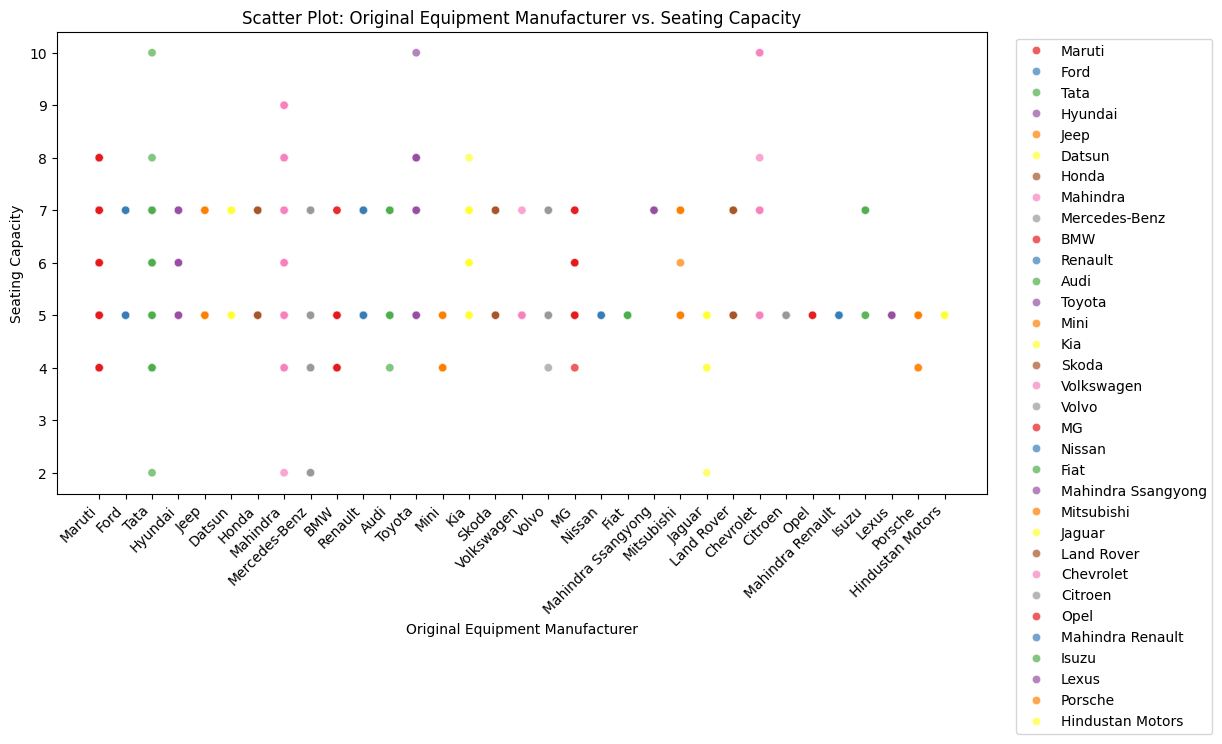

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_cities_data' is your DataFrame

# Create scatter plot with adjusted transparency
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.scatterplot(x='original_equipment_manufacturer', y='seating_capacity', data=all_cities_data, hue='original_equipment_manufacturer', palette='Set1', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Original Equipment Manufacturer')
plt.ylabel('Seating Capacity')
plt.title('Scatter Plot: Original Equipment Manufacturer vs. Seating Capacity')

# Move legend to a different position
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show plot
plt.show()


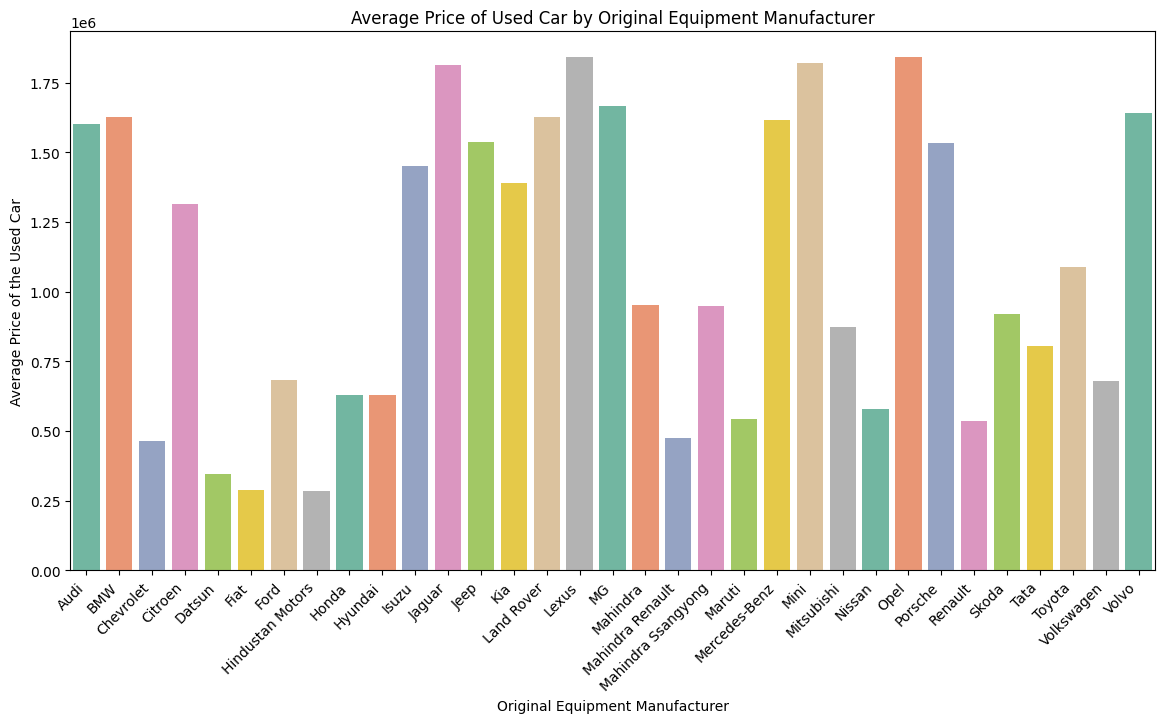

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_cities_data' is your DataFrame

# Calculate average price by original equipment manufacturer
avg_price_by_oem = all_cities_data.groupby('original_equipment_manufacturer')['price_of_the_used_car'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
sns.barplot(x='original_equipment_manufacturer', y='price_of_the_used_car', data=avg_price_by_oem, hue='original_equipment_manufacturer', palette='Set2', dodge=False, legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Original Equipment Manufacturer')
plt.ylabel('Average Price of the Used Car')
plt.title('Average Price of Used Car by Original Equipment Manufacturer')

# Show plot
plt.show()


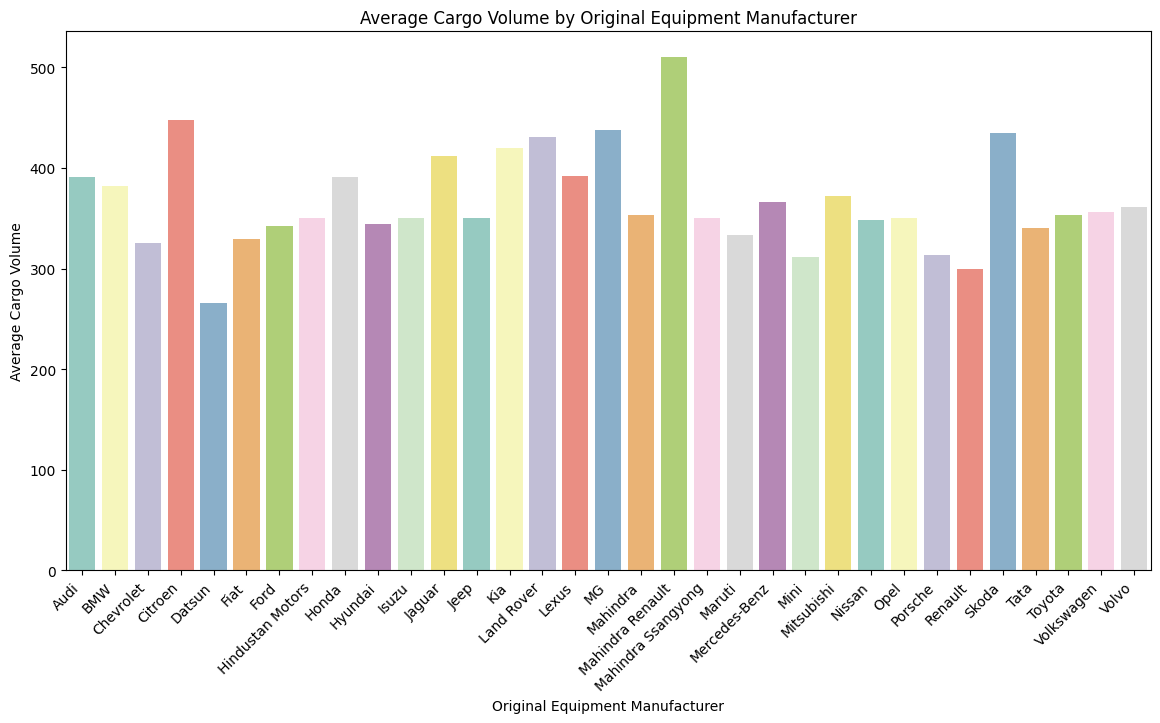

In [176]:
# Calculate average cargo volume by original equipment manufacturer
avg_cargo_volume_by_oem = all_cities_data.groupby('original_equipment_manufacturer')['cargo_volume'].mean().reset_index()

# Create bar plot
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
sns.barplot(x='original_equipment_manufacturer', y='cargo_volume', data=avg_cargo_volume_by_oem, hue='original_equipment_manufacturer', palette='Set3', dodge=False)

# Remove legend since it's not needed
plt.legend([],[], frameon=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Original Equipment Manufacturer')
plt.ylabel('Average Cargo Volume')
plt.title('Average Cargo Volume by Original Equipment Manufacturer')

# Show plot
plt.show()


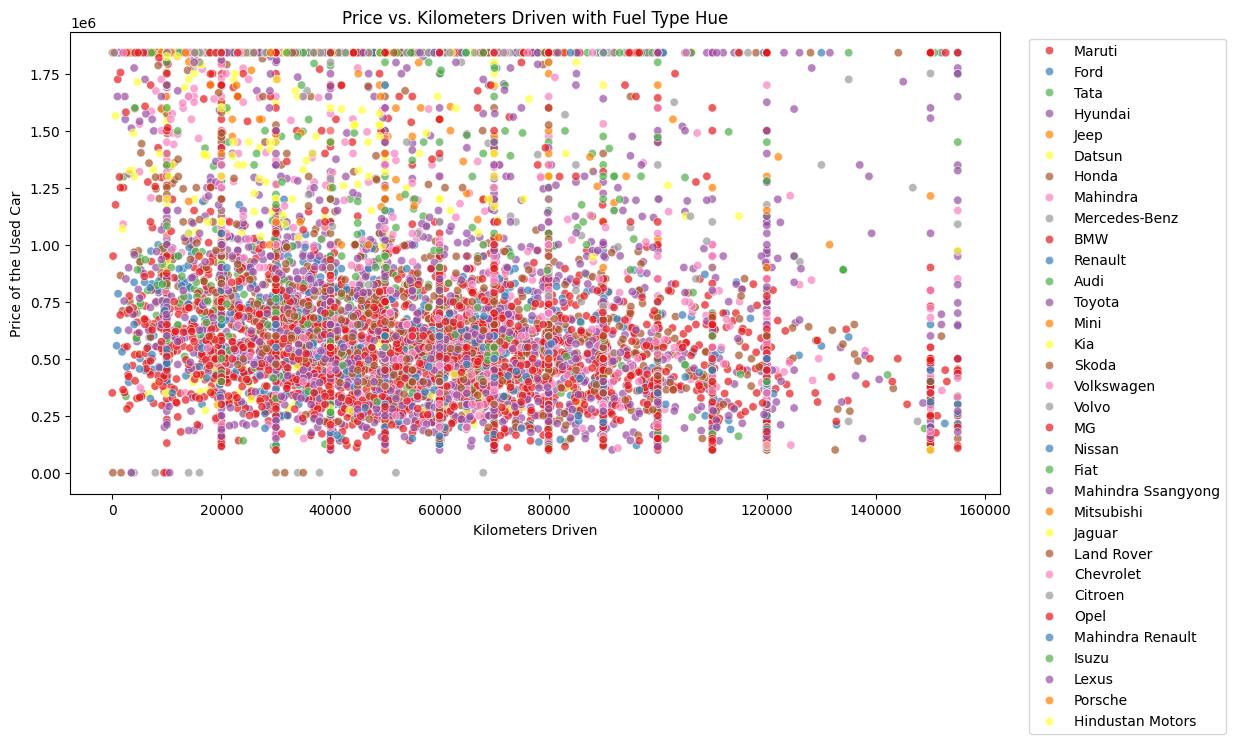

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_cities_data' is your DataFrame

# Create scatter plot with hue based on 'fuel_type'
plt.figure(figsize=(12, 6))  # Set the figure size for better readability
sns.scatterplot(x='kilometers_driven', y='price_of_the_used_car', hue= 'original_equipment_manufacturer', data=all_cities_data, palette='Set1', alpha=0.7)

# Set labels and title
plt.xlabel('Kilometers Driven')
plt.ylabel('Price of the Used Car')
plt.title('Price vs. Kilometers Driven with Fuel Type Hue')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

# Show plot
plt.show()


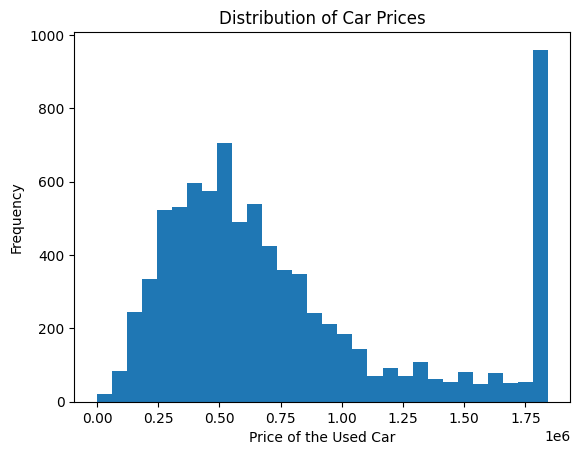

In [178]:
plt.hist(all_cities_data['price_of_the_used_car'], bins=30)
plt.xlabel('Price of the Used Car')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()


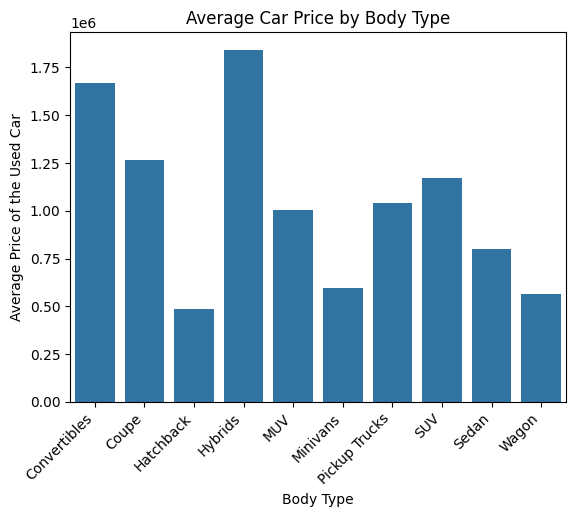

In [179]:
# Calculate average price by body type
avg_price_by_body_type = all_cities_data.groupby('body_type')['price_of_the_used_car'].mean().reset_index()

# Create bar plot
sns.barplot(x='body_type', y='price_of_the_used_car', data=avg_price_by_body_type)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.xlabel('Body Type')
plt.ylabel('Average Price of the Used Car')
plt.title('Average Car Price by Body Type')

# Show plot
plt.show()



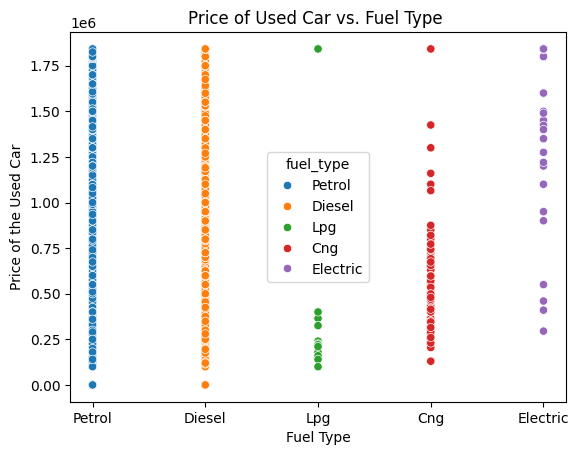

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_cities_data' is your DataFrame

# Create scatter plot with hue
sns.scatterplot(x='fuel_type', y='price_of_the_used_car', hue='fuel_type', data=all_cities_data)

# Set labels and title
plt.xlabel('Fuel Type')
plt.ylabel('Price of the Used Car')
plt.title('Price of Used Car vs. Fuel Type ')

# Show plot
plt.show()


In [181]:
fuel_type_counts = all_cities_data['fuel_type'].value_counts()

# Display the value counts
print(fuel_type_counts)


fuel_type
Petrol      5491
Diesel      2655
Cng           96
Electric      28
Lpg           16
Name: count, dtype: int64


In [184]:
all_cities_data.columns

Index(['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration',
       'price_of_the_used_car'],
      dtype='object')

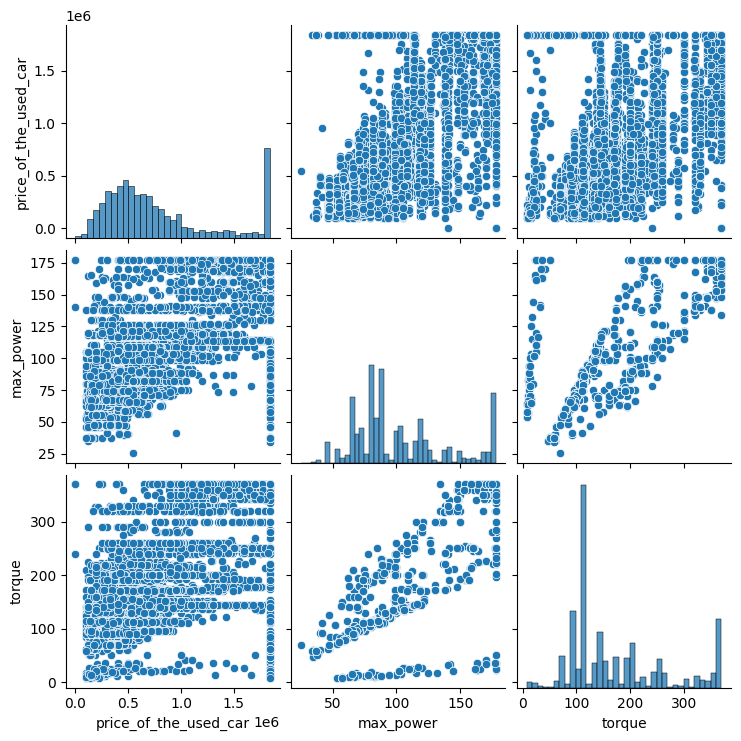

In [181]:
selected_features = ['price_of_the_used_car', 'max_power', 'torque']
sns.pairplot(all_cities_data[selected_features])
plt.show()


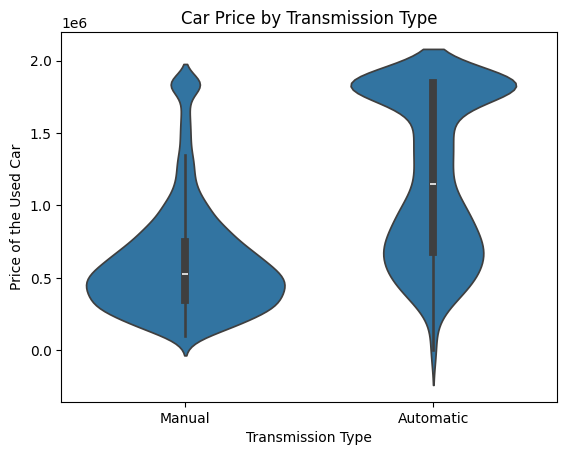

In [183]:
sns.violinplot(x='transmission_type', y='price_of_the_used_car', data =all_cities_data)
plt.xlabel('Transmission Type')
plt.ylabel('Price of the Used Car')
plt.title('Car Price by Transmission Type')
plt.show()


In [185]:
all_cities_data.columns

Index(['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration',
       'price_of_the_used_car'],
      dtype='object')

## Encode categorical columns

In [183]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_columns = [
    'insurance_validity', 'body_type', 'seating_capacity', 'rear_brake_type', 'fuel_supply_system',
    'no_door_numbers', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder', 'tyre_type', 'year_of_manufacture',
    'steering_type', 'values_per_cylinder', 'fuel_type', 'original_equipment_manufacturer','variant_name',
    'wheel_size', 'turbo_charger','ownership_details', 'car_model', 'city', 'transmission_type', 'super_charger', 
    'year_of_car_manufacture','registration_year', 'front_brake_type', 'engine_type', 'color', 'value_configuration',
    'drive_type', 'rto_available'
]

# Initialize a dictionary to store label encoders and their mappings
label_encoders = {}
encoded_mappings = {}

# Apply LabelEncoder to each categorical column and store the mappings
for column in categorical_columns:
    if column in all_cities_data.columns:
        le = LabelEncoder()
        all_cities_data[column] = le.fit_transform(all_cities_data[column].astype(str))
        label_encoders[column] = le
        # Add quotes to both keys and values
        encoded_mappings[column] = {f"{index}": f"{label}" for index, label in enumerate(le.classes_)}

# Verify the updates
# print("Sample of the dataset after label encoding:")
# print(all_cities_data.head(1))

# Print encoded mappings for each column
print("\nEncoded mappings for categorical columns:")
for column, mapping in encoded_mappings.items():
    print(f"{column}: {mapping}")



Encoded mappings for categorical columns:
insurance_validity: {'0': 'comprehensive', '1': 'not_available', '2': 'third_party', '3': 'third_party_insurance', '4': 'zero_depreciation'}
body_type: {'0': 'Convertibles', '1': 'Coupe', '2': 'Hatchback', '3': 'Hybrids', '4': 'MUV', '5': 'Minivans', '6': 'Pickup Trucks', '7': 'SUV', '8': 'Sedan', '9': 'Wagon'}
seating_capacity: {'0': '10.0', '1': '2.0', '2': '4.0', '3': '5.0', '4': '6.0', '5': '7.0', '6': '8.0', '7': '9.0'}
rear_brake_type: {'0': 'booster_assisted_drums', '1': 'disc_&_caliper', '2': 'discs', '3': 'drum_in_discs', '4': 'drums', '5': 'electric_parking_brake', '6': 'leading_trailing_drums', '7': 'mechanical_hydraulic_dual_circuit', '8': 'self_adjusting_drums', '9': 'solid_discs', '10': 'vacuum_assisted_hydraulic_dual_circuit', '11': 'ventilated_discs', '12': 'ventilated_drums'}
fuel_supply_system: {'0': '3_phase_ac_induction_motors', '1': 'common_rail_diesel_injection', '2': 'common_rail_direct_injection', '3': 'compressed_natur

In [186]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr

# Assuming 'all_cities_data' is your DataFrame
data = all_cities_data

# Function to calculate point biserial correlation
def calculate_point_biserial(df, continuous_col, dichotomous_col):
    return pointbiserialr(df[dichotomous_col], df[continuous_col])[0]

# Calculating Pearson, Spearman, and Kendall Tau correlations
pearson_corr = data.corr(method='pearson')['price_of_the_used_car']
spearman_corr = data.corr(method='spearman')['price_of_the_used_car']
kendall_tau_corr = data.corr(method='kendall')['price_of_the_used_car']

# Point Biserial correlation for relevant dichotomous columns
# Replace 'dichotomous_column_name' with actual column names
dichotomous_columns = ['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration',
       'price_of_the_used_car']  # List your dichotomous columns
point_biserial_corr = {}
for col in dichotomous_columns:
    point_biserial_corr[col] = calculate_point_biserial(data, 'price_of_the_used_car', col)

# Display the results
print("Pearson Correlation with Price of the Used Car:\n", pearson_corr)
print("\nSpearman Correlation with Price of the Used Car:\n", spearman_corr)
print("\nKendall Tau Correlation with Price of the Used Car:\n", kendall_tau_corr)
print("\nPoint Biserial Correlation with Price of the Used Car:")
for col, corr_value in point_biserial_corr.items():
    print(f"{col}: {corr_value}")


Pearson Correlation with Price of the Used Car:
 original_equipment_manufacturer   -0.033746
car_model                         -0.010321
variant_name                      -0.050304
seating_capacity                   0.193650
no_door_numbers                   -0.029281
ownership_details                 -0.149125
city                              -0.112096
transmission_type                 -0.512211
drive_type                        -0.059709
torque                             0.686874
max_power                          0.744814
acceleration                      -0.429429
fuel_type                         -0.280395
fuel_supply_system                -0.236518
year_of_manufacture                0.391131
year_of_car_manufacture            0.375985
color                             -0.083725
registration_year                  0.385484
kilometers_driven                 -0.236639
mileage_in_kmpl                   -0.405619
steering_type                     -0.067050
body_type                  

<Figure size 2000x1200 with 0 Axes>

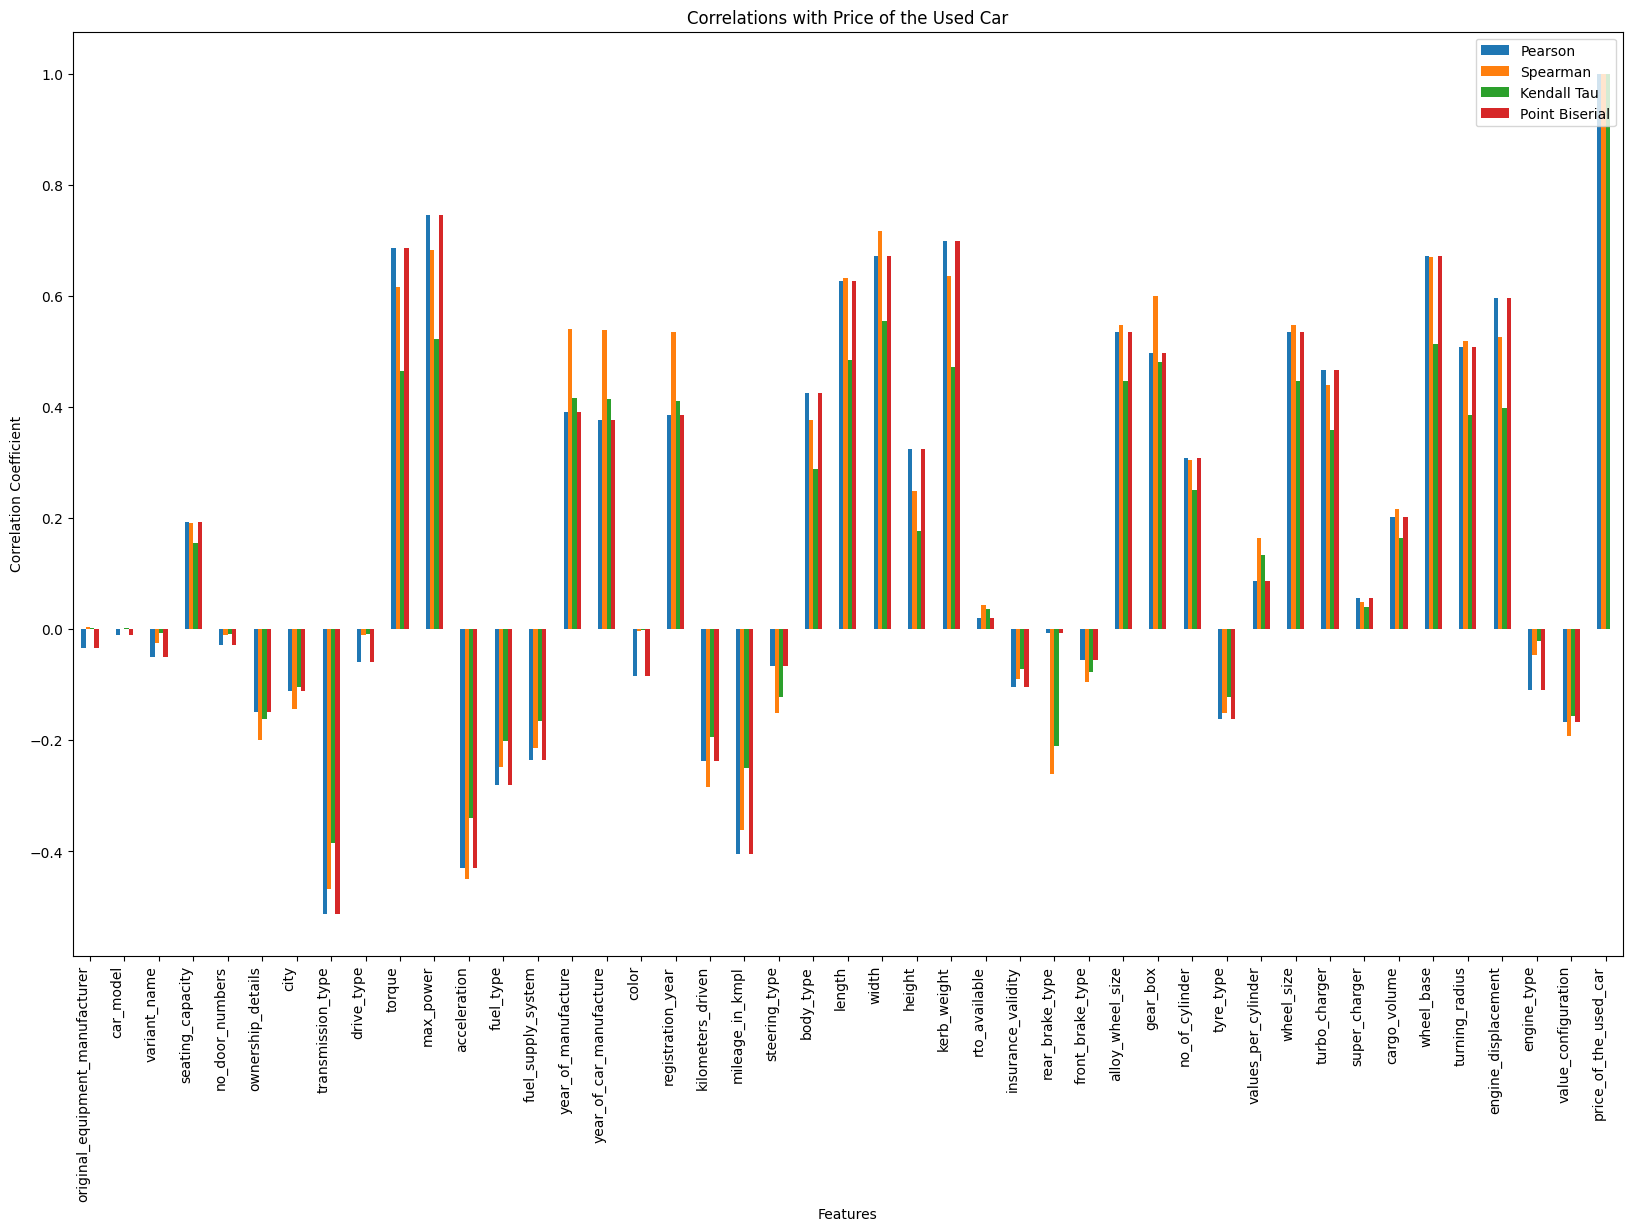

In [191]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_cities_data' is your DataFrame
data = all_cities_data

# Function to calculate point biserial correlation
def calculate_point_biserial(df, continuous_col, dichotomous_col):
    return pointbiserialr(df[dichotomous_col], df[continuous_col])[0]

# Calculating Pearson, Spearman, and Kendall Tau correlations
pearson_corr = data.corr(method='pearson')['price_of_the_used_car']
spearman_corr = data.corr(method='spearman')['price_of_the_used_car']
kendall_tau_corr = data.corr(method='kendall')['price_of_the_used_car']

# Point Biserial correlation for relevant dichotomous columns
# Replace 'dichotomous_column_name' with actual column names
dichotomous_columns = ['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration']  # List your dichotomous columns
point_biserial_corr = {}
for col in dichotomous_columns:
    point_biserial_corr[col] = calculate_point_biserial(data, 'price_of_the_used_car', col)

# Combine all correlations into a DataFrame for plotting
corr_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr,
    'Kendall Tau': kendall_tau_corr
}).dropna()

# Add point biserial correlations
for col, corr_value in point_biserial_corr.items():
    corr_df.loc[col, 'Point Biserial'] = corr_value

# Plotting the correlations
plt.figure(figsize=(20, 12))
corr_df.plot(kind='bar', figsize=(20, 12))
plt.title('Correlations with Price of the Used Car')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90, ha='right')
plt.legend(loc='upper right')
plt.show()



## Identifying Outliers

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns to create box plots for
columns_to_cap = ['length', 'kerb_weight', 'price_of_the_used_car', 'kilometers_driven', 'mileage_in_kmpl', 'acceleration',
                  'height', 'width', 'cargo_volume', 'wheel_base', 'turning_radius', 
                   'torque', 'engine_displacement', 'max_power']

# Filter only numeric columns
numeric_columns = [col for col in columns_to_cap if pd.api.types.is_numeric_dtype(all_cities_data[col])]

# Create box plots for each numeric column
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Create a subplot for each column
    plt.boxplot(all_cities_data[column].dropna(), vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()


In [367]:
all_cities_data.columns

Index(['original_equipment_manufacturer', 'car_model', 'variant_name',
       'seating_capacity', 'no_door_numbers', 'ownership_details', 'city',
       'transmission_type', 'drive_type', 'torque', 'max_power',
       'acceleration', 'fuel_type', 'fuel_supply_system',
       'year_of_manufacture', 'year_of_car_manufacture', 'color',
       'registration_year', 'kilometers_driven', 'mileage_in_kmpl',
       'steering_type', 'body_type', 'length', 'width', 'height',
       'kerb_weight', 'rto_available', 'insurance_validity', 'rear_brake_type',
       'front_brake_type', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder',
       'tyre_type', 'values_per_cylinder', 'wheel_size', 'turbo_charger',
       'super_charger', 'cargo_volume', 'wheel_base', 'turning_radius',
       'engine_displacement', 'engine_type', 'value_configuration',
       'price_of_the_used_car'],
      dtype='object')

### Co-relation between columns

In [368]:
# Compute correlation matrix
correlation_matrix = all_cities_data.corr()

# Get the correlation values for 'price_of_the_used_car'
price_correlation = correlation_matrix['price_of_the_used_car'].sort_values(ascending=False)

# Display the correlation values
print(price_correlation)


price_of_the_used_car              1.000000
max_power                          0.744814
kerb_weight                        0.698747
torque                             0.686874
wheel_base                         0.671105
width                              0.670987
length                             0.626227
engine_displacement                0.595289
alloy_wheel_size                   0.534442
wheel_size                         0.534442
turning_radius                     0.507897
gear_box                           0.497505
turbo_charger                      0.465873
body_type                          0.424104
year_of_manufacture                0.391131
registration_year                  0.385484
year_of_car_manufacture            0.375985
height                             0.323550
no_of_cylinder                     0.307638
cargo_volume                       0.201743
seating_capacity                   0.193650
values_per_cylinder                0.087149
super_charger                   

In [ ]:
all_cities_data.isnull().sum()

## Model Training

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define X and y
X = all_cities_data.drop(columns=['price_of_the_used_car'])
y = all_cities_data['price_of_the_used_car']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, enable_categorical=True)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'Mean Absolute Error': mae, 'R² Score': r2}

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Absolute Error: {metrics['Mean Absolute Error']}")
    print(f"  R² Score: {metrics['R² Score']}")
    print()


In [366]:
import pandas as pd

# Assuming all_cities_data is your DataFrame
# Save the DataFrame to an Excel file
file_path = r'F:\GUVI\Projects\P3 -CarDekho\all_cities_data.xlsx'
all_cities_data.to_excel(file_path, index=False)

print(f"DataFrame saved to {file_path}")


DataFrame saved to F:\GUVI\Projects\P3 -CarDekho\all_cities_data.xlsx


In [ ]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define X and y
X = all_cities_data.drop(columns=['price_of_the_used_car'])
y = all_cities_data['price_of_the_used_car']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Random Forest Regressor:")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print()

# Save the trained model to a file
joblib.dump(model, 'random_forest_model.pkl')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# List of categorical columns
categorical_columns = [
    'insurance_validity', 'body_type', 'seating_capacity', 'rear_brake_type', 'fuel_supply_system',
    'no_door_numbers', 'alloy_wheel_size', 'gear_box', 'no_of_cylinder', 'tyre_type', 'year_of_manufacture',
    'steering_type', 'values_per_cylinder', 'fuel_type', 'original_equipment_manufacturer', 
    'wheel_size', 'turbo_charger', 'ownership_details', 'car_model', 'city', 'transmission_type', 'super_charger', 
    'year_of_car_manufacture', 'registration_year', 'front_brake_type', 'engine_type', 'color', 'value_configuration',
    'drive_type', 'rto_available'
]

# Define X and y
X = all_cities_data.drop(columns=['price_of_the_used_car'])
y = all_cities_data['price_of_the_used_car']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=10, cat_features=categorical_columns, random_state=42, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = catboost_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost Regressor:")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")


In [ ]:
# Original dictionary
rear_brake_type= {0: 'booster_assisted_drums', 1: 'disc_&_caliper', 2: 'discs', 3: 'drum_in_discs', 4: 'drums', 5: 'electric_parking_brake', 6: 'leading_trailing_drums', 7: 'mechanical_hydraulic_dual_circuit', 8: 'self_adjusting_drums', 9: 'solid_discs', 10: 'vacuum_assisted_hydraulic_dual_circuit', 11: 'ventilated_discs', 12: 'ventilated_drums'}
# Function to add single quotes to keys and values
def add_single_quotes(d):
    return {f"{str(k)}": f"{v}" for k, v in d.items()}

# Apply the function to the dictionary
quoted_body_type = add_single_quotes(rear_brake_type)

# Display the updated dictionary
print("Updated dictionary with single quotes for keys and values:")
print(quoted_body_type)


In [ ]:

encoded_mappings =
"insurance_validity": {'0': 'comprehensive', '1': 'not_available', '2': 'third_party', '3': 'third_party_insurance', '4': 'zero_depreciation'},
"body_type": {'0': 'Convertibles', '1': 'Coupe', '2': 'Hatchback', '3': 'Hybrids', '4': 'MUV', '5': 'Minivans', '6': 'Pickup Trucks', '7': 'SUV', '8': 'Sedan', '9': 'Wagon'},
"seating_capacity": {'0': '10.0', '1': '2.0', '2': '4.0', '3': '5.0', '4': '6.0', '5': '7.0', '6': '8.0', '7': '9.0'},
"rear_brake_type": {'0': 'booster_assisted_drums', '1': 'disc_&_caliper', '2': 'discs', '3': 'drum_in_discs', '4': 'drums', '5': 'electric_parking_brake', '6': 'leading_trailing_drums', '7': 'mechanical_hydraulic_dual_circuit', '8': 'self_adjusting_drums', '9': 'solid_discs', '10': 'vacuum_assisted_hydraulic_dual_circuit', '11': 'ventilated_discs', '12': 'ventilated_drums'},
"fuel_supply_system": {'0': '3_phase_ac_induction_motors', '1': 'common_rail_diesel_injection', '2': 'common_rail_direct_injection', '3': 'compressed_natural_gas', '4': 'diesel_direct_injection_system', '5': 'diesel_exhaust_gas_desulsurization_technology', '6': 'direct_fuel_injection', '7': 'direct_injection', '8': 'direct_injection_4_stroke', '9': 'distribution_type_fuel_injection', '10': 'dual_overhead_camshaft', '11': 'dual_point_fuel_injection', '12': 'dual_variable_valve_timing_with_intelligence', '13': 'electric', '14': 'electronic_fuel_injection', '15': 'gasoline_direct_injection', '16': 'indirect_diesel_injection', '17': 'indirect_injection', '18': 'integrated_starter_generator', '19': 'intelligent_gas_port_injection', '20': 'multi_point_fuel_injection', '21': 'multi_point_fuel_injection_with_cng', '22': 'multi_point_fuel_injection_with_lpg', '23': 'port_fuel_injection', '24': 'programmed_fuel_injection', '25': 'sequential_electronic_fuel_injection', '26': 'sequential_multi_point_fuel_injection', '27': 'turbocharged_direct_injection', '28': 'turbocharged_fuel_stratified_injection', '29': 'turbocharged_gasoline_direct_injection', '30': 'turbocharged_stratified_injection', '31': 'twin_independent_variable_camshaft_timing', '32': 'variable_valve_timing_with_intelligence'},
"no_door_numbers": {'0': '2.0', '1': '3.0', '2': '4.0', '3': '5.0', '4': '6.0'},
"alloy_wheel_size": {'0': '12', '1': '13', '2': '14', '3': '15', '4': '16', '5': '17', '6': '18', '7': '19', '8': '20', '9': '21'},
"gear_box": {'0': '4_speed', '1': '4_speed_', '2': '5_speed', '3': '6_speed', '4': '7_speed', '5': '8_speed', '6': '9_speed', '7': 'ags', '8': 'cvt', '9': 'other_speeds'},
"no_of_cylinder": {'0': '2.0', '1': '3.0', '2': '4.0', '3': '5.0', '4': '6.0', '5': '7.0', '6': '8.0'},
"tyre_type": {'0': 'radial_tyres', '1': 'tubeless_radial_tyres', '2': 'tubeless_runflat_tyres', '3': 'tubeless_tyres', '4': 'tubeless_tyres_all_terrain', '5': 'tubeless_tyres_mud_terrain'},
"year_of_manufacture": {'0': '2002.0', '1': '2003.0', '2': '2004.0', '3': '2005.0', '4': '2006.0', '5': '2007.0', '6': '2008.0', '7': '2009.0', '8': '2010.0', '9': '2011.0', '10': '2012.0', '11': '2013.0', '12': '2014.0', '13': '2015.0', '14': '2016.0', '15': '2017.0', '16': '2018.0', '17': '2019.0', '18': '2020.0', '19': '2021.0', '20': '2022.0', '21': '2023.0'},
"steering_type": {'0': 'Electric', '1': 'Hydraulic', '2': 'Manual', '3': 'Power'},
"values_per_cylinder": {'0': '2.0', '1': '3.0', '2': '4.0', '3': '5.0'},
"fuel_type": {'0': 'Cng', '1': 'Diesel', '2': 'Electric', '3': 'Lpg', '4': 'Petrol'},
"original_equipment_manufacturer": {'0': 'Audi', '1': 'BMW', '2': 'Chevrolet', '3': 'Citroen', '4': 'Datsun', '5': 'Fiat', '6': 'Ford', '7': 'Hindustan Motors', '8': 'Honda', '9': 'Hyundai', '10': 'Isuzu', '11': 'Jaguar', '12': 'Jeep', '13': 'Kia', '14': 'Land Rover', '15': 'Lexus', '16': 'MG', '17': 'Mahindra', '18': 'Mahindra Renault', '19': 'Mahindra Ssangyong', '20': 'Maruti', '21': 'Mercedes-Benz', '22': 'Mini', '23': 'Mitsubishi', '24': 'Nissan', '25': 'Opel', '26': 'Porsche', '27': 'Renault', '28': 'Skoda', '29': 'Tata', '30': 'Toyota', '31': 'Volkswagen', '32': 'Volvo'},
"variant_name": {'0': '1.0', '1': '1.0 AMT RXL', '2': '1.0 AMT RXT', '3': '1.0 Ecoboost Titanium', '4': '1.0 Ecoboost Titanium Plus BSIV', '5': '1.0 Era Plus', '6': '1.0 Kappa Magna Plus', '7': '1.0 LS', '8': '1.0 LS LPG', '9': '1.0 LT', '10': '1.0 LT Option Pack w/ Airbag', '11': '1.0 MPI Comfortline', '12': '1.0 MPI Highline', '13': '1.0 MPI Highline Plus', '14': '1.0 MPI Highline Plus BSIV', '15': '1.0 MPI Trendline', '16': '1.0 Petrol', '17': '1.0 RXL', '18': '1.0 RXL 02 Anniversary Edition', '19': '1.0 RXL BSVI', '20': '1.0 RXT', '21': '1.0 RXT 02 Anniversary Edition', '22': '1.0 RXT AMT', '23': '1.0 RXT AMT BSVI', '24': '1.0 RXT AMT Opt', '25': '1.0 RXT BSVI', '26': '1.0 RXT Opt', '27': '1.0 RXT Opt BSIV', '28': '1.0 RXT Optional', '29': '1.0 RXT Optional AT 2016-2019', '30': '1.0 S', '31': '1.0 T Option', '32': '1.0 TSI Active BSVI', '33': '1.0 TSI Ambition', '34': '1.0 TSI Ambition AT', '35': '1.0 TSI Ambition AT BSVI', '36': '1.0 TSI Ambition BSVI', '37': '1.0 TSI Comfortline', '38': '1.0 TSI Comfortline AT', '39': '1.0 TSI Comfortline BSVI', '40': '1.0 TSI Highline', '41': '1.0 TSI Highline AT BSVI', '42': '1.0 TSI Highline Plus', '43': '1.0 TSI Highline Plus AT', '44': '1.0 TSI Monte Carlo', '45': '1.0 TSI Style', '46': '1.0 TSI Style AT', '47': '1.0 TSI Style AT Anniversary Edition BSVI', '48': '1.0 TSI Style AT BSVI', '49': '1.0 TSI Style BSVI', '50': '1.0 TSI Topline AT BSVI', '51': '1.0 TSI Topline BSVI', '52': '1.05 Revotorq XM', '53': '1.05 Revotorq XT', '54': '1.05 Revotorq XZ', '55': '1.05 Revotorq XZ Plus DualTone', '56': '1.05 Revotorq XZ WO Alloy', '57': '1.1 CRDi Base', '58': '1.1 CRDi S', '59': '1.1 CRDi S Option', '60': '1.1 CRDi SX', '61': '1.1 CRDi SX Option', '62': '1.1 GLE', '63': '1.1 LXI BSIII', '64': '1.1 SLX', '65': '1.2 AMT Alpha BSIV', '66': '1.2 AMT Delta BSIV', '67': '1.2 AMT Zeta BSIV', '68': '1.2 Active', '69': '1.2 Alpha', '70': '1.2 Alpha BSIV', '71': '1.2 Asta', '72': '1.2 Asta Dual Tone', '73': '1.2 Asta Option', '74': '1.2 Asta with AVN', '75': '1.2 CRDi Asta', '76': '1.2 CRDi E Plus', '77': '1.2 CRDi Magna', '78': '1.2 CRDi SX', '79': '1.2 CRDi SX Option', '80': '1.2 CRDi Sportz', '81': '1.2 CRDi Sportz Option', '82': '1.2 CVT Alpha', '83': '1.2 CVT Delta', '84': '1.2 CVT Zeta', '85': '1.2 Delta', '86': '1.2 Delta BSIV', '87': '1.2 Emotion', '88': '1.2 Era', '89': '1.2 G', '90': '1.2 Highline Plus AT 16 Alloy', '91': '1.2 Kappa AT SX Option', '92': '1.2 Kappa Asta', '93': '1.2 Kappa Era', '94': '1.2 Kappa Magna AT', '95': '1.2 Kappa Magna BSIV', '96': '1.2 Kappa Magna CNG BSIV', '97': '1.2 Kappa S', '98': '1.2 Kappa S AT', '99': '1.2 Kappa S CNG', '100': '1.2 Kappa S Celebration Edition', '101': '1.2 Kappa S Option', '102': '1.2 Kappa SX', '103': '1.2 Kappa SX Option', '104': '1.2 Kappa Sportz BSIV', '105': '1.2 Kappa Sportz Dual Tone', '106': '1.2 Kappa Sportz Option', '107': '1.2 Kappa Sportz Option AT', '108': '1.2 LS', '109': '1.2 LS ABS', '110': '1.2 LXi BSIII', '111': '1.2 MPI Ambiente Petrol', '112': '1.2 MPI Ambition', '113': '1.2 MPI Comfortline', '114': '1.2 MPI Elegance', '115': '1.2 MPI Highline', '116': '1.2 MPI Highline 16 Alloy', '117': '1.2 MPI Highline Plus', '118': '1.2 MPI Trendline', '119': '1.2 Magna', '120': '1.2 Magna Executive', '121': '1.2 Magna Opt', '122': '1.2 Revotron XB', '123': '1.2 Revotron XE', '124': '1.2 Revotron XM', '125': '1.2 Revotron XM Option', '126': '1.2 Revotron XMA', '127': '1.2 Revotron XT', '128': '1.2 Revotron XTA', '129': '1.2 Revotron XZ', '130': '1.2 Revotron XZ Option', '131': '1.2 Revotron XZ Plus', '132': '1.2 Revotron XZ Plus Dual Tone', '133': '1.2 Revotron XZ WO Alloy', '134': '1.2 Revotron XZA', '135': '1.2 Revotron XZA Plus', '136': '1.2 Revotron XZA Plus DualTone', '137': '1.2 S', '138': '1.2 S AT i VTEC', '139': '1.2 S MT', '140': '1.2 S Option MT', '141': '1.2 S STD', '142': '1.2 S STD CNG', '143': '1.2 S i VTEC', '144': '1.2 SV i VTEC', '145': '1.2 SX', '146': '1.2 SX Dual Tone', '147': '1.2 Sigma', '148': '1.2 Sigma BSIV', '149': '1.2 Sportz', '150': '1.2 Sportz Option', '151': '1.2 Spotz', '152': '1.2 TDI', '153': '1.2 TDI Ambition Plus', '154': '1.2 TSI Highline AT', '155': '1.2 TSI Highline Plus AT', '156': '1.2 Ti-VCT Titanium', '157': '1.2 Ti-VCT Titanium Plus', '158': '1.2 Ti-VCT Trend', '159': '1.2 V', '160': '1.2 V AT i VTEC', '161': '1.2 V AT i VTEC Privilege', '162': '1.2 V i VTEC', '163': '1.2 VDI BSII', '164': '1.2 VTVT E Plus', '165': '1.2 VTVT S', '166': '1.2 VTVT SX', '167': '1.2 VTVT SX Option', '168': '1.2 VX AT', '169': '1.2 VX Dual Tone', '170': '1.2 VX MT', '171': '1.2 VX i VTEC', '172': '1.2 VXi BSII', '173': '1.2 Vxi BSIV', '174': '1.2 ZXi BSIV', '175': '1.2 Zeta', '176': '1.2 Zeta BSIV', '177': '1.2L Diesel Elegance', '178': '1.2L G', '179': '1.2P Titanium MT', '180': '1.2P Titanium Opt MT', '181': '1.2P Trend MT', '182': '1.3 AMT Zeta', '183': '1.3 Active', '184': '1.3 Alpha', '185': '1.3 Base', '186': '1.3 Delta', '187': '1.3 Dynamic', '188': '1.3 EXI', '189': '1.3 Emotion', '190': '1.3 Flair', '191': '1.3 GLS', '192': '1.3 LS', '193': '1.3 LXI', '194': '1.3 S Diesel', '195': '1.3 Sigma', '196': '1.3 TCDi LTZ 8', '197': '1.3 Turbo XV Pre Option', '198': '1.3 VXI ABS', '199': '1.3 VXi', '200': '1.3 Zeta', '201': '1.3L Advanced Multi-Jet', '202': '1.4 AT Alpha', '203': '1.4 AT Delta', '204': '1.4 AT Zeta', '205': '1.4 Alpha', '206': '1.4 Anniversary Edition DCT 2021-2022', '207': '1.4 Asta', '208': '1.4 Asta Dual Tone', '209': '1.4 CRDi', '210': '1.4 CRDi Asta', '211': '1.4 CRDi Magna', '212': '1.4 CRDi S', '213': '1.4 CRDi S Plus', '214': '1.4 CRDi Sportz', '215': '1.4 DGL', '216': '1.4 Delta', '217': '1.4 Duratorq LXI', '218': '1.4 Duratorq Titanium', '219': '1.4 E Plus', '220': '1.4 E Plus CRDi', '221': '1.4 EX Diesel', '222': '1.4 Emotion', '223': '1.4 GD', '224': '1.4 GLX Petrol', '225': '1.4 LS', '226': '1.4 LS Limited Edition', '227': '1.4 Limited', '228': '1.4 Limited Opt DCT BSVI', '229': '1.4 Limited Option', '230': '1.4 Limited Option Black', '231': '1.4 Limited Plus', '232': '1.4 Limited Plus BSIV', '233': '1.4 Longitude Plus AT', '234': '1.4 Magna AT', '235': '1.4 Night Eagle', '236': '1.4 S', '237': '1.4 SX', '238': '1.4 SXI Duratorq', '239': '1.4 Sport', '240': '1.4 Sport BSVI', '241': '1.4 Sport Plus', '242': '1.4 Sport Plus BSIV', '243': '1.4 Sportz', '244': '1.4 T-Jet', '245': '1.4 TDCi EXI', '246': '1.4 TDI Ambiente', '247': '1.4 TDI Classic', '248': '1.4 TSI Comfortline', '249': '1.4 TSI MT Ambition', '250': '1.4 VTVT', '251': '1.4 ZXi TDCi LE', '252': '1.4 Zeta', '253': '1.4Gsi', '254': '1.4L GD', '255': '1.4L VD', '256': '1.5 D4 BSIV', '257': '1.5 DLE Diesel', '258': '1.5 DLS BSIV ABS Diesel', '259': '1.5 DV5 MT Ambiente', '260': '1.5 DV5 MT Titanium', '261': '1.5 DV5 MT Titanium Optional', '262': '1.5 Diesel Ambiente', '263': '1.5 Diesel Ambiente BSIV', '264': '1.5 Diesel Platine', '265': '1.5 Diesel RXL', '266': '1.5 Diesel RXT', '267': '1.5 Diesel RXT Mono', '268': '1.5 Diesel Titanium', '269': '1.5 Diesel Titanium BSIV', '270': '1.5 Diesel Titanium Plus', '271': '1.5 Diesel Titanium Plus BSIV', '272': '1.5 Diesel Trend', '273': '1.5 Diesel Trend BSIV', '274': '1.5 Diesel Trend Plus BSIV', '275': '1.5 E MT', '276': '1.5 E i DTEC', '277': '1.5 G', '278': '1.5 GLXi', '279': '1.5 GT Plus Edge Matte DSG', '280': '1.5 GTX Plus Diesel AT DT', '281': '1.5 GTX Plus Diesel DT', '282': '1.5 GXI', '283': '1.5 GXI CVT', '284': '1.5 Petrol Ambiente BSIV', '285': '1.5 Petrol RXE', '286': '1.5 Petrol Titanium', '287': '1.5 Petrol Titanium AT', '288': '1.5 Petrol Titanium BSIV', '289': '1.5 Petrol Titanium Plus', '290': '1.5 Petrol Titanium Plus AT', '291': '1.5 Petrol Titanium Plus AT BSIV', '292': '1.5 Petrol Titanium Plus BSIV', '293': '1.5 Petrol Trend', '294': '1.5 Petrol Trend BSIV', '295': '1.5 Petrol Trend Plus AT BSIV', '296': '1.5 Revotorq XE', '297': '1.5 Revotorq XM', '298': '1.5 Revotorq XMA', '299': '1.5 Revotorq XT', '300': '1.5 Revotorq XZ Plus', '301': '1.5 Revotorq XZA Plus', '302': '1.5 Revotorq XZA Plus DualTone', '303': '1.5 S AT', '304': '1.5 S MT', '305': '1.5 S i DTEC', '306': '1.5 SV i DTEC', '307': '1.5 Signature (O) 7-Seater Diesel AT', '308': '1.5 Sports Edition MT', '309': '1.5 TDCi Ambiente', '310': '1.5 TDCi Ambiente BSIV', '311': '1.5 TDCi Titanium', '312': '1.5 TDCi Titanium BSIV', '313': '1.5 TDCi Titanium Plus', '314': '1.5 TDCi Titanium Plus BSIV', '315': '1.5 TDCi Trend', '316': '1.5 TDCi Trend BSIV', '317': '1.5 TDCi Trend Plus BE BSIV', '318': '1.5 TDI AT Ambition BSIV', '319': '1.5 TDI AT Elegance', '320': '1.5 TDI AT Elegance Plus', '321': '1.5 TDI AT Style BSIV', '322': '1.5 TDI Ambition BSIV', '323': '1.5 TDI Ambition Plus', '324': '1.5 TDI Ambition With Alloy Wheel', '325': '1.5 TDI Comfortline', '326': '1.5 TDI Comfortline AT', '327': '1.5 TDI Elegance Black Package', '328': '1.5 TDI Highline', '329': '1.5 TDI Highline AT', '330': '1.5 TDI Highline Plus', '331': '1.5 TDI Highline Plus 16 AT', '332': '1.5 TDI Style BSIV', '333': '1.5 TDI Trendline', '334': '1.5 TSI GT DSG', '335': '1.5 TSI GT Plus BSVI', '336': '1.5 TSI Style AT BSVI', '337': '1.5 TSI Style BSVI', '338': '1.5 TSI Style DSG', '339': '1.5 Ti VCT AT Titanium', '340': '1.5 Ti VCT AT Titanium BSIV', '341': '1.5 Ti VCT MT Ambiente', '342': '1.5 Ti VCT MT Ambiente BSIV', '343': '1.5 Ti VCT MT Titanium BSIV', '344': '1.5 Ti VCT MT Trend BSIV', '345': '1.5 Ti-VCT Titanium', '346': '1.5 Turbo Savvy Pro CVT', '347': '1.5 Turbo Sharp Pro CVT', '348': '1.5 Turbo Smart pro BSVI', '349': '1.5 V', '350': '1.5 V AT', '351': '1.5 V AT Sunroof', '352': '1.5 V MT', '353': '1.5 V MT Exclusive', '354': '1.5 V i DTEC', '355': '1.5 VDI', '356': '1.5 VX i DTEC', '357': '1.5D Base MT', '358': '1.5D Titanium MT', '359': '1.5D Trend MT', '360': '1.6', '361': '1.6 CLXI', '362': '1.6 CRDI', '363': '1.6 CRDI AT SX Option', '364': '1.6 CRDI SX Option', '365': '1.6 CRDi AT S', '366': '1.6 CRDi AT S Plus', '367': '1.6 CRDi AT SX', '368': '1.6 CRDi AT SX Plus', '369': '1.6 CRDi Anniversary Edition', '370': '1.6 CRDi EX AT', '371': '1.6 CRDi EX MT', '372': '1.6 CRDi S', '373': '1.6 CRDi S Option', '374': '1.6 CRDi SX', '375': '1.6 CRDi SX Option', '376': '1.6 CRDi SX Plus', '377': '1.6 Comfortline', '378': '1.6 Duratec LXI', '379': '1.6 E Plus', '380': '1.6 EX Diesel', '381': '1.6 EX Petrol', '382': '1.6 EX VTVT', '383': '1.6 GLS Petrol', '384': '1.6 GSi', '385': '1.6 Highline', '386': '1.6 Highline BSIV', '387': '1.6 LS BS3', '388': '1.6 LT ABS BS3', '389': '1.6 MPI ALL STAR', '390': '1.6 MPI AT Ambition BSIV', '391': '1.6 MPI AT Ambition Plus', '392': '1.6 MPI AT Elegance', '393': '1.6 MPI AT Style BSIV', '394': '1.6 MPI AT Style Plus', '395': '1.6 MPI Active BSIV', '396': '1.6 MPI Ambition BSIV', '397': '1.6 MPI Style BSIV', '398': '1.6 SX', '399': '1.6 SX Automatic', '400': '1.6 SX Automatic Diesel', '401': '1.6 SX CRDI (O) AT', '402': '1.6 SX CRDi (O)', '403': '1.6 SX Diesel', '404': '1.6 SX Option', '405': '1.6 SX Option AT', '406': '1.6 SX Option Diesel', '407': '1.6 SX VTVT', '408': '1.6 SX VTVT (O)', '409': '1.6 SXI ABS Duratec', '410': '1.6 SXI Duratec', '411': '1.6 SXi', '412': '1.6 TDI Active Plus', '413': '1.6 TDI Ambition', '414': '1.6 TDI Elegance', '415': '1.6 TDI Elegance Plus', '416': '1.6 VTVT', '417': '1.6 VTVT AT SX', '418': '1.6 VTVT AT SX Plus', '419': '1.6 VTVT E Plus', '420': '1.6 VTVT S', '421': '1.6 VTVT SX', '422': '1.6 VTVT SX Plus', '423': '1.6 VTVT SX Plus Dual Tone', '424': '1.6 ZXI', '425': '1.6 ZXI Duratec', '426': '1.6 ZXi Duratec', '427': '1.6 i ABS', '428': '1.8 G CNG', '429': '1.8 G CVT', '430': '1.8 GL', '431': '1.8 GLX', '432': '1.8 J', '433': '1.8 S AT', '434': '1.8 S MT', '435': '1.8 TFSI', '436': '1.8 TSI', '437': '1.8 TSI AT L K', '438': '1.8 TSI AT Onyx', '439': '1.8 TSI AT Style', '440': '1.8 TSI MT', '441': '1.8 V AT', '442': '1.8 V AT Elegance', '443': '1.8 V AT Sunroof', '444': '1.8 V MT', '445': '1.8 VL AT', '446': '1.8 VL CVT', '447': '1.9 Highline TDI', '448': '1.9 TDI AT Ambiente', '449': '1.9 TDI MT Ambiente', '450': '1.99 FWD W8', '451': '1.99 S10', '452': '1.99 S4 9S', '453': '1.99 S4 Plus', '454': '110PS Diesel RXZ Option', '455': '110PS Diesel RxL', '456': '110PS Diesel RxL AMT', '457': '110PS Diesel RxL Explore', '458': '110PS Diesel RxZ', '459': '110PS Diesel RxZ AMT', '460': '110PS Diesel RxZ AWD', '461': '110PS Diesel RxZ Plus', '462': '110PS RxZ 7 Seater', '463': '116i', '464': '118d Sport Line', '465': '1500', '466': '180 elegance', '467': '2.0 110 HSE', '468': '2.0 2WD', '469': '2.0 4X4', '470': '2.0 Diesel Portfolio', '471': '2.0 Diesel Prestige', '472': '2.0 Dual VTVT 2WD AT GL', '473': '2.0 Limited', '474': '2.0 Limited 4X4', '475': '2.0 Limited 4X4 Opt Diesel AT BSVI', '476': '2.0 Limited Option', '477': '2.0 Limited Option 4X4', '478': '2.0 Limited Option 4X4 Black', '479': '2.0 Limited Plus', '480': '2.0 Limited Plus 4X4', '481': '2.0 Limited Plus 4X4 BSIV', '482': '2.0 Limited Plus AT', '483': '2.0 Limited Plus BSIV', '484': '2.0 Longitude AT', '485': '2.0 Longitude BSIV', '486': '2.0 Longitude Option', '487': '2.0 Longitude Option AT', '488': '2.0 Longitude Option BSIV', '489': '2.0 Petrol Prestige', '490': '2.0 R-Dynamic SE Diesel', '491': '2.0 R-Dynamic SE diesel 2020-2021', '492': '2.0 SX', '493': '2.0 SX AT', '494': '2.0 SX Option', '495': '2.0 SX Option AT', '496': '2.0 Sport', '497': '2.0 Sport Plus', '498': '2.0 Sport Plus BSIV', '499': '2.0 TD4 HSE', '500': '2.0 TD4 HSE Dynamic', '501': '2.0 TD4 Pure', '502': '2.0 TD4 SE', '503': '2.0 TDI', '504': '2.0 TDI  Design Edition', '505': '2.0 TDI AT Highline', '506': '2.0 TDI AT L and K', '507': '2.0 TDI Comfortline', '508': '2.0 TDI Highline', '509': '2.0 TDI MT Style', '510': '2.0 TDI Multitronic', '511': '2.0 TDI Premium Plus', '512': '2.0 TDI Premium Sport Limited Edition', '513': '2.0 TDI Quattro Premium Plus', '514': '2.0 TDI Style', '515': '2.0 TDI Technology', '516': '2.0 TFSI Premium Plus', '517': '2.0 TFSI Quattro', '518': '2.0 TSI Elegance BSVI', '519': '2.0 VX (Petrol) 7 Seater', '520': '2.0 e-VGT 2WD AT GL Opt', '521': '2.0L 2WD AT', '522': '2.0L CRDi MT', '523': '2.0L Diesel Portfolio', '524': '2.0L Diesel Prestige', '525': '2.0L Dynamic', '526': '2.0L Portfolio LWB', '527': '2.0L TDI Highline AT', '528': '2.0L TDI Trendline', '529': '2.0d SAV', '530': '2.2 AT AWD', '531': '2.2 Litre Luxury', '532': '2.2 Titanium AT 4X2', '533': '2.2 Titanium AT 4X2 Sunroof', '534': '2.2 Trend AT 4X2', '535': '2.2 Trend MT 4X4', '536': '2.2L Dynamic', '537': '2.2L Pure', '538': '2.4', '539': '2.4 A/T', '540': '2.4 AT', '541': '2.4 G 7 STR', '542': '2.4 G MT', '543': '2.4 G MT 8 STR', '544': '2.4 GDi MT', '545': '2.4 GX 7 STR', '546': '2.4 GX 7 STR AT', '547': '2.4 GX MT', '548': '2.4 GX MT BSIV', '549': '2.4 Inspire M/T', '550': '2.4 MT', '551': '2.4 VX 7 STR', '552': '2.4 VX 8 STR', '553': '2.4 VX MT', '554': '2.4 VX MT 8 STR', '555': '2.4 VX MT 8S BSIV', '556': '2.4 VX MT BSIV', '557': '2.4 ZX 7 STR', '558': '2.4 ZX 7 STR AT', '559': '2.4 ZX AT', '560': '2.4 ZX MT', '561': '2.4 ZX MT BSIV', '562': '2.4 Zx 7 STR', '563': '2.4L 4WD', '564': '2.4L 4WD AT', '565': '2.5 E Diesel MS 8-seater', '566': '2.5 E Diesel PS 7-Seater', '567': '2.5 EV (Diesel) PS 7 Seater BS IV', '568': '2.5 G', '569': '2.5 G (Diesel) 7 Seater', '570': '2.5 G (Diesel) 7 Seater BS III', '571': '2.5 G (Diesel) 7 Seater BS IV', '572': '2.5 G (Diesel) 8 Seater BS III', '573': '2.5 G (Diesel) 8 Seater BS IV', '574': '2.5 G1 Diesel 8-seater', '575': '2.5 G4 Diesel 7-seater', '576': '2.5 G4 Diesel 8-seater', '577': '2.5 GX (Diesel) 7 Seater BS IV', '578': '2.5 GX (Diesel) 8 Seater BSIII', '579': '2.5 GX 7 STR BSIV', '580': '2.5 GX 8 STR BSIV', '581': '2.5 Hybrid', '582': '2.5 TDi AT', '583': '2.5 V Diesel 7-seater', '584': '2.5 V6 TDI', '585': '2.5 VX (Diesel) 7 Seater BS IV', '586': '2.5 VX (Diesel) 8 Seater', '587': '2.5 VX (Diesel) 8 Seater BS IV', '588': '2.5 VX 7 STR BSIV', '589': '2.5 Z Diesel 7 Seater', '590': '2.5 ZX Diesel 7 Seater', '591': '2.6 GLX', '592': '2.6 SLX', '593': '2.7 2WD AT', '594': '2.7 GX 7 STR', '595': '2.7 GX 7 STR AT', '596': '2.7 GX 8 STR', '597': '2.7 VX 7 STR', '598': '2.7 ZX 7 STR AT', '599': '2.7 ZX AT BSIV', '600': '2.8 2WD AT', '601': '2.8 2WD AT BSIV', '602': '2.8 2WD MT', '603': '2.8 2WD MT BSIV', '604': '2.8 4WD AT', '605': '2.8 4WD MT BSIV', '606': '2.8 GLX CRZ', '607': '2.8 GX AT 8S BSIV', '608': '2.8 GX AT BSIV', '609': '2.8 ZX AT BSIV', '610': '200', '611': '200 BSVI', '612': '200 CDI 4MATIC', '613': '200 CDI SPORT', '614': '200 CDI Sport', '615': '200 CDI Style', '616': '200 CGI Sport', '617': '200 Kompressor', '618': '200 Sport', '619': '200 Sport Edition', '620': '200 d Sport', '621': '2010-2014 VXI', '622': '220', '623': '220 CDI AT', '624': '220 D 4MATIC Activity Edition', '625': '220d 4M BSVI', '626': '220d 4MATIC', '627': '220d 4MATIC Sport', '628': '220d 4MATIC Style', '629': '220i M Sport Pro BSVI', '630': '230 Avantgarde', '631': '250 CDI', '632': '250 CDI Classic', '633': '250d', '634': '2L', '635': '2WD AT', '636': '3 7 Seats BSIII', '637': '3.0 4x4 Thunder Plus', '638': '3.0 D HSE Dynamic Black', '639': '3.0 D SE', '640': '3.0 Diesel', '641': '3.0 Litre S Premium Luxury', '642': '3.0 Petrol LWB Vogue SE BSIV', '643': '3.0 Petrol SE', '644': '3.0 TDI Quattro', '645': '3.0 TDI Quattro Premium Plus', '646': '3.0 TDI Quattro Technology', '647': '3.0 TDI quattro', '648': '3.0 V6 S', '649': '3.0L', '650': '3.0L 4X4 AT', '651': '3.0L Portfolio', '652': '3.0L TFSI Quattro BSVI', '653': '3.2 Titanium AT 4X4', '654': '3.2 Trend AT 4X4', '655': '3.6 FXI 4X4', '656': '30 TDI', '657': '30 TDI Sport Edition', '658': '30 TDI quattro Premium', '659': '30 TDI quattro Premium Plus', '660': '30 TFSI Premium FWD', '661': '300 4MATIC', '662': '300 4MATIC Sport', '663': '300d', '664': '300d 4MATIC BSVI', '665': '300d BSVI', '666': '300h', '667': '300h Luxury', '668': '320 CDI L', '669': '320 L', '670': '320Ld Luxury Line', '671': '320d', '672': '320d Edition Sport', '673': '320d GT Sport Line', '674': '320d Highline', '675': '320d Luxury Line', '676': '320d Luxury Line Plus', '677': '320d Prestige', '678': '320d Sedan', '679': '320d Sport', '680': '320d Sport Line', '681': '320i', '682': '330 Ci Coupe', '683': '330 Li Luxury Line', '684': '330Li M Sport BSVI', '685': '330Li M Sport First Edition', '686': '330i M Sport', '687': '330i Sport', '688': '35 TDI', '689': '35 TDI Premium', '690': '35 TDI Premium Plus', '691': '35 TDI Premium Sport', '692': '35 TDI Quattro Premium', '693': '35 TDI Quattro Premium Plus', '694': '35 TDI Quattro Technology', '695': '35 TDI Technology', '696': '35 TDI Technology Edition', '697': '35 TFSI', '698': '35 TFSI Matrix', '699': '35 TFSI Premium', '700': '35 TFSI Premium Plus', '701': '35 TFSi Premium', '702': '350', '703': '350 CDI Blue Efficiency', '704': '350d', '705': '350d 4MATIC', '706': '350d Grand Edition', '707': '4.2 TDI Quattro Technology', '708': '40 TFSI Premium Plus', '709': '400 4MATIC', '710': '400d 4MATIC BSVI', '711': '40TFSI Quattro', '712': '43 AMG', '713': '43 AMG Coupe', '714': '45 TDI Quattro Premium Plus', '715': '45 TDI Quattro Technology', '716': '45 TFSI Premium Plus BSVI', '717': '45 TFSI Technology', '718': '450 4MATIC BSVI', '719': '450h F-Sport', '720': '450hL', '721': '4MATIC', '722': '4MATIC 2018-2023', '723': '4MATIC BSVI', '724': '4MATIC Coupe BSVI', '725': '4Motion', '726': '4X2', '727': '4X2 Diesel AT BSVI', '728': '4X2 Diesel BSVI', '729': '4X4', '730': '4X4 AT', '731': '4X4 AT BSIV', '732': '4x2', '733': '4x2 4 Speed AT', '734': '4x2 AT', '735': '4x2 AT BSVI', '736': '4x2 AT TRD Sportivo', '737': '4x2 MT TRD Sportivo', '738': '4x2 Manual', '739': '4x4 AT', '740': '4x4 AT BSVI', '741': '4x4 MT', '742': '5 Seater AC', '743': '5 Seater AC 2020-2022', '744': '5 Seater AC BSIV', '745': '5 Seater AC BSVI', '746': '5 Seater STD 2020-2022', '747': '5 Str STD', '748': '5.0L', '749': '520d Luxury Line', '750': '520d M Sport', '751': '520d Prestige', '752': '520d Sedan', '753': '520d Sport Line', '754': '525d', '755': '525d Sedan', '756': '530d Highline', '757': '530d M Sport', '758': '530i M Sport', '759': '530i Sport', '760': '55 TFSI', '761': '650i Gran Coupe', '762': '7 Seater STD 2020-2022', '763': '7 Seater Standard BSIV', '764': '730Ld DPE Signature', '765': '740Li', '766': '740Li DPE Signature', '767': '85PS Diesel RxE', '768': '85PS Diesel RxL', '769': '85PS Diesel RxL Optional', '770': '85PS Diesel RxL Optional with Nav', '771': '85PS Diesel RxL Plus', '772': '85PS Diesel RxS', '773': '85PS Diesel RxZ', '774': 'A', '775': 'A 200 BSVI', '776': 'A 200d BSVI', '777': 'A Option Petrol', '778': 'A Petrol', '779': 'A180 CDI', '780': 'A180 Sport', '781': 'AC', '782': 'AC Uniq', '783': 'AGS ZDI Plus', '784': 'AMG E 350d BSVI', '785': 'AMT 1.0 S', '786': 'AMT 1.0 T Option', '787': 'AMT Asta', '788': 'AMT Sportz', '789': 'AMT VDI', '790': 'AMT VXI', '791': 'AMT VXI BSIV', '792': 'AMT VXI Option', '793': 'AMT VXI Option BSIV', '794': 'AMT ZDI', '795': 'AMT ZDI Plus', '796': 'AMT ZXI', '797': 'AMT ZXI BSIV', '798': 'AMT ZXI Option BSIV', '799': 'AMT ZXI Plus', '800': 'AMT ZXI Plus BS IV', '801': 'AMT ZXI Plus BSIV', '802': 'AT', '803': 'AT Asta', '804': 'AT CRDi', '805': 'AT Leather', '806': 'AT Sportz', '807': 'AT VXI', '808': 'AT VXi Plus', '809': 'AT Vxi Aktiv', '810': 'AT W10 1.99 mHawk', '811': 'AT W10 AWD', '812': 'AT W10 FWD', '813': 'AT W6 2WD', '814': 'AT W8 1.99 mHawk', '815': 'AT W8 FWD', '816': 'AT ZXi', '817': 'AT ZXi Plus', '818': 'AX5 7 Str BSVI', '819': 'AX5 AT BSVI', '820': 'AX7 AT BSVI', '821': 'AX7 Diesel AT Luxury Pack AWD BSVI', '822': 'AX7 Diesel AT Luxury Pack BSVI', '823': 'AX7 Diesel BSVI', '824': 'AX7 Diesel Luxury Pack BSVI', '825': 'Active', '826': 'Adventure BSVI', '827': 'Adventure Edition 85PS RXE', '828': 'Adventure Rhythm BSVI', '829': 'Alpha', '830': 'Alpha 1.5', '831': 'Alpha AMT BSVI', '832': 'Alpha AT', '833': 'Alpha AT BSVI', '834': 'Alpha Automatic BSIV', '835': 'Alpha BSIV', '836': 'Alpha BSVI', '837': 'Alpha CVT', '838': 'Alpha DDiS 200 SH', '839': 'Alpha Diesel', '840': 'Alpha Dual Tone AT', '841': 'Alpha Plus Hybrid CVT DT BSVI', '842': 'Ambiente', '843': 'Ambiente 1.8 Turbo', '844': 'Ambiente 2.0 TDI CR MT', '845': 'Ambiente Diesel', '846': 'Ambition 4WD', '847': 'Anniversary Edition', '848': 'Aqua 1.3 Quadrajet (ABS)', '849': 'Aqua 1.3 Quadrajet BSIV', '850': 'Asta', '851': 'Asta 1.2', '852': 'Asta 1.4 CRDi', '853': 'Asta BSIV', '854': 'Asta CRDi', '855': 'Asta IVT DT', '856': 'Asta Opt', '857': 'Asta Opt BSVI', '858': 'Asta Opt DT BSVI', '859': 'Asta Opt IVT BSVI', '860': 'Asta Opt Turbo DCT BSVI', '861': 'Asta Option', '862': 'Asta Option 1.2', '863': 'Asta Option 1.4 CRDi', '864': 'Asta Option AT', '865': 'Asta Option BSIV', '866': 'Asta Option CVT BSIV', '867': 'Asta Option Diesel', '868': 'Asta Sunroof AT', '869': 'Asta Turbo DCT', '870': 'Asta Turbo iMT', '871': 'Asta Turbo iMT DT', '872': 'Aura (ABS) Quadrajet BS IV', '873': 'Aura (ABS) Safire BS IV', '874': 'Aura 1.3 Quadrajet', '875': 'Aura Plus Quadrajet BS IV', '876': 'B180 CDI', '877': 'B180 Sports', '878': 'B200 CDI', '879': 'B4 Ultimate BSVI', '880': 'B5 Ultimate BSVI', '881': 'B6 BSVI', '882': 'BSIV VXI', '883': 'BSIV VXI AT', '884': 'Base', '885': 'Base Petrol', '886': 'C 200 AVANTGARDE', '887': 'C 200 Avantgarde Edition C', '888': 'C 200 BSVI', '889': 'C 200 CGI', '890': 'C 200 CGI Avantgarde', '891': 'C 200 CGI Elegance', '892': 'C 200 Kompressor Elegance AT', '893': 'C 200 Kompressor Elegance MT', '894': 'C 220 CDI Avantgarde', '895': 'C 220 CDI BE Avantgare', '896': 'C 220 CDI Edition C AT', '897': 'C 220 CDI Elegance AT', '898': 'C 220 CDI Style', '899': 'C 220d Avantgarde Edition C', '900': 'C 220d BSVI', '901': 'C 250 CDI Avantgarde', '902': 'C 250 CDI Elegance', '903': 'C2', '904': 'C6', '905': 'CLIMBER BSVI', '906': 'CNG', '907': 'CNG 5 Seater AC', '908': 'CNG LXI', '909': 'CNG LXI BSIV', '910': 'CNG LXI Opt', '911': 'CNG LXI Opt BSIV', '912': 'CNG LXI Optional', '913': 'CNG VXI', '914': 'CR4', '915': 'CRDe', '916': 'CRDe AC', '917': 'CRDi', '918': 'CRDi (Leather Option)', '919': 'CRDi 1.6 AT EX', '920': 'CRDi 1.6 AT SX Option', '921': 'CRDi 1.6 AT SX Plus', '922': 'CRDi 1.6 EX', '923': 'CRDi 1.6 SX', '924': 'CRDi 1.6 SX Option', '925': 'CRDi Asta', '926': 'CRDi Asta Option', '927': 'CRDi Base', '928': 'CRDi Era', '929': 'CRDi Magna', '930': 'CRDi S', '931': 'CRDi SX', '932': 'CRDi SX Option AT', '933': 'CRDi Sportz', '934': 'CVT', '935': 'CX', '936': 'Carrera S BSVI', '937': 'Chrome', '938': 'Classic 1.9 TDI MT', '939': 'Classic Nova Petrol', '940': 'Climber 1.0 AMT', '941': 'Climber 1.0 AMT Opt', '942': 'Climber 1.0 AMT Opt BSIV', '943': 'Climber 1.0 MT', '944': 'Climber 1.0 MT Opt', '945': 'Climber 1.0 MT Opt BSIV', '946': 'Club Class Quadrajet90 EX', '947': 'Club Class Quadrajet90 LX', '948': 'Cooper D', '949': 'Cooper S', '950': 'Cooper S BSVI', '951': 'Cooper S JCW Inspired', '952': 'Cooper SD', '953': 'Coupe C43 AMG', '954': 'Creative AMT BSVI', '955': 'Creative AMT DT BSVI', '956': 'Creative BSVI', '957': 'Creative IRA BSVI', '958': 'Creative Kaziranga Edition', '959': 'Cup Edition Comfortline', '960': 'D Lite Plus', '961': 'D180 SE', '962': 'D2', '963': 'D2 BS III', '964': 'D3', '965': 'D3 Kinetic', '966': 'D3 R Design', '967': 'D3 R-Design', '968': 'D3 Summum', '969': 'D4 AWD BSIV', '970': 'D4 KINETIC', '971': 'D4 Momentum', '972': 'D4 Momentum BSIV', '973': 'D4 R-Design', '974': 'D4 SUMMUM', '975': 'D5', '976': 'D5 AT AWD', '977': 'D5 Inscription', '978': 'D5 Inscription BSIV', '979': 'D5 Kinetic', '980': 'D5 Summum', '981': 'D75 K4 Plus 5Str', '982': 'D75 K6 Plus', '983': 'D75 K6 Plus 5Str', '984': 'D75 K8 Dual Tone', '985': 'DDiS 200 Delta', '986': 'DDiS 200 Sigma', '987': 'DDiS 200 Zeta', '988': 'DDiS VDI', '989': 'DI', '990': 'DI - AC BS III', '991': 'DI 4X4 PS', '992': 'DI AC BSIII', '993': 'DI NON AC BS III SILVER', '994': 'DICOR 2.2 EX 4x2', '995': 'DICOR 2.2 EX 4x2 BS IV', '996': 'DICOR 2.2 GX 4x2', '997': 'DL BSIII', '998': 'DLE', '999': 'DLS', '1000': 'DLS BSIII', '1001': 'DLX BSIII', '1002': 'DUO LPG', '1003': 'DX', '1004': 'DX2 8-SEATER BSIII', '1005': 'Delta', '1006': 'Delta AT BSVI', '1007': 'Delta Automatic BSIV', '1008': 'Delta BSIV', '1009': 'Delta BSVI', '1010': 'Delta CNG', '1011': 'Delta CVT', '1012': 'Delta DDiS 200 SH', '1013': 'Delta Diesel', '1014': 'Dicor EX 4X2', '1015': 'Diesel', '1016': 'Diesel Asta', '1017': 'Diesel Comfortline', '1018': 'Diesel Comfortline 1.2L', '1019': 'Diesel Comfortline AT', '1020': 'Diesel D4D JS', '1021': 'Diesel D4DG', '1022': 'Diesel E4', '1023': 'Diesel EXI', '1024': 'Diesel Highline', '1025': 'Diesel Highline 1.2L', '1026': 'Diesel LS', '1027': 'Diesel LT', '1028': 'Diesel LXI', '1029': 'Diesel Magna', '1030': 'Diesel PS', '1031': 'Diesel Platinum Edition', '1032': 'Diesel RxL', '1033': 'Diesel RxZ', '1034': 'Diesel Special Edition', '1035': 'Diesel Sportz', '1036': 'Diesel Titanium', '1037': 'Diesel Trendline', '1038': 'Diesel Trendline 1.2L', '1039': 'Diesel XE', '1040': 'Diesel XL', '1041': 'Diesel XV Premium', '1042': 'Diesel ZXI', '1043': 'Duratec', '1044': 'Dynamic', '1045': 'Dynamic Pack', '1046': 'E', '1047': 'E 200 CGI', '1048': 'E 200 CGI Elegance', '1049': 'E 220 CDI Avantgarde', '1050': 'E 350 d BSIV', '1051': 'E 350d', '1052': 'E Diesel', '1053': 'E Diesel BSIV', '1054': 'E Diesel BSVI', '1055': 'E MPI STD BSIV', '1056': 'E Option i-DTEC', '1057': 'E Petrol', '1058': 'E Petrol BSIV', '1059': 'E i-DTEC', '1060': 'E i-Dtech', '1061': 'E i-VTEC', '1062': 'E i-Vtech', '1063': 'E2 D', '1064': 'E200 CGI Blue Efficiency', '1065': 'E200 Edition E', '1066': 'E250 CDI', '1067': 'E250 CDI Avantgarde', '1068': 'E250 CDI Avantgrade', '1069': 'E250 CDI Blue Efficiency', '1070': 'E250 Edition E', '1071': 'E350 CDI Avantgrade', '1072': 'E350 Cabriolet', '1073': 'E8 ABS Airbag BSIV', '1074': 'ELAN Quadrajet BS III', '1075': 'EX', '1076': 'EX 10/7 Str BSII', '1077': 'EX 5 Speed', '1078': 'EX BSVI', '1079': 'EX MT', '1080': 'EX i-Dtech', '1081': 'EX i-Vtech', '1082': 'EXi', '1083': 'Edge Edition i-VTEC S', '1084': 'Elate Edition VXi', '1085': 'Electric', '1086': 'Elegance', '1087': 'Elegance 1.8 TSI', '1088': 'Elegance 1.8 TSI AT', '1089': 'Elegance 2.0 TDI CR AT', '1090': 'Elegance 2.0 TDI CR MT', '1091': 'Elegance 4X4', '1092': 'Emotion', '1093': 'Emotion (Diesel)', '1094': 'Emotion Pack', '1095': 'Encore BSIV', '1096': 'Era', '1097': 'Era 1.1', '1098': 'Era 1.1 iTech SE', '1099': 'Era 1.4 CRDi', '1100': 'Era Executive', '1101': 'Era Executive BSIV', '1102': 'Era LPG', '1103': 'Era Plus', '1104': 'Era Plus Option', '1105': 'Exclusive', '1106': 'Exclusive E 200', '1107': 'Exclusive E 200 BSVI', '1108': 'Exclusive E 220 d BSIV', '1109': 'Exclusive E 220d', '1110': 'Exclusive E 220d BSVI', '1111': 'Executive', '1112': 'Executive CNG', '1113': 'Executive LPG', '1114': 'Expression E 200 BSIV', '1115': 'Expression E 220 d BSIV', '1116': 'Expression E 220d', '1117': 'Exquisite 1.2 MPI Highline', '1118': 'FB 1.7T', '1119': 'FS B4', '1120': 'FS F7', '1121': 'Feel Dual Tone Turbo', '1122': 'Feel DualTone', '1123': 'G', '1124': 'G 350d', '1125': 'G BSIV', '1126': 'G CVT', '1127': 'G CVT BSIV', '1128': 'G MT', '1129': 'G80 K2', '1130': 'G80 K4 Plus', '1131': 'G80 K4 Plus 5Str', '1132': 'G80 K4 Plus 6Str', '1133': 'G80 K6 Plus', '1134': 'GD', '1135': 'GL', '1136': 'GL MT', '1137': 'GL PLUS CNG', '1138': 'GL Plus', '1139': 'GLE', '1140': 'GLS', '1141': 'GLS AT', '1142': 'GLS CNG', '1143': 'GLS I - Euro I', '1144': 'GLS LPG', '1145': 'GLX', '1146': 'GLXD', '1147': 'GOLD ZX 2WD', '1148': 'GS', '1149': 'GT 1.0 TSI', '1150': 'GT 1.5 TDI', '1151': 'GT 320d Luxury Line', '1152': 'GT 630d Luxury Line', '1153': 'GT 630d M Sport 2018-2021', '1154': 'GT 630i M Sport', '1155': 'GT 630i M Sport BSVI', '1156': 'GT TSI', '1157': 'GT TSI BSIV', '1158': 'GT TSI Sport Edition', '1159': 'GTK', '1160': 'GTX', '1161': 'GTX DCT', '1162': 'GTX Plus', '1163': 'GTX Plus DCT', '1164': 'GTX Plus Diesel AT', '1165': 'GTX Plus Diesel AT BSVI', '1166': 'GTX Plus Diesel iMT BSVI', '1167': 'GTX Plus Turbo DCT', '1168': 'GTX Plus Turbo DCT BSVI', '1169': 'GTX Plus Turbo iMT BSVI', '1170': 'GVS', '1171': 'GXi', '1172': 'Ghia Duratec', '1173': 'Grand 1500 DSZ BSIII', '1174': 'Green Std BSIV', '1175': 'Green VXI', '1176': 'Green Vxi (CNG)', '1177': 'H2', '1178': 'H2 CNG', '1179': 'H8', '1180': 'HSE', '1181': 'HSE 3.0 TD6', '1182': 'HSE Luxury 2.0 SD4', '1183': 'HSE SD4', '1184': 'HTE Diesel', '1185': 'HTK Diesel', '1186': 'HTK G', '1187': 'HTK Plus', '1188': 'HTK Plus AT D', '1189': 'HTK Plus BSVI', '1190': 'HTK Plus D', '1191': 'HTK Plus Diesel iMT', '1192': 'HTK Plus Diesel iMT BSVI', '1193': 'HTK Plus G', '1194': 'HTK Plus Turbo DCT', '1195': 'HTK Plus Turbo iMT BSVI', '1196': 'HTK Plus iMT', '1197': 'HTX Diesel', '1198': 'HTX Diesel AT', '1199': 'HTX Diesel AT BSVI', '1200': 'HTX Diesel BSVI', '1201': 'HTX Diesel iMT BSVI', '1202': 'HTX G', '1203': 'HTX IVT', '1204': 'HTX IVT G', '1205': 'HTX Plus AT D', '1206': 'HTX Plus Diesel', '1207': 'HTX Plus Diesel BSVI', '1208': 'HTX Plus Turbo iMT BSVI', '1209': 'HTX Turbo iMT BSVI', '1210': 'High', '1211': 'Highline BSVI', '1212': 'Highline Breeze', '1213': 'Hybrid', '1214': 'Hybrid 2.5', '1215': 'Hybrid Sharp MT', '1216': 'Hybrid Sharp MT BSIV', '1217': 'Hybrid Super MT', '1218': 'IPL II 1.2 Diesel Highline', '1219': 'IPL II Petrol Highline', '1220': 'IPL II Petrol Highline AT', '1221': 'Inscription D5 BSIV', '1222': 'J', '1223': 'J BSIV', '1224': 'J CVT', '1225': 'J CVT BSIV', '1226': 'J Optional CVT BSIV', '1227': 'KRAZ', '1228': 'King ST BSIII', '1229': 'L n K 1.9 PD', '1230': 'L n K 1.9 PD AT', '1231': 'LDI', '1232': 'LDI BSIV', '1233': 'LDI Optional', '1234': 'LDIX Limited Edition', '1235': 'LDi', '1236': 'LDi Option', '1237': 'LE', '1238': 'LK 1.8 TSI AT', '1239': 'LK 2.0 TDI AT', '1240': 'LPG Era Plus Option', '1241': 'LPG Magna Plus', '1242': 'LS', '1243': 'LS B3 - 10 seats BSIII', '1244': 'LS B4 - 7(C) seats BSIII', '1245': 'LS BSIV', '1246': 'LS zipPlus', '1247': 'LT', '1248': 'LTZ', '1249': 'LTZ AT', '1250': 'LX', '1251': 'LX - BSII', '1252': 'LX 2.6 Turbo', '1253': 'LX 2WD 7S', '1254': 'LX 4-Str Convert Top AT BSVI', '1255': 'LX 4-Str Convert Top Diesel AT BSVI', '1256': 'LX 4-Str Convert Top Diesel BSVI', '1257': 'LX 4-Str Hard Top AT BSVI', '1258': 'LX 4-Str Hard Top AT RWD BSVI', '1259': 'LX 4-Str Hard Top BSVI', '1260': 'LX 4-Str Hard Top Diesel AT BSVI', '1261': 'LX 4-Str Hard Top Diesel BSVI', '1262': 'LX BS IV', '1263': 'LX BSII', '1264': 'LX BSIII', '1265': 'LX DUO BSIII', '1266': 'LX Minor', '1267': 'LX TDI BSIII', '1268': 'LXI', '1269': 'LXI 1.2', '1270': 'LXI 1.2 BS IV', '1271': 'LXI 2018', '1272': 'LXI AT', '1273': 'LXI BS IV', '1274': 'LXI BSII', '1275': 'LXI BSIII', '1276': 'LXI BSIV', '1277': 'LXI BSVI', '1278': 'LXI CNG', '1279': 'LXI DUO BSIII', '1280': 'LXI Minor', '1281': 'LXI Minor Duo LPG', '1282': 'LXI Opt BSIV', '1283': 'LXI Opt BSVI', '1284': 'LXI Opt CNG', '1285': 'LXI Opt S-CNG BSVI', '1286': 'LXI Option', '1287': 'LXI Optional', '1288': 'LXI Optional-O', '1289': 'LXI S-CNG', '1290': 'LXi', '1291': 'LXi - BS III', '1292': 'LXi BSIII', '1293': 'Laurin & klement BSVI', '1294': 'Limited Opt', '1295': 'Limited Opt AT', '1296': 'Limited Opt AT 4x4 BSVI', '1297': 'Limited Opt Upland AT 4x2', '1298': 'Limousine', '1299': 'Luxury Line', '1300': 'Luxury Plus Diesel AT 6 STR BSVI', '1301': 'Luxury Plus Diesel AT BSVI', '1302': 'Luxury Plus Diesel iMT 6 STR BSVI', '1303': 'Luxury Plus Diesel iMT BSVI', '1304': 'Luxury Plus Turbo 2022-2023', '1305': 'Luxury Plus Turbo 6 STR 2022-2023', '1306': 'Luxury Plus Turbo DCT 2022-2023', '1307': 'Luxury Plus Turbo DCT 6 STR 2022-2023', '1308': 'Luxury Plus iMT 6 STR BSVI', '1309': 'Lx', '1310': 'Lx BSIII', '1311': 'Lxi', '1312': 'Lxi - BSIII', '1313': 'Lxi BSIII', '1314': 'Lxi BSVI', '1315': 'M Sport Petrol', '1316': 'M Sport X xDrive20d', '1317': 'M Sport X xDrive30d', '1318': 'M Sport sDrive 20d', '1319': 'M2 8Str BSIV', '1320': 'M2 8Str BSVI', '1321': 'M2 BSIV', '1322': 'M2 BSVI', '1323': 'M6 Plus 8Str BSVI', '1324': 'M8', '1325': 'MG410W HT', '1326': 'MG410W ST', '1327': 'ML 250 CDI', '1328': 'ML 350 4Matic', '1329': 'ML 350 CDI', '1330': 'MM 540', '1331': 'MULTIJET Dynamic', '1332': 'MULTIJET Emotion', '1333': 'Magna', '1334': 'Magna 1.1', '1335': 'Magna 1.1 iTech SE', '1336': 'Magna 1.1L', '1337': 'Magna 1.2', '1338': 'Magna 1.2 iTech SE', '1339': 'Magna 1.4 CRDi', '1340': 'Magna 1.4 CRDi (Diesel)', '1341': 'Magna AT', '1342': 'Magna BSIV', '1343': 'Magna BSVI', '1344': 'Magna CNG', '1345': 'Magna CRDi Corp Edition', '1346': 'Magna Corp Edition', '1347': 'Magna Diesel', '1348': 'Magna LPG', '1349': 'Magna Optional', '1350': 'Magna Optional 1.2', '1351': 'Magna Optional 1.4 CRDi', '1352': 'Magna Plus', '1353': 'Magna Plus BSIV', '1354': 'Magna Plus Diesel', '1355': 'Magna Plus Option', '1356': 'Maybach S500', '1357': 'Maybach S560', '1358': 'Mid', '1359': 'Model S 4X4 Diesel AT BSVI', '1360': 'Model S DCT BSVI', '1361': 'Model S Diesel BSVI', '1362': 'Monte Carlo 1.6 MPI BSIV', '1363': 'N10 Option BSVI', '1364': 'N4 BSVI', '1365': 'N6 iMT BSVI', '1366': 'N6 iMT Dual Tone BSVI', '1367': 'N8 BSVI', '1368': 'N8 DCT BSVI', '1369': 'N8 DCT Dual Tone BSVI', '1370': 'Neo 3 Base 10 Str', '1371': 'New  2.0 TDI Multitronic', '1372': 'New Diesel Highline', '1373': 'One', '1374': 'P250', '1375': 'P6', '1376': 'P8', '1377': 'P8 BSIV', '1378': 'PRIMEA', '1379': 'PS', '1380': 'Petrol', '1381': 'Petrol Asta', '1382': 'Petrol Asta Option', '1383': 'Petrol CVT Asta', '1384': 'Petrol CVT Magna Executive', '1385': 'Petrol Comfortline', '1386': 'Petrol Comfortline 1.2L', '1387': 'Petrol EXI', '1388': 'Petrol HSE 7S', '1389': 'Petrol HSE Dynamic', '1390': 'Petrol Highline', '1391': 'Petrol Highline 1.2L', '1392': 'Petrol Highline 1.6L', '1393': 'Petrol Highline AT', '1394': 'Petrol LXI', '1395': 'Petrol Magna', '1396': 'Petrol RXS', '1397': 'Petrol RXS CVT', '1398': 'Petrol RxE', '1399': 'Petrol RxL', '1400': 'Petrol Spotz', '1401': 'Petrol Titanium', '1402': 'Petrol Trendline 1.2L', '1403': 'Petrol ZXI', '1404': 'Platinum 7-Seater', '1405': 'Platinum 7-Seater Diesel BSVI', '1406': 'Platinum AT', '1407': 'Platinum Diesel AT', '1408': 'Pleasure 4x2', '1409': 'Plus - AC BSIII', '1410': 'Plus Non AC BSIV PS', '1411': 'Plush', '1412': 'Portfolio', '1413': 'Power Up 1.3 Active', '1414': 'Premium', '1415': 'Premium 8 STR', '1416': 'Premium AT', '1417': 'Premium BSVI', '1418': 'Premium Plus I', '1419': 'Premium plus BSVI', '1420': 'Prestige', '1421': 'Prestige 2.0 AWD', '1422': 'Prestige BSVI', '1423': 'Prestige Plus BSVI', '1424': 'Prestige Plus Turbo 2022-2023', '1425': 'Prestige Turbo 2022-2023', '1426': 'Prime C 200', '1427': 'Prime C 220d', '1428': 'Progressive 220d', '1429': 'Progressive C 200', '1430': 'Progressive C 220d', '1431': 'Pure 1.2 FIRE', '1432': 'Pure 2.0 AWD', '1433': 'Puretech 110 Feel', '1434': 'Puretech 82 Feel BSVI', '1435': 'Quadrajet 1.3 75PS XE', '1436': 'Quadrajet 1.3 75PS XM', '1437': 'Quadrajet 1.3 75PS XMS', '1438': 'Quadrajet 1.3 XT', '1439': 'Quadrajet XE', '1440': 'R W10 FWD', '1441': 'R-Dynamic SE Diesel', '1442': 'RS', '1443': 'RS VDI', '1444': 'RVi MT', '1445': 'RX5', '1446': 'RX7', '1447': 'RXE', '1448': 'RXE BSIV', '1449': 'RXL', '1450': 'RXL BSIV', '1451': 'RXL BSVI', '1452': 'RXL EASY-R AMT', '1453': 'RXS', '1454': 'RXS 85PS BSIV', '1455': 'RXS Option CVT BSIV', '1456': 'RXS Turbo', '1457': 'RXT', '1458': 'RXT AMT', '1459': 'RXT AMT Opt DT', '1460': 'RXT BSVI', '1461': 'RXT DT', '1462': 'RXT EASY-R AMT BSVI', '1463': 'RXT Optional', '1464': 'RXT Turbo', '1465': 'RXT Turbo CVT', '1466': 'RXZ', '1467': 'RXZ 110PS AMT BSIV', '1468': 'RXZ 110PS BSIV', '1469': 'RXZ AMT DT', '1470': 'RXZ BSIV', '1471': 'RXZ BSVI', '1472': 'RXZ EASY-R AMT BSVI', '1473': 'RXZ EASY-R AMT Dual Tone BSVI', '1474': 'RXZ Turbo', '1475': 'RXZ Turbo CVT', '1476': 'RXZ Turbo CVT DT', '1477': 'RXZ Turbo DT', '1478': 'Revotron 1.2 XT', '1479': 'Revotron 1.2T Anniversary Edition', '1480': 'Revotron 1.2T XE', '1481': 'Revotron 1.2T XMS', '1482': 'Rubicon BSVI', '1483': 'RxL', '1484': 'RxL Travelogue', '1485': 'RxZ Optional', '1486': 'S', '1487': 'S 11 BSVI', '1488': 'S 350 CDI', '1489': 'S 350 L', '1490': 'S 350 d', '1491': 'S 500 L', '1492': 'S AMT', '1493': 'S AT i-Vtech', '1494': 'S BSIV', '1495': 'S BSVI', '1496': 'S CNG', '1497': 'S CNG (O)', '1498': 'S CVT Petrol', '1499': 'S CVT Petrol BSIV', '1500': 'S CVT i-VTEC', '1501': 'S Diesel', '1502': 'S Diesel BSIV', '1503': 'S Diesel BSVI', '1504': 'S MT', '1505': 'S Opt BSVI', '1506': 'S Option i-VTEC', '1507': 'S Petrol', '1508': 'S Petrol BSIV', '1509': 'S Plus', '1510': 'S Plus Diesel', '1511': 'S Plus i-VTEC', '1512': 'S Turbo', '1513': 'S Turbo BSIV', '1514': 'S i-DTEC', '1515': 'S i-Dtech', '1516': 'S i-VTEC', '1517': 'S i-Vtech', '1518': 'S iMT BSVI', '1519': 'S10 7 Seater', '1520': 'S10 8 Seater', '1521': 'S11', '1522': 'S11 4WD BSIV', '1523': 'S2 9 Seater', '1524': 'S3 9 Seater BSIV', '1525': 'S4 7 Seater', '1526': 'S5', '1527': 'S5 BSIV', '1528': 'S7 140 BSIV', '1529': 'S9', '1530': 'SD4 HSE Luxury 7S', '1531': 'SE Diesel', '1532': 'SHVS VDI', '1533': 'SHVS VDI Limited Edition', '1534': 'SHVS ZDI', '1535': 'SHVS ZDI Plus', '1536': 'SLE', '1537': 'SLE 7S BSIII', '1538': 'SLE 7S BSIV', '1539': 'SLE BSIII', '1540': 'SLX', '1541': 'SLX 2.6 Turbo 7 Str', '1542': 'SLX 2WD', '1543': 'SLX 4WD BSIII', '1544': 'STD', '1545': 'STD CNG 2019-2022', '1546': 'SV', '1547': 'SV MT', '1548': 'SX', '1549': 'SX AT', '1550': 'SX BSVI', '1551': 'SX CRDi AT', '1552': 'SX Diesel', '1553': 'SX Diesel AT BSVI', '1554': 'SX Diesel BSIV', '1555': 'SX Diesel BSVI', '1556': 'SX Executive', '1557': 'SX Executive BSVI', '1558': 'SX Executive Diesel BSVI', '1559': 'SX IVT Opt', '1560': 'SX Opt', '1561': 'SX Opt Adventure Edition IVT DT', '1562': 'SX Opt Diesel', '1563': 'SX Opt Diesel AT', '1564': 'SX Opt Diesel BSIV', '1565': 'SX Opt Diesel BSVI', '1566': 'SX Opt Dual Tone Diesel', '1567': 'SX Opt IVT', '1568': 'SX Opt IVT BSVI', '1569': 'SX Opt Knight IVT BSVI', '1570': 'SX Opt Sport iMT', '1571': 'SX Opt Turbo', '1572': 'SX Opt Turbo BSIV', '1573': 'SX Opt Turbo BSVI', '1574': 'SX Opt Turbo DCT', '1575': 'SX Opt Turbo Dualtone BSVI', '1576': 'SX Opt Turbo iMT BSVI', '1577': 'SX Opt iMT', '1578': 'SX Option', '1579': 'SX Plus AMT', '1580': 'SX Plus Turbo DCT', '1581': 'SX Plus Turbo DCT BSIV', '1582': 'SX Plus Turbo DCT DT', '1583': 'SX Sport iMT', '1584': 'SX Turbo', '1585': 'SX Turbo BSIV', '1586': 'SX Turbo DCT', '1587': 'SX Turbo iMT', '1588': 'SX i DTEC', '1589': 'SX i VTEC', '1590': 'SX i-DTEC', '1591': 'SX i-VTEC', '1592': 'Savvy 6 Str 4x2', '1593': 'Savvy 6 Str 4x4', '1594': 'Savvy 6-Str', '1595': 'Savvy 7 Str 4x4', '1596': 'Savvy CVT BSVI', '1597': 'Savvy CVT Red BSVI', '1598': 'Savvy Turbo AT BSVI', '1599': 'Select Edition Mode', '1600': 'Select Plus 4X4 MT', '1601': 'Sharp 6-Str', '1602': 'Sharp 7-Str', '1603': 'Sharp AT BSIV', '1604': 'Sharp BSVI', '1605': 'Sharp CVT', '1606': 'Sharp CVT BSVI', '1607': 'Sharp DCT', '1608': 'Sharp DCT Dualtone', '1609': 'Sharp Diesel MT', '1610': 'Sharp Diesel MT BSIV', '1611': 'Sharp Hybrid MT', '1612': 'Shine', '1613': 'Shine DualTone', '1614': 'Si4 HSE', '1615': 'Sigma', '1616': 'Sigma BSIV', '1617': 'Sigma BSVI', '1618': 'Signature', '1619': 'Signature (O) AT', '1620': 'Signature 7-Seater AT', '1621': 'Signature 7-Seater Diesel AT', '1622': 'Signature 730Ld', '1623': 'Signature AT', '1624': 'Signature Diesel BSVI', '1625': 'Signature Dual Tone', '1626': 'Smart CVT', '1627': 'Smart CVT BSVI', '1628': 'Smart DCT', '1629': 'Smart Diesel MT', '1630': 'Smart MT', '1631': 'Special Edition CVT Diesel', '1632': 'Spirit', '1633': 'Sport', '1634': 'Sport 4X4', '1635': 'Sport Anniversary Edition', '1636': 'SportZ Edition', '1637': 'Sportline BSVI', '1638': 'Sports', '1639': 'Sports Diesel', '1640': 'Sportz', '1641': 'Sportz 1.1L', '1642': 'Sportz 1.1L LPG', '1643': 'Sportz 1.2', '1644': 'Sportz 1.4 CRDi', '1645': 'Sportz AMT', '1646': 'Sportz AMT BSIV', '1647': 'Sportz AT', '1648': 'Sportz BSIV', '1649': 'Sportz BSVI', '1650': 'Sportz CNG', '1651': 'Sportz CNG BSIV', '1652': 'Sportz CRDi', '1653': 'Sportz Diesel', '1654': 'Sportz Dual Tone', '1655': 'Sportz Executive CNG', '1656': 'Sportz IVT', '1657': 'Sportz Option', '1658': 'Sportz Option 1.2', '1659': 'Sportz Option 1.4 CRDi', '1660': 'Sportz Petrol', '1661': 'Sportz Petrol BSIV', '1662': 'Sportz Plus', '1663': 'Sportz Plus BSIV', '1664': 'Sportz Plus CVT', '1665': 'Sportz Plus CVT BSIV', '1666': 'Sportz Plus Diesel', '1667': 'Sportz Plus Dual Tone BSIV', '1668': 'Sportz Turbo iMT', '1669': 'Star VDI', '1670': 'Std', '1671': 'Std BSII', '1672': 'Std MPFi', '1673': 'Style', '1674': 'Style 2.0 TDI AT', '1675': 'Style AT', '1676': 'Style Plus 1.8 TSI AT', '1677': 'Super Diesel MT BSIV', '1678': 'Super EX BSVI', '1679': 'T', '1680': 'T BSIV', '1681': 'T CVT', '1682': 'T Jet Plus', '1683': 'T Option', '1684': 'T Option BSIV', '1685': 'T Option Petrol', '1686': 'T Petrol', '1687': 'T Plus CNG', '1688': 'T-Jet', '1689': 'T10', '1690': 'T10 Dual Tone BSIV', '1691': 'T4', '1692': 'T4 R-Design', '1693': 'T6', '1694': 'T6 Plus', '1695': 'T8', '1696': 'T8 AMT', '1697': 'T8 Excellence', '1698': 'TCDi LTZ 7 Seater', '1699': 'TD4 SE', '1700': 'TDI', '1701': 'TDI LS', '1702': 'TDV6', '1703': 'TRD 4X4 AT', '1704': 'TSI', '1705': 'Technology', '1706': 'Technology 2022-2022', '1707': 'Technology BSVI', '1708': 'Terra 1.4 TDI', '1709': 'Thunder Edition Diesel', '1710': 'Titanium', '1711': 'Titanium BSIV', '1712': 'Titanium Diesel', '1713': 'Titanium Diesel BSIV', '1714': 'Titanium Petrol BSIV', '1715': 'Titanium Plus 4X2 AT', '1716': 'Titanium Plus 4X4 AT', '1717': 'Titanium Plus AT', '1718': 'Titanium Plus Petrol BSIV', '1719': 'Topline AT BSVI', '1720': 'Topline BSVI', '1721': 'Tour H', '1722': 'Transform VTVT', '1723': 'Trend', '1724': 'Trend Diesel BSIV', '1725': 'Trend Petrol BSIV', '1726': 'Trend Plus Diesel', '1727': 'Trip', '1728': 'Turbo CVT XV BSVI', '1729': 'Turbo DCT Anniversary Edition', '1730': 'Turbo Sportz', '1731': 'Turbo XL BSVI', '1732': 'Turbo XV BSVI', '1733': 'Turbo XV Premium BSVI', '1734': 'Turbo XV Premium Opt BSVI', '1735': 'Turbo XV Premium Opt DT BSVI', '1736': 'Twist XT', '1737': 'Twist XTA', '1738': 'Ultima 1.6 MPI AT Elegance', '1739': 'Unlimited BSVI', '1740': 'Urban Edition 200d', '1741': 'Urban Sport 200', '1742': 'V', '1743': 'V AT', '1744': 'V AT ', '1745': 'V AT BSVI', '1746': 'V AWD BSVI', '1747': 'V BSIV', '1748': 'V CVT', '1749': 'V CVT Diesel', '1750': 'V CVT Diesel BSIV', '1751': 'V CVT Petrol', '1752': 'V CVT Petrol BSIV', '1753': 'V Diesel BSIV', '1754': 'V MT', '1755': 'V MT Diesel', '1756': 'V Option i-VTEC', '1757': 'V Petrol', '1758': 'V Petrol BSIV', '1759': 'V i-DTEC', '1760': 'V i-VTEC', '1761': 'V4 (MT)', '1762': 'V6 AT', '1763': 'VD', '1764': 'VDI', '1765': 'VDI BSIV', '1766': 'VDI Optional', '1767': 'VDi', '1768': 'VDi AMT', '1769': 'VDi Option', '1770': 'VDi Plus', '1771': 'VDi Plus SHVS', '1772': 'VIP Executive Lounge', '1773': 'VL AT', '1774': 'VLX 2WD AIRBAG BSIV', '1775': 'VLX 2WD BSIV', '1776': 'VLX 4WD 7S BSIV', '1777': 'VLX SE BSIII', '1778': 'VTEC', '1779': 'VTVT 1.4 E', '1780': 'VTVT 1.4 EX', '1781': 'VTVT 1.6 AT EX', '1782': 'VTVT 1.6 AT SX Option', '1783': 'VTVT 1.6 AT SX Plus', '1784': 'VTVT 1.6 EX', '1785': 'VTVT 1.6 SX', '1786': 'VTVT 1.6 SX Option', '1787': 'VTVT Plus ABS', '1788': 'VTVT SX Option AT', '1789': 'VTi-L MT', '1790': 'VVT VXI', '1791': 'VX', '1792': 'VX AT', '1793': 'VX BSIV', '1794': 'VX CVT', '1795': 'VX CVT BSVI', '1796': 'VX CVT Petrol', '1797': 'VX CVT i-VTEC', '1798': 'VX Diesel', '1799': 'VX Diesel BSIV', '1800': 'VX MT', '1801': 'VX Petrol', '1802': 'VX Petrol BSIV', '1803': 'VX i DTEC', '1804': 'VX i-DTEC', '1805': 'VX i-Vtech', '1806': 'VXI', '1807': 'VXI 1.2', '1808': 'VXI 1.2 BS IV', '1809': 'VXI 1.2 BSIV', '1810': 'VXI 2018', '1811': 'VXI 2019-2022', '1812': 'VXI ABS', '1813': 'VXI AGS Optional', '1814': 'VXI AMT', '1815': 'VXI AMT 1.2', '1816': 'VXI AMT BSIV', '1817': 'VXI AMT BSVI', '1818': 'VXI AT', '1819': 'VXI AT 2019-2022', '1820': 'VXI AT BSVI', '1821': 'VXI AT Optional', '1822': 'VXI AT Petrol', '1823': 'VXI BS IV', '1824': 'VXI BSII W/ ABS', '1825': 'VXI BSIII', '1826': 'VXI BSIV', '1827': 'VXI BSVI', '1828': 'VXI CNG', '1829': 'VXI CNG 2019-2020', '1830': 'VXI CNG BSIV', '1831': 'VXI CNG BSVI', '1832': 'VXI CNG Optional', '1833': 'VXI Limited Edition', '1834': 'VXI Minor', '1835': 'VXI Opt', '1836': 'VXI Opt 1.2', '1837': 'VXI Opt 2019-2022', '1838': 'VXI Opt CNG', '1839': 'VXI Optional', '1840': 'VXI Optional AMT BSIV', '1841': 'VXI Optional MT BSIV', '1842': 'VXI Petrol', '1843': 'VXI Plus 2019-2022', '1844': 'VXI Plus AT 2019-2022', '1845': 'VXI Plus BSVI', '1846': 'VXI Plus Optional', '1847': 'VXi', '1848': 'VXi AMT', '1849': 'VXi AT', '1850': 'VXi BSVI', '1851': 'VXi Option', '1852': 'VXi Option SHVS', '1853': 'VXi Plus', '1854': 'VXi Plus BSVI', '1855': 'VXi Plus Opt AT', '1856': 'Vdi BSIII', '1857': 'Vdi BSIV', '1858': 'Vxi', '1859': 'Vxi - BSIII', '1860': 'Vxi 1.1', '1861': 'Vxi BSIII', '1862': 'W10 1.99 mHawk', '1863': 'W10 2WD', '1864': 'W10 AWD', '1865': 'W11 BSIV', '1866': 'W11 Option', '1867': 'W11 Option AT', '1868': 'W11 Option AT AWD', '1869': 'W11 Option AT BSIV', '1870': 'W11 Option BSIV', '1871': 'W4', '1872': 'W4 Diesel BSIV', '1873': 'W4 Diesel BSVI', '1874': 'W5', '1875': 'W6 1.99 mHawk', '1876': 'W6 2WD', '1877': 'W6 AMT Sunroof BSVI', '1878': 'W6 AMT Sunroof NT BSVI', '1879': 'W6 BSVI', '1880': 'W6 Diesel Sunroof BSVI', '1881': 'W6 Diesel Sunroof NT BSVI', '1882': 'W6 Sunroof BSVI', '1883': 'W7', '1884': 'W7 AT', '1885': 'W7 BSIV', '1886': 'W8 1.99 mHawk', '1887': 'W8 2WD', '1888': 'W8 4WD', '1889': 'W8 AMT Diesel BSVI', '1890': 'W8 AWD', '1891': 'W8 BSIV', '1892': 'W8 BSVI', '1893': 'W8 Diesel BSIV', '1894': 'W8 Diesel Sunroof BSVI', '1895': 'W8 FWD', '1896': 'W8 Option AMT BSVI', '1897': 'W8 Option BSIV', '1898': 'W8 Option BSVI', '1899': 'W8 Option Diesel BSIV', '1900': 'W9 2WD', '1901': 'W9 AT', '1902': 'W9 BSIV', '1903': 'X', '1904': 'X-Line DCT', '1905': 'X-Line Diesel AT', '1906': 'XE', '1907': 'XE BSVI', '1908': 'XE D', '1909': 'XE Diesel', '1910': 'XG', '1911': 'XL', '1912': 'XL 85 PS', '1913': 'XL 9 STR', '1914': 'XL BSVI', '1915': 'XL CVT', '1916': 'XL D Option', '1917': 'XL Option CVT', '1918': 'XL Petrol', '1919': 'XL Plus 85 PS', '1920': 'XM', '1921': 'XM BSVI', '1922': 'XM Diesel', '1923': 'XM Diesel BSVI', '1924': 'XM Plus', '1925': 'XM Plus Diesel', '1926': 'XM Plus S BSVI', '1927': 'XM S BSVI', '1928': 'XM plus BSVI', '1929': 'XMA AMT S BSVI', '1930': 'XO', '1931': 'XO eRLX Euro II', '1932': 'XP', '1933': 'XT', '1934': 'XT BSVI', '1935': 'XT CNG BSVI', '1936': 'XT Limited Edition', '1937': 'XT Plus BSVI', '1938': 'XT Turbo', '1939': 'XTA', '1940': 'XTA Plus AT BSVI', '1941': 'XTA Plus Dark Edition AT BSVI', '1942': 'XTA Plus Dark Edition BSVI', '1943': 'XV', '1944': 'XV 110 PS', '1945': 'XV BSVI', '1946': 'XV CVT', '1947': 'XV D BSIV', '1948': 'XV D Premium AMT', '1949': 'XV DT BSVI', '1950': 'XV Petrol', '1951': 'XV Premium 110 PS', '1952': 'XV Premium BSVI', '1953': 'XV Premium D BSIV', '1954': 'XV Premium DT BSVI', '1955': 'XV S', '1956': 'XZ', '1957': 'XZ BSIV', '1958': 'XZ BSVI', '1959': 'XZ CNG BSVI', '1960': 'XZ Diesel', '1961': 'XZ Diesel BSVI', '1962': 'XZ Option', '1963': 'XZ Plus', '1964': 'XZ Plus (O) BSVI', '1965': 'XZ Plus 6 Str Adventure Edition BSVI', '1966': 'XZ Plus Adventure Edition BSVI', '1967': 'XZ Plus BSVI', '1968': 'XZ Plus CNG BSVI', '1969': 'XZ Plus Dark Edition', '1970': 'XZ Plus Dark Edition BSVI', '1971': 'XZ Plus Dark Edition Diesel BSVI', '1972': 'XZ Plus Diesel', '1973': 'XZ Plus Diesel BSVI', '1974': 'XZ Plus Dual Tone', '1975': 'XZ Plus Dual Tone Roof BSVI', '1976': 'XZ Plus DualTone Roof (O)', '1977': 'XZ Plus HS', '1978': 'XZ Plus HS Dark Edition', '1979': 'XZ Plus LUX', '1980': 'XZ Plus LUXS DT BSVI', '1981': 'XZ Plus Lux', '1982': 'XZ Plus P Dark Edition', '1983': 'XZ Plus P Dark Edition Diesel', '1984': 'XZ Plus S BSVI', '1985': 'XZ Plus Turbo BSVI', '1986': 'XZA', '1987': 'XZA AMT BSVI', '1988': 'XZA DCT BSVI', '1989': 'XZA Dual Tone AT BSVI', '1990': 'XZA Plus', '1991': 'XZA Plus (O) 6 Str Adventure Edition AT', '1992': 'XZA Plus (O) AMT', '1993': 'XZA Plus (O) AMT Diesel', '1994': 'XZA Plus (O) AT BSVI', '1995': 'XZA Plus 6 Str AT BSVI', '1996': 'XZA Plus AMT BSVI', '1997': 'XZA Plus AMT S', '1998': 'XZA Plus AT', '1999': 'XZA Plus AT BSVI', '2000': 'XZA Plus DT Roof (O) AMT', '2001': 'XZA Plus Dark Edition AT', '2002': 'XZA Plus Dark Edition AT 2020-2022', '2003': 'XZA Plus Dark Edition Diesel', '2004': 'XZA Plus Dual Tone', '2005': 'XZA Plus Dual Tone AT BSVI', '2006': 'XZA Plus Dual Tone Roof AMT BSVI', '2007': 'XZA Plus DualTone Roof AMT', '2008': 'XZA Plus DualTone Roof AMT S', '2009': 'XZA Plus Gold 6 Str AT', '2010': 'XZA Plus P Dark Edition AMT', '2011': 'Xi (Petrol)', '2012': 'Z4', '2013': 'Z4 BSVI', '2014': 'Z8L 6 Str AT BSVI', '2015': 'Z8L Diesel 4x4 AT BSVI', '2016': 'Z8L Diesel 4x4 BSVI', '2017': 'Z8L Diesel AT BSVI', '2018': 'Z8L Diesel BSVI', '2019': 'ZDI', '2020': 'ZDI BSIV', '2021': 'ZDI Plus', '2022': 'ZDi', '2023': 'ZDi AMT', '2024': 'ZDi Plus', '2025': 'ZDi Plus AMT', '2026': 'ZDi Plus AMT Dual Tone', '2027': 'ZDi Plus Dual Tone', '2028': 'ZDi Plus SHVS', '2029': 'ZDi SHVS', '2030': 'ZLX', '2031': 'ZLX BSIII', '2032': 'ZX', '2033': 'ZX BSIV', '2034': 'ZX CVT', '2035': 'ZX MT', '2036': 'ZX Sensing eHEV', '2037': 'ZXI', '2038': 'ZXI 1.2', '2039': 'ZXI 1.2 BS IV', '2040': 'ZXI 2018', '2041': 'ZXI AMT', '2042': 'ZXI AMT 1.2', '2043': 'ZXI AMT 1.2BSIV', '2044': 'ZXI AMT BSIV', '2045': 'ZXI AMT Optional', '2046': 'ZXI AT', '2047': 'ZXI AT BSVI', '2048': 'ZXI AT Optional', '2049': 'ZXI AT Petrol', '2050': 'ZXI BSIV', '2051': 'ZXI BSVI', '2052': 'ZXI CNG', '2053': 'ZXI MT BSIV', '2054': 'ZXI Option BSIV', '2055': 'ZXI Optional', '2056': 'ZXI Optional AMT BSIV', '2057': 'ZXI Optional MT BSIV', '2058': 'ZXI Plus', '2059': 'ZXI Plus AMT', '2060': 'ZXI Plus AMT BSVI', '2061': 'ZXI Plus AT', '2062': 'ZXI Plus AT BSVI', '2063': 'ZXI Plus BSIV', '2064': 'ZXI Plus BSVI', '2065': 'ZXI Plus DT AMT BSVI', '2066': 'ZXI Plus Dual Tone', '2067': 'ZXI Plus Dual Tone BSVI', '2068': 'ZXI Plus Petrol', '2069': 'ZXi', '2070': 'ZXi Plus', '2071': 'Zeta', '2072': 'Zeta AT', '2073': 'Zeta AT BSVI', '2074': 'Zeta Automatic BSIV', '2075': 'Zeta BSIV', '2076': 'Zeta BSVI', '2077': 'Zeta CVT', '2078': 'Zeta DDiS 200 SH', '2079': 'Zeta Diesel', '2080': 'Zeta Turbo AT', '2081': 'Zxi', '2082': 'Zxi BSIII', '2083': 'Zxi BSVI', '2084': 'Zxi DT BSVI', '2085': 'Zxi Plus DT BSVI', '2086': 'eLX', '2087': 'i DTEC SV', '2088': 'i DTEC V', '2089': 'i DTEC VX', '2090': 'i DTEC VX Option', '2091': 'i DTec SV', '2092': 'i DTec V', '2093': 'i DTec VX', '2094': 'i DTec VX Option', '2095': 'i VTEC CVT SV', '2096': 'i VTEC CVT VX', '2097': 'i VTEC S', '2098': 'i VTEC SV', '2099': 'i VTEC V', '2100': 'i VTEC VX', '2101': 'i VTEC VX Option', '2102': 'i-DTEC S', '2103': 'i-DTEC S MT', '2104': 'i-DTEC SV', '2105': 'i-DTEC V', '2106': 'i-DTEC VX', '2107': 'i-DTEC VX MT', '2108': 'i-DTEC ZX', '2109': 'i-VTEC CVT V', '2110': 'i-VTEC CVT VX', '2111': 'i-VTEC CVT ZX', '2112': 'i-VTEC S', '2113': 'i-VTEC S MT', '2114': 'i-VTEC V', '2115': 'i-VTEC V MT', '2116': 'i-VTEC VX', '2117': 'i-VTEC VX MT', '2118': 'i-VTEC ZX', '2119': 'mFALCON D75 K4', '2120': 'mFALCON D75 K4 Plus 5str', '2121': 'mFALCON D75 K6', '2122': 'mFALCON D75 K6 Plus', '2123': 'mFALCON D75 K8 5str', '2124': 'mFALCON G80 K2', '2125': 'mFALCON G80 K4', '2126': 'mFALCON G80 K4 Plus', '2127': 'mFALCON G80 K4 Plus 5str', '2128': 'mFALCON G80 K8', '2129': 'mHAWK100 T8', '2130': 'mHAWK100 T8 AMT', '2131': 'mHAWK100 T8 Dual Tone', '2132': 'sDrive 20D xLine', '2133': 'sDrive 20d M Sport', '2134': 'sDrive 20d Sportline', '2135': 'sDrive 20d xLine', '2136': 'sDrive18d M Sport', '2137': 'sDrive20d', '2138': 'sDrive20d Expedition', '2139': 'sDrive20i SportX', '2140': 'sDrive20i xLine', '2141': 'xDrive 20d Luxury Line', '2142': 'xDrive 20d M Sport', '2143': 'xDrive 20d xLine', '2144': 'xDrive 30d', '2145': 'xDrive 30d Design Pure Experience 5 Seater', '2146': 'xDrive 30d M Sport', '2147': 'xDrive 30d SportX Plus', '2148': 'xDrive 30d xLine', '2149': 'xDrive 30i Luxury Line', '2150': 'xDrive 40i M Sport', '2151': 'xDrive M40i', '2152': 'xDrive20d', '2153': 'xDrive20d M Sport', '2154': 'xDrive20d xLine', '2155': 'xDrive30d M Sport', '2156': 'xDrive30i M Sport Black Shadow edition'},
"wheel_size": {'0': '12.0', '1': '13.0', '2': '14.0', '3': '15.0', '4': '16.0', '5': '17.0', '6': '18.0', '7': '19.0', '8': '20.0', '9': '21.0'},
"turbo_charger": {'0': 'no', '1': 'turbo', '2': 'twin', '3': 'yes'},
"ownership_details": {'0': '1st Owner', '1': '2nd Owner', '2': '3rd Owner', '3': '4th Owner', '4': '5th Owner'},
"car_model": {'0': 'Ambassador', '1': 'Audi A3', '2': 'Audi A3 cabriolet', '3': 'Audi A4', '4': 'Audi A6', '5': 'Audi A8', '6': 'Audi Q2', '7': 'Audi Q3', '8': 'Audi Q3 Sportback', '9': 'Audi Q5', '10': 'Audi Q7', '11': 'Audi S5 Sportback', '12': 'BMW 1 Series', '13': 'BMW 2 Series', '14': 'BMW 3 Series', '15': 'BMW 3 Series GT', '16': 'BMW 3 Series Gran Limousine', '17': 'BMW 5 Series', '18': 'BMW 6 Series', '19': 'BMW 7 Series', '20': 'BMW X1', '21': 'BMW X3', '22': 'BMW X4', '23': 'BMW X5', '24': 'BMW X7', '25': 'Chevrolet Aveo', '26': 'Chevrolet Aveo U-VA', '27': 'Chevrolet Beat', '28': 'Chevrolet Captiva', '29': 'Chevrolet Cruze', '30': 'Chevrolet Enjoy', '31': 'Chevrolet Optra', '32': 'Chevrolet Sail', '33': 'Chevrolet Spark', '34': 'Chevrolet Tavera', '35': 'Citroen C3', '36': 'Citroen C5 Aircross', '37': 'Datsun GO', '38': 'Datsun GO Plus', '39': 'Datsun RediGO', '40': 'Fiat Abarth Avventura', '41': 'Fiat Avventura', '42': 'Fiat Grande Punto', '43': 'Fiat Linea', '44': 'Fiat Palio', '45': 'Fiat Punto', '46': 'Fiat Punto Abarth', '47': 'Fiat Punto EVO', '48': 'Fiat Punto Pure', '49': 'Ford Aspire', '50': 'Ford Ecosport', '51': 'Ford Endeavour', '52': 'Ford Fiesta', '53': 'Ford Fiesta Classic', '54': 'Ford Figo', '55': 'Ford Freestyle', '56': 'Ford Ikon', '57': 'Ford Mondeo', '58': 'Hindustan Motors Contessa', '59': 'Honda Amaze', '60': 'Honda BR-V', '61': 'Honda Brio', '62': 'Honda CR-V', '63': 'Honda City', '64': 'Honda City Hybrid', '65': 'Honda Civic', '66': 'Honda Jazz', '67': 'Honda Mobilio', '68': 'Honda New Accord', '69': 'Honda WR-V', '70': 'Hyundai Accent', '71': 'Hyundai Alcazar', '72': 'Hyundai Aura', '73': 'Hyundai Creta', '74': 'Hyundai EON', '75': 'Hyundai Elantra', '76': 'Hyundai Getz', '77': 'Hyundai Grand i10', '78': 'Hyundai Grand i10 Nios', '79': 'Hyundai Kona', '80': 'Hyundai Santa Fe', '81': 'Hyundai Santro', '82': 'Hyundai Santro Xing', '83': 'Hyundai Sonata', '84': 'Hyundai Tucson', '85': 'Hyundai Venue', '86': 'Hyundai Verna', '87': 'Hyundai Xcent', '88': 'Hyundai Xcent Prime', '89': 'Hyundai i10', '90': 'Hyundai i20', '91': 'Hyundai i20 Active', '92': 'Hyundai i20 N Line', '93': 'Isuzu D-Max', '94': 'Isuzu MU 7', '95': 'Isuzu MU-X', '96': 'Jaguar F-Pace', '97': 'Jaguar F-TYPE', '98': 'Jaguar XE', '99': 'Jaguar XF', '100': 'Jaguar XJ', '101': 'Jeep Compass', '102': 'Jeep Compass Trailhawk', '103': 'Jeep Meridian', '104': 'Jeep Wrangler', '105': 'Kia Carens', '106': 'Kia Carnival', '107': 'Kia Seltos', '108': 'Kia Sonet', '109': 'Land Rover Defender', '110': 'Land Rover Discovery', '111': 'Land Rover Discovery Sport', '112': 'Land Rover Freelander 2', '113': 'Land Rover Range Rover', '114': 'Land Rover Range Rover Evoque', '115': 'Land Rover Range Rover Sport', '116': 'Land Rover Range Rover Velar', '117': 'Lexus ES', '118': 'Lexus RX', '119': 'MG Astor', '120': 'MG Comet EV', '121': 'MG Gloster', '122': 'MG Hector', '123': 'MG Hector Plus', '124': 'MG ZS EV', '125': 'Mahindra Alturas G4', '126': 'Mahindra Bolero', '127': 'Mahindra Bolero Camper', '128': 'Mahindra Bolero Neo', '129': 'Mahindra Bolero Pik Up Extra Long', '130': 'Mahindra Bolero Power Plus', '131': 'Mahindra E Verito', '132': 'Mahindra Jeep', '133': 'Mahindra KUV 100', '134': 'Mahindra KUV 100 NXT', '135': 'Mahindra Marazzo', '136': 'Mahindra Quanto', '137': 'Mahindra Renault Logan', '138': 'Mahindra Scorpio', '139': 'Mahindra Scorpio Classic', '140': 'Mahindra Scorpio N', '141': 'Mahindra Ssangyong Rexton', '142': 'Mahindra TUV 300', '143': 'Mahindra TUV 300 Plus', '144': 'Mahindra Thar', '145': 'Mahindra Verito', '146': 'Mahindra XUV300', '147': 'Mahindra XUV500', '148': 'Mahindra XUV700', '149': 'Mahindra Xylo', '150': 'Mahindra e2o Plus', '151': 'Maruti 1000', '152': 'Maruti 800', '153': 'Maruti A-Star', '154': 'Maruti Alto', '155': 'Maruti Alto 800', '156': 'Maruti Alto K10', '157': 'Maruti Baleno', '158': 'Maruti Baleno RS', '159': 'Maruti Brezza', '160': 'Maruti Celerio', '161': 'Maruti Celerio Tour 2018-2021', '162': 'Maruti Celerio X', '163': 'Maruti Ciaz', '164': 'Maruti Eeco', '165': 'Maruti Ertiga', '166': 'Maruti Ertiga Tour', '167': 'Maruti Esteem', '168': 'Maruti Estilo', '169': 'Maruti FRONX', '170': 'Maruti Grand Vitara', '171': 'Maruti Gypsy', '172': 'Maruti Ignis', '173': 'Maruti Jimny', '174': 'Maruti Omni', '175': 'Maruti Ritz', '176': 'Maruti S-Presso', '177': 'Maruti SX4', '178': 'Maruti SX4 S Cross', '179': 'Maruti Swift', '180': 'Maruti Swift Dzire', '181': 'Maruti Swift Dzire Tour', '182': 'Maruti Versa', '183': 'Maruti Vitara Brezza', '184': 'Maruti Wagon R', '185': 'Maruti Wagon R Stingray', '186': 'Maruti XL6', '187': 'Maruti Zen', '188': 'Maruti Zen Estilo', '189': 'Mercedes-Benz A Class', '190': 'Mercedes-Benz A-Class Limousine', '191': 'Mercedes-Benz AMG A 35', '192': 'Mercedes-Benz AMG G 63', '193': 'Mercedes-Benz AMG GLA 35', '194': 'Mercedes-Benz AMG GLC 43', '195': 'Mercedes-Benz AMG GT', '196': 'Mercedes-Benz B Class', '197': 'Mercedes-Benz C-Class', '198': 'Mercedes-Benz CLA', '199': 'Mercedes-Benz CLS-Class', '200': 'Mercedes-Benz E-Class', '201': 'Mercedes-Benz EQC', '202': 'Mercedes-Benz G', '203': 'Mercedes-Benz GL-Class', '204': 'Mercedes-Benz GLA', '205': 'Mercedes-Benz GLA Class', '206': 'Mercedes-Benz GLC', '207': 'Mercedes-Benz GLC Coupe', '208': 'Mercedes-Benz GLE', '209': 'Mercedes-Benz GLS', '210': 'Mercedes-Benz M-Class', '211': 'Mercedes-Benz S-Class', '212': 'Mercedes-Benz SLC', '213': 'Mini 3 DOOR', '214': 'Mini 5 DOOR', '215': 'Mini Cooper', '216': 'Mini Cooper Clubman', '217': 'Mini Cooper Convertible', '218': 'Mini Cooper Countryman', '219': 'Mini Cooper SE', '220': 'Mitsubishi Cedia', '221': 'Mitsubishi Lancer', '222': 'Mitsubishi Outlander', '223': 'Mitsubishi Pajero', '224': 'Nissan Kicks', '225': 'Nissan Magnite', '226': 'Nissan Micra', '227': 'Nissan Micra Active', '228': 'Nissan Sunny', '229': 'Nissan Terrano', '230': 'OpelCorsa', '231': 'Porsche 911', '232': 'Porsche Cayenne', '233': 'Porsche Macan', '234': 'Porsche Panamera', '235': 'Renault Captur', '236': 'Renault Duster', '237': 'Renault Fluence', '238': 'Renault KWID', '239': 'Renault Kiger', '240': 'Renault Lodgy', '241': 'Renault Pulse', '242': 'Renault Scala', '243': 'Renault Triber', '244': 'Skoda Fabia', '245': 'Skoda Kodiaq', '246': 'Skoda Kushaq', '247': 'Skoda Laura', '248': 'Skoda Octavia', '249': 'Skoda Rapid', '250': 'Skoda Slavia', '251': 'Skoda Superb', '252': 'Skoda Yeti', '253': 'Tata Altroz', '254': 'Tata Aria', '255': 'Tata Bolt', '256': 'Tata Harrier', '257': 'Tata Hexa', '258': 'Tata Indica', '259': 'Tata Indica V2', '260': 'Tata Indigo', '261': 'Tata Indigo Marina', '262': 'Tata Manza', '263': 'Tata Nano', '264': 'Tata New Safari', '265': 'Tata Nexon', '266': 'Tata Nexon EV', '267': 'Tata Nexon EV Max', '268': 'Tata Nexon EV Prime', '269': 'Tata Punch', '270': 'Tata Safari Storme', '271': 'Tata Sumo', '272': 'Tata Sumo Victa', '273': 'Tata Tiago', '274': 'Tata Tiago NRG', '275': 'Tata Tigor', '276': 'Tata Tigor EV', '277': 'Tata Yodha Pickup', '278': 'Tata Zest', '279': 'Toyota Camry', '280': 'Toyota Corolla', '281': 'Toyota Corolla Altis', '282': 'Toyota Etios', '283': 'Toyota Etios Cross', '284': 'Toyota Etios Liva', '285': 'Toyota Fortuner', '286': 'Toyota Fortuner Legender', '287': 'Toyota Glanza', '288': 'Toyota Hyryder', '289': 'Toyota Innova', '290': 'Toyota Innova Crysta', '291': 'Toyota Land Cruiser 300', '292': 'Toyota Qualis', '293': 'Toyota Urban cruiser', '294': 'Toyota Vellfire', '295': 'Toyota Yaris', '296': 'Volkswagen Ameo', '297': 'Volkswagen CrossPolo', '298': 'Volkswagen Jetta', '299': 'Volkswagen Passat', '300': 'Volkswagen Polo', '301': 'Volkswagen T-Roc', '302': 'Volkswagen Taigun', '303': 'Volkswagen Tiguan', '304': 'Volkswagen Tiguan Allspace', '305': 'Volkswagen Vento', '306': 'Volkswagen Virtus', '307': 'Volvo S 80', '308': 'Volvo S60', '309': 'Volvo S60 Cross Country', '310': 'Volvo S90', '311': 'Volvo V40', '312': 'Volvo XC 90', '313': 'Volvo XC40', '314': 'Volvo XC60'},
"city": {'0': 'bangalore', '1': 'chennai', '2': 'delhi', '3': 'hyderabad', '4': 'jaipur', '5': 'kolkata'},
"transmission_type": {'0': 'Automatic', '1': 'Manual'},
"super_charger": {'0': 'no', '1': 'yes'},
"year_of_car_manufacture": {'0': '2000 or older', '1': '2001', '2': '2002', '3': '2003', '4': '2004', '5': '2005', '6': '2006', '7': '2007', '8': '2008', '9': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013', '14': '2014', '15': '2015', '16': '2016', '17': '2017', '18': '2018', '19': '2019', '20': '2020', '21': '2021', '22': '2022', '23': '2023'},
"registration_year": {'0': '2002.0', '1': '2003.0', '2': '2004.0', '3': '2005.0', '4': '2006.0', '5': '2007.0', '6': '2008.0', '7': '2009.0', '8': '2010.0', '9': '2011.0', '10': '2012.0', '11': '2013.0', '12': '2014.0', '13': '2015.0', '14': '2016.0', '15': '2017.0', '16': '2018.0', '17': '2019.0', '18': '2020.0', '19': '2021.0', '20': '2022.0', '21': '2023.0'},
"front_brake_type": {'0': 'abs', '1': 'disc', '2': 'drum', '3': 'electric_parking_brake', '4': 'mechanical-hydraulic_dual_circuit', '5': 'nan', '6': 'tandem_master_cylinder_with_servo_assist', '7': 'vacuum_assisted_hydraulic_dual_circuit', '8': 'ventilated_disc'},
"engine_type": {'0': '0.8_Sce', '1': '0.8l_Petrol_Engine', '2': '1-gd_Ftv_Engine', '3': '1.0_Kappa_Turbo_Gdi', '4': '1.0_L_Energy', '5': '1.0_L_Kappa_Turbo_Gdi_Petrol', '6': '1.0_L_Petrol_Engine', '7': '1.0_L_Tsi_Petrol', '8': '1.0_L_Turbo_Gdi_Petrol', '9': '1.0_L_Turbocharged', '10': '1.0_Sce', '11': '1.0_Tsi_Petrol_Engine', '12': '1.0_Turbo_Gdi', '13': '1.0_Turbo_Gdi_Petrol', '14': '1.0l_Energy', '15': '1.0l_Mpi_Petrol', '16': '1.0l_Petrol_Engine', '17': '1.0l_Tsi', '18': '1.0l_Tsi_Petrol', '19': '1.0l_Turbo', '20': '1.0l_Turbo_Boosterjet', '21': '1.1_L_Bi-fuel', '22': '1.1_L_Petrol', '23': '1.1_Litre_Petrol_Engine', '24': '1.1l,_4-cyl,_F10d_Petrol', '25': '1.2-litre_Vvt_Petrol_Engine', '26': '1.2_Bi-fuel', '27': '1.2_I-vtec', '28': '1.2_Kapa_Dual_Vtvt_Bi-fuel', '29': '1.2_Kappa_Petrol', '30': '1.2_L_Bi-fuel', '31': '1.2_L_I-cng', '32': '1.2_L_I-turbo', '33': '1.2_L_K_Series_Engine', '34': '1.2_L_Kappa_Dual_Petrol', '35': '1.2_L_Kappa_Petrol', '36': '1.2_L_Petrol_Engine', '37': '1.2_L_Revotron', '38': '1.2_L_Revotron_Engine', '39': '1.2_L_U2_Crdi_Diesel', '40': '1.2_Litre_Petrol_Engine', '41': '1.2_Petrol_Engine', '42': '1.2_U2_Crdi_Diesel', '43': '1.2l_Kappa_Dual_Vtvt_Petrol', '44': '1.2l_Petrol', '45': '1.2l_Puretech', '46': '1.2l_Puretech_Turbo', '47': '1.2l_Revotron_Engine', '48': '1.2l_Turbo_Petrol', '49': '1.2l_Turbocharged_Revotron_Engine', '50': '1.2l_U2_Crdi_Diesel', '51': '1.2l_Vvt_Engine', '52': '1.3-litre_Ddis_Diesel_Engine', '53': '1.3_L_Hr13ddt_Turbo_Petrol', '54': '1.3l_Turbo_Petrol_Engine', '55': '1.4-litre_4-cyl_Multiair_Engine', '56': '1.4_L_Turbo_Gdi_Petrol', '57': '1.4_Turbo_Petrol', '58': '1.4l_Multiair_Petrol', '59': '1.4tsi_Petrol_Engine', '60': '1.5_Diesel_Engine', '61': '1.5_Dual_Vvt-i_Engine', '62': '1.5_H4k_Petrol', '63': '1.5_K9k_Diesel', '64': '1.5_L_Crdi_Vgt', '65': '1.5_L_Crdi_Wgt', '66': '1.5_L_Diesel_Crdi_Engine', '67': '1.5_L_Mpi_Petrol', '68': '1.5_L_Tsi_Evo_With_Act', '69': '1.5_L_Tsi_Petrol', '70': '1.5_L_Turbocharged_Intercooled', '71': '1.5_L_Turbocharged_Revotorq', '72': '1.5_L_U2_Crdi_Diesel', '73': '1.5_L_U2_Diesel', '74': '1.5_Litre_Diesel_Engine', '75': '1.5_Tsi_Petrol_Engine', '76': '1.5_U2_Crdi', '77': '1.5l_16_Valve_Diesel_Engine', '78': '1.5l_Crdi_Diesel', '79': '1.5l_Crdi_Vgt', '80': '1.5l_Crdi_Wgt', '81': '1.5l_K_Series', '82': '1.5l_Petrol', '83': '1.5l_Petrol_Engine', '84': '1.5l_Revotorq_Turbocharged', '85': '1.5l_Tsi_Evo_With_Act', '86': '1.5l_Turbo_Diesel', '87': '1.5l_Turbo_Diesel_With_Crdi', '88': '1.5l_Turbo_Gdi_Petrol', '89': '1.5l_Turbocharged_Intercooled', '90': '1.5l_Turbocharged_Revotorq', '91': '1.5l_Turbocharged_Revotorq_Engine', '92': '1.8-litre_I-vtec_Petrol_Engine', '93': '1.8tsi_Petrol_Engine', '94': '16v_Dohc_Common_Rail_Cr4', '95': '16v_Dohc_Vtt_Dicor', '96': '1_Tr-fe_Petrol_Engine', '97': '2-gd_Ftv_Engine', '98': '2-tr-fe_Dual_Vvt-i_Engine', '99': '2.0-litre_4-cyl_Multijet_Ii_Engine', '100': '2.0-litre_4-cyl_Turbocharged', '101': '2.0-litre_Muiltjet', '102': '2.0-litre_Petrol_Engine', '103': '2.0-litre_Tdi_Diesel_Engine', '104': '2.0_L_40_Tfs', '105': '2.0_L_Multijet_Diesel', '106': '2.0_L_Petrol_Mpi_Engine', '107': '2.0_L_Tfsi', '108': '2.0_L_Tfsi_Petrol_Engine', '109': '2.0_L_Turbocharged_Diesel', '110': '2.0_L_Turbocharged_Petrol_Engine', '111': '2.0_Litre_Diesel_Engine', '112': '2.0_Litre_Petrol_Engine', '113': '2.0_Tsi', '114': '2.0l_4-cylinder_Turbocharged_Petro', '115': '2.0l_4cylinder_Twin_Turbo', '116': '2.0l_Gme_T4_Di_Tc', '117': '2.0l_Multijet_Diesel', '118': '2.0l_Petrol_Engine', '119': '2.0l_Sd4_Diesel_Engine', '120': '2.0l_Turbo_Diesel', '121': '2.0l_Turbo_Petrol', '122': '2.0l_Turbocharged_Diesel', '123': '2.0l_Turbocharged_I4', '124': '2.0l_Turbocharged_Petrol', '125': '2.0tdi_Diesel_Engine', '126': '2.2-litre_Diesel_Engine', '127': '2.2_L_Turbo_Diesel', '128': '2.2_Ltr._Varicor_400', '129': '2.2l_Diesel_Engine', '130': '2.2l_Vgt_Diesel_Engine', '131': '2.4l_Diesel_Engine', '132': '2.5-liter_L4_Engine', '133': '2.5-litre_A_Hybrid', '134': '2.5_Gasoline_Hybrid_Petrol_Engine', '135': '2.7_L_Dual_Vvt', '136': '2.7l_Dual_Vvt', '137': '2.8_L_Diesel_Engine', '138': '210ah_Lithium_Ion', '139': '220turbo', '140': '2_Cylinder,_Mpfi', '141': '2_Gr_Fxs', '142': '2ar-fe_Petrol_Engine', '143': '2ar-fxe_Petrol_Engine', '144': '2ar_Fxe_Petrol_Engine', '145': '2kd-ftv_Diesel_Engine', '146': '2l_Petrol_Engine', '147': '2nr-fe_,gasoline,_4_Cylin', '148': '2zr-fe_Gasoline_4cylinder', '149': '2zr-fe_Petrol_Engine', '150': '3.0-litre_Diesel', '151': '3.0-litre_Petrol', '152': '3.0-litre_V6_Biturbo_Engine', '153': '3.0_L_In-line_6_Cylinder_Engine', '154': '3.0_L_V6_Tfsi_Petrol_Engine', '155': '3.0_Litre_Petrol_Engine', '156': '3.0_Litre_V6_Diesel_Lwb', '157': '3.0l_Td6_Diesel_Engine', '158': '3.0l_V6_Bi-turbo_Engine', '159': '3.0l_V6_Tfsi', '160': '4-in-line', '161': '4.0-l_V8_Biturbo_Engine', '162': '4.0l_V8_Biturbo', '163': '4.8-litre_V8_Engine', '164': '40_Tfsi_Quattro_S_Tronic', '165': '4_Cylinder,_Common_Rail,', '166': '4_Cylinder,_Mpfi,_Petrol', '167': '4_Cylinder,_Vcdi', '168': '4_Cylinder_In-line_Petrol', '169': '4_Cylinders_In-line', '170': '4cylinder_Turbo_Intercool', '171': '5.0_Litre_V8_Petrol_Aj-v8', '172': 'A25b-fxs,_4_Cylinders_In-line_Petrol_Eng', '173': 'Advanced_Multijet_Diesel', '174': 'All_Aluminium_Light_Weigh', '175': 'Amg_2.0-litre_4-cylinder_Engine', '176': 'Amg_35_4matic', '177': 'B4d_1.0_Na_Petrol', '178': 'Bifuel_Engine', '179': 'Blue_Efficiency_Engine', '180': 'Blue_Efficiency_Petrol_En', '181': 'Boosterjet_Petrol_Engine', '182': 'Cdi_Blue_Efficiency_Engin', '183': 'Cdi_In-line_Engine', '184': 'Cgi_Petrol_Engine', '185': 'Common_Rail_Cr4', '186': 'Common_Rail_Diesel_Engine', '187': 'Common_Rail_Direct_Injection', '188': 'Cr4_Diesel_Engine', '189': 'Cr4_Turbo_Intercooled_Eng', '190': 'Crdi_Diesel_Engine', '191': 'D-4d_Diesel_Engine', '192': 'D13a_Shvs_Engine', '193': 'D15_1.5_Liter_Diesel_Engine', '194': 'D15_1.5_Litre_Diesel_Engine', '195': 'D2.2l_Vgt_Diesel', '196': 'D22dtr', '197': 'D4_Diesel_Engine', '198': 'Dci_Crdi_Diesel_Engine', '199': 'Dci_Diesel_Engine', '200': 'Dci_Engine', '201': 'Dci_Thp_Diesel_Engine', '202': 'Ddis_190_Engine', '203': 'Ddis_200_Diesel_Engine', '204': 'Ddis_200_Engine', '205': 'Ddis_200_Smart_Hybrid', '206': 'Ddis_225_Diesel_Engine', '207': 'Ddis_Diesel_Engin', '208': 'Ddis_Diesel_Engine', '209': 'Di-diesel_Engine', '210': 'Di_Turbo_Diesel_Engine', '211': 'Dicor_Diesel_Engine', '212': 'Dicor_Engine', '213': 'Diesel', '214': 'Diesel_2.0_Twin_Turbo', '215': 'Diesel_2.0l_Turbo', '216': 'Diesel_2.0l_Twin_Turbo', '217': 'Diesel_Engine', '218': 'Diesel_S_Engine', '219': 'Direct_Injection', '220': 'Dohc_Dual_Vvt-i_Petrol_En', '221': 'Dohc_Engine', '222': 'Dohc_I-vtec', '223': 'Dohc_Kappa2_Engine', '224': 'Dual_Vtvt_Nu_2.0_Petrol', '225': 'Dual_Vtvt_Petrol_Engine', '226': 'Dual_Vvti_Petrol_Engine', '227': 'Duratec_Petrol_Engine', '228': 'Duratorq_Diesel_Engine', '229': 'Dw10fc', '230': 'E-_Vgt_R_2.0_Diesel', '231': 'Ecoblue_Engine', '232': 'Ecoboost_Petrol_Engine', '233': 'Electric_Engine', '234': 'F8d_Engine', '235': 'F8d_Petrol_Engine', '236': 'Fc_Petrol_Engine', '237': 'Fire_Engine', '238': 'Fire_Petrol_Engine', '239': 'Five_Cylinder_Turbo_Charg', '240': 'Front_Wheel_Drive', '241': 'G12b', '242': 'G13bb_Mpfi_Gasoline_Engin', '243': 'Gdi_Petrol_Engine', '244': 'H4k_Petrol_Engine', '245': 'Hi-tech_Petrol_Engine', '246': 'Hr15_Petrol_Engine', '247': 'Hra0_1.0_Turbo_Petrol', '248': 'I-dtec', '249': 'I-dtec_Diesel_Engine', '250': 'I-dtec_Engine', '251': 'I-vtec', '252': 'I-vtec_Engine', '253': 'I-vtec_Petrol_Engine', '254': 'I_Dtec_Diesel_Engine', '255': 'I_Vtec_Engine', '256': 'In-line', '257': 'In-line_4_Cylinder_Diesel_Engine', '258': 'In-line_4_Cylinder_Petrol_Engine', '259': 'In-line_Diesel_Engine', '260': 'In-line_Engine', '261': 'In-line_Petrol_Engine', '262': 'In_Line', '263': 'In_Line_Diesel_Engine', '264': 'In_Line_Engine', '265': 'In_Line_Petrol_Engine', '266': 'In_Line_Twin_Turbo_Engine', '267': 'In_Line_Twinturbo_Engine', '268': 'Inline_4-cylinder_Engine', '269': 'Irde2_Engine', '270': 'Isuzu_Ddi_Vgs_Turboengine', '271': 'J_Series_Petrol_Engine', '272': 'K-series1.5l', '273': 'K10b', '274': 'K10b_Engine', '275': 'K10b_Petrol_Engine', '276': 'K10c', '277': 'K12m_Petrol_Engine', '278': 'K12n', '279': 'K14b_Petrol_Engine', '280': 'K14b_Vvt_Engine', '281': 'K15_Smart_Hybrid', '282': 'K15_Smart_Hybrid_Petrol_Engine', '283': 'K15b', '284': 'K15b_Isg_Petrol_Engine', '285': 'K15b_Petrol_Engine', '286': 'K15b_Smart_Hybrid', '287': 'K15b_Vvt_Engine', '288': 'K15b_With_Idle_Start_Stop', '289': 'K15c', '290': 'K15c_Smart_Hybrid', '291': 'K4m_Petrol_Engine', '292': 'K9k_Dci_Diesel_Engine', '293': 'K9k_Diesel_Engine', '294': 'K9k_In-line_Diesel_Engine', '295': 'K_10b_Petrol_Engine', '296': 'K_Series_Dual_Jet', '297': 'K_Series_Engine', '298': 'K_Series_Petrol_Engine', '299': 'K_Series_Vvt_Engine', '300': 'Kappa_1.0_L_Turbo_Gdi_Petrol', '301': 'Kappa_1.2_L_Mpi_Petrol', '302': 'Kappa_Dual_Vtvt_Petrol_En', '303': 'Kappa_Dual_Vtvt_Petrol_Engine', '304': 'Kappa_Engine', '305': 'Kappa_Petrol_Engine', '306': 'Kappa_Vtvt_Petrol_Engine', '307': 'Kryotec_2.0_L_Turbocharged_Engine', '308': 'Kryotec_2.0lturbocharged_Engine', '309': 'L4_200', '310': 'L4_200d', '311': 'L6_Diesel_Engine', '312': 'M2dicr_4_Cly_2.5l_Tb', '313': 'M2dicr_4_Cyl_2.5l_Tb', '314': 'M2dicr_Diesel_Engine', '315': 'M2dicr_Engine', '316': 'M_264_Petrol_Engine', '317': 'Mcr100_Diesel_Engine', '318': 'Mdi_3200tc_Engine', '319': 'Mdi_Crde_Diesel_Engine', '320': 'Mfalcon_D75_Engine', '321': 'Mfalcon_G80', '322': 'Mfalcon_G80_Engine', '323': 'Mhawk', '324': 'Mhawk100', '325': 'Mhawk155_Diesel_Engine', '326': 'Mhawk_100_Diesel_Engine', '327': 'Mhawk_120_Diesel_Engine', '328': 'Mhawk_130_Engine', '329': 'Mhawk_75_Bsvi', '330': 'Mhawk_80_Diesel_Engine', '331': 'Mhawk_Crde_Engine', '332': 'Mhawk_D70_Diesel_Engine', '333': 'Mhawk_Diesel_Engine', '334': 'Mhawk_Diesel__Engine', '335': 'Motronic_Engine_Managemen', '336': 'Mpfi_Petrol_Engine', '337': 'Mpi_Petrol_Engine', '338': 'Mstallion', '339': 'Mstallion_150_Tgdi_Engine', '340': 'Multijet', '341': 'Multijet_Engine', '342': 'Nan', '343': 'Naturally_Aspirated_12v', '344': 'Naturally_Aspirated_12v_Dohc_Efi', '345': 'Nef_Tci-crde_Engine', '346': 'Nu_2.0_Mpi_Petrol_Engine', '347': 'Om654m', '348': 'Om_654_Diesel_Engine', '349': 'Petrol', '350': 'Petrol_Engine', '351': 'Petroll_Engine', '352': 'Quadrajet_Diesel_Engine', '353': 'Quadrajet_Engine', '354': 'Revotorq,_1.5l_Turbocharged_Engine', '355': 'Revotorq_Engine', '356': 'Revotron_1.2_L', '357': 'Revotron_1.2l_Turbocharged_Engine', '358': 'Revotron_Engine', '359': 'Rx270_Xdi_Diesel_Engine', '360': 'Rx270_Xvt_Diesel_Engine', '361': 'Sd4_Diesel_Engine', '362': 'Sd4_Diesel__Engine', '363': 'Sdrive20d_Diesel_Engine', '364': 'Si4_Petrol_Engine', '365': 'Smartech_Diesel_Engine', '366': 'Smartech_Engine', '367': 'Smartech_Petrol_Engine', '368': 'Smartstream_G1.0_T-gdi', '369': 'Smartstream_G1.0_T_-_Gdi', '370': 'Smartstream_G1.2', '371': 'Smartstream_G1.4', '372': 'Smartstream_G1.4_T-gdi', '373': 'Smartstream_G1.5', '374': 'Smartstream_G1.5_T-gdi', '375': 'Sohc_D-4d_Diesel_Engine', '376': 'Sohc_I-vtec', '377': 'Sohc_Irde2_Engine', '378': 'Spark_Ignition,_Multipoin', '379': 'T-jet_Petrol_Engine', '380': 'Tata_4sp_Cr_Tcic', '381': 'Tcdi_Diesel_Engine', '382': 'Td4_Diesel_Engine', '383': 'Tdci_Diesel_Engine', '384': 'Tdi_Diesel_Engine', '385': 'Tdi_Engine', '386': 'Tdi_Quattro_Diesel_Engine', '387': 'Tdi_Quattro_Engine', '388': 'Tdi_Turbocharged_Diesel_W', '389': 'Tfsi_Petrol_Engine', '390': 'Tfsi_Quattro_Engine', '391': 'Ti-vct_Petrol_Engine', '392': 'Tsi_Petrol_Engine', '393': 'Turbo_Charged_Petrol_Engi', '394': 'Turbo_Diesel_Engine', '395': 'Turbo_Petrol_Engine', '396': 'Turbocharged_Diesel_Engin', '397': 'Turbocharged_Diesel_Engine', '398': 'Turbocharged_Intercooled', '399': 'Twin-turbocharged_Engine', '400': 'Twin_Turbo_&_Super_Charge_Petrol_Engine', '401': 'Twin_Turbo_Diesel_Engine', '402': 'Twinpower_Turbo', '403': 'Twinpower_Turbo_4-cylinder_Diesel_Engine', '404': 'Twinpower_Turbo_4-cylinder_Engine', '405': 'Twinpower_Turbo_4-cylinder_Petrol_Engine', '406': 'Twinpower_Turbo_4_Cylinder_Engine', '407': 'Twinpower_Turbo_4_Cylinder_Petrol_Engine', '408': 'Twinpower_Turbo_6-cylinder_Engine', '409': 'Twinpower_Turbo_Inline_4-cylinder_Engine', '410': 'Twinpower_Turbo_Inline_4_Cylinder_Engine', '411': 'Twinpower_Turbo_Inline_6_Cylinder_Engine', '412': 'U2_Crdi_Diesel', '413': 'U2_Crdi_Diesel_Engine', '414': 'U2_Crdi_Diesel__Engine', '415': 'U2_Crdi_Engine', '416': 'U2_Crdi_Vgt_Engine', '417': 'U2_Crdi__Diesel_Engine', '418': 'U2_Vgt_Crdi_Diesel_Engine', '419': 'U2_Vgt_Diesel_Engine', '420': 'V-type_Diesel_Engine', '421': 'V-type_Engine', '422': 'V-type_Petrol_Engine', '423': 'V-type_Supercharged_Engin', '424': 'V4_Twin_Turbo_Engine', '425': 'V6_3.3l_Turbo_Diesel_Engine', '426': 'V6_Diesel_Engine', '427': 'V6_Petrol_Engine', '428': 'V8', '429': 'V_Type_Diesel_Engine', '430': 'V_Type_Engine', '431': 'V_Type_Petrol_Engine', '432': 'Vcdi_Diesel_Engine', '433': 'Vgs_Turbo_Diesel_Engine', '434': 'Vgt_Crdi_Diesel_Engine', '435': 'Vgt_Diesel_Engine', '436': 'Vti-tech', '437': 'Vtt_Varicor_Diesel_Engine', '438': 'Vtvt_Engine', '439': 'Vtvt_Petrol_Engine', '440': 'Vvt', '441': 'Vvt_Engine', '442': 'Vvt_Petrol_Engine', '443': 'Water_Cooled_Inline_4_Cylinder', '444': 'Water_Cooled_Inline_I-dtec_Dohc', '445': 'Water_Cooled_Inline_I-vtec_Dohc_With_Vtc', '446': 'Xdrive20d_Diesel_Engine', '447': 'Xdrive30d_Diesel_Engine', '448': 'Xh2_Petrol_Engine', '449': 'Xsde_Engine'},
"color": {'0': 'Black', '1': 'Blue', '2': 'Brown', '3': 'Golden', '4': 'Golden Brown', '5': 'Gray', '6': 'Green', '7': 'Grey', '8': 'Maroon', '9': 'Orange', '10': 'Others', '11': 'Polar White', '12': 'Red', '13': 'Silver', '14': 'White', '15': 'Yellow'},
"value_configuration": {'0': '16-valve_DOHC_layout', '1': '16_Modules_48_Cells', '2': '23_Modules_69_Cells', '3': 'DOHC', '4': 'DOHC ', '5': 'DOHC_with_TIS', '6': 'DOHC_with_VGT', '7': 'DOHC_with_VIS', '8': 'IDSI', '9': 'SOHC', '10': 'SOHC ', '11': 'Undefined', '12': 'VTEC'},
"drive_type": {'0': 'All_Wheel_Drive', '1': 'Four_Wheel_Drive', '2': 'Front_Wheel_Drive', '3': 'Rear_Wheel_Drive', '4': 'Two_Wheel_Drive'},
'rto_available': {'0': 'no', '1': 'yes'}
